<Axes: >

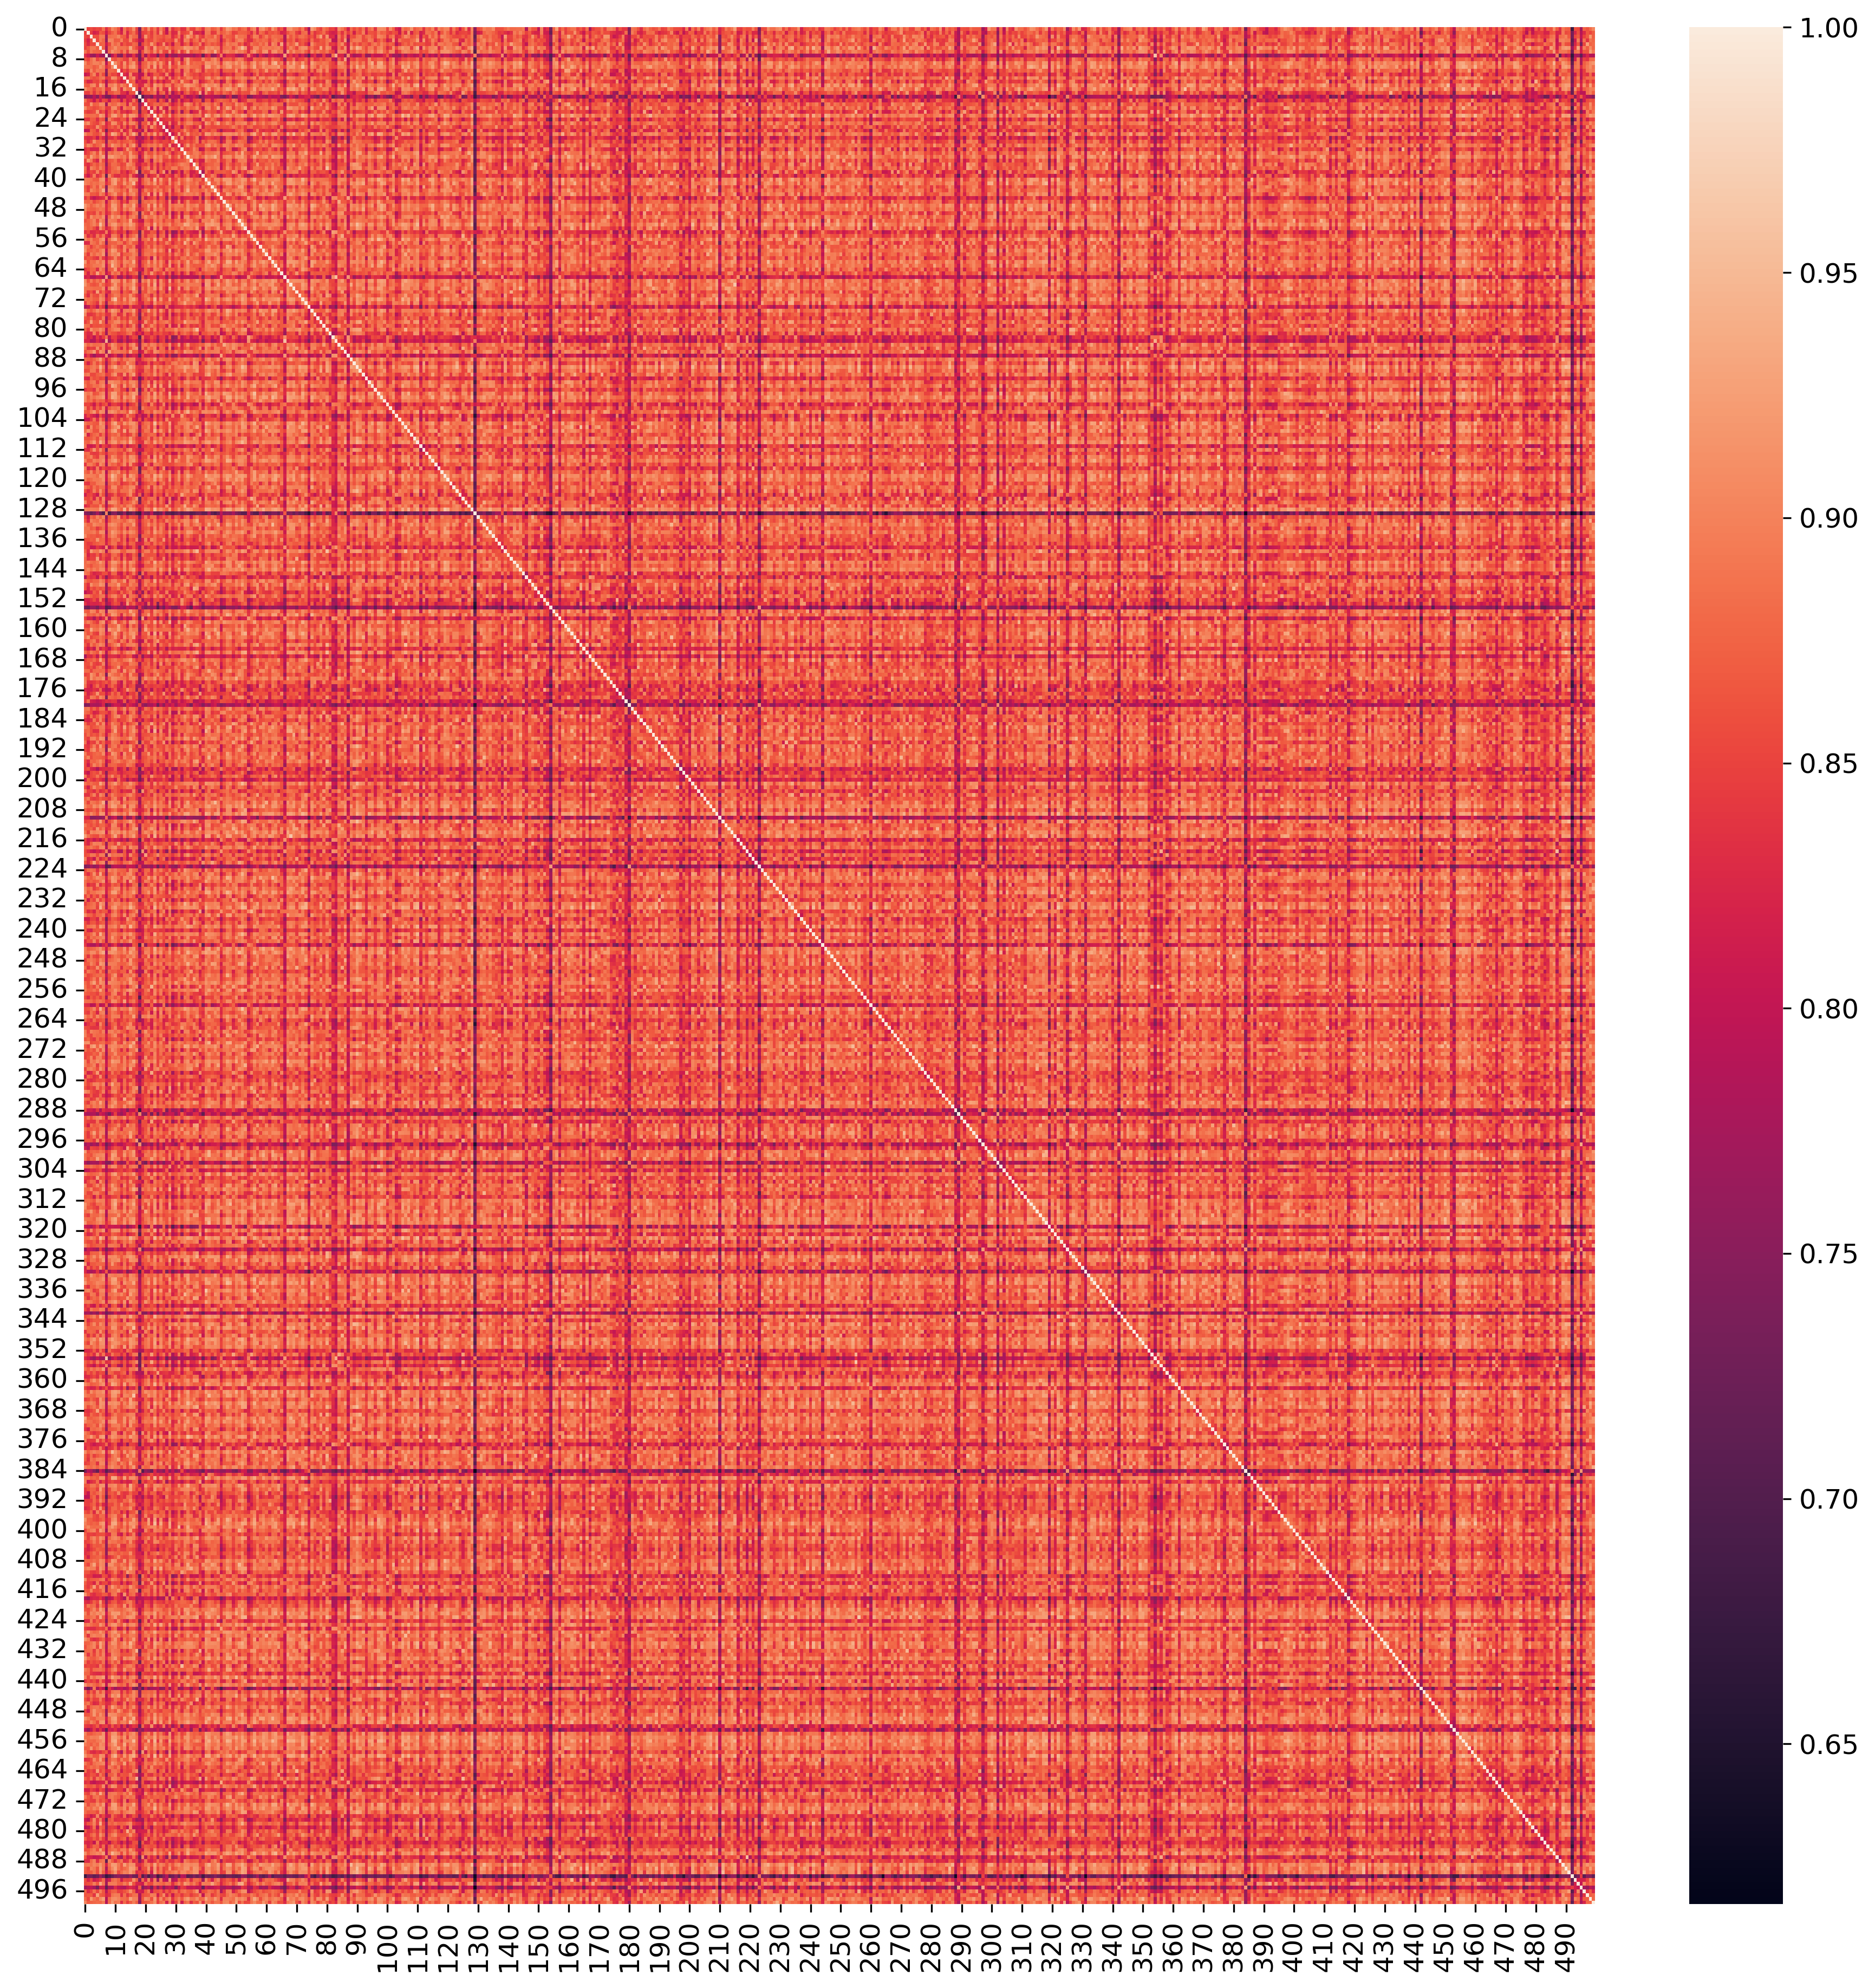

In [112]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import sys
sys.path.append("/Users/emilyolafson/GIT/lesion_predictions/local_code/brainmontageplot/")
sys.path.append("/Users/emilyolafson/GIT/lesion_predictions/workbench_fig/")

from sklearn.decomposition import PCA
from brainmontage import create_montage_figure
import plot_workbench
from plot_workbench import plot_workbench_files
from plot_workbench import *
import importlib
importlib.reload(plot_workbench)

from imp import reload

plt.rcParams['figure.dpi'] = 300

betas_original = np.load('/Users/emilyolafson/GIT/lesion_predictions/betas.npy')
betas = np.load('/Users/emilyolafson/GIT/lesion_predictions/betas.npy')

X = np.loadtxt('/Users/emilyolafson/GIT/lesion_predictions/X.txt')
betas_all = np.reshape(betas, [500, 268])
np.corrcoef(betas_all)
plt.figure(figsize=(15,15))
sns.heatmap(np.corrcoef(betas_all))

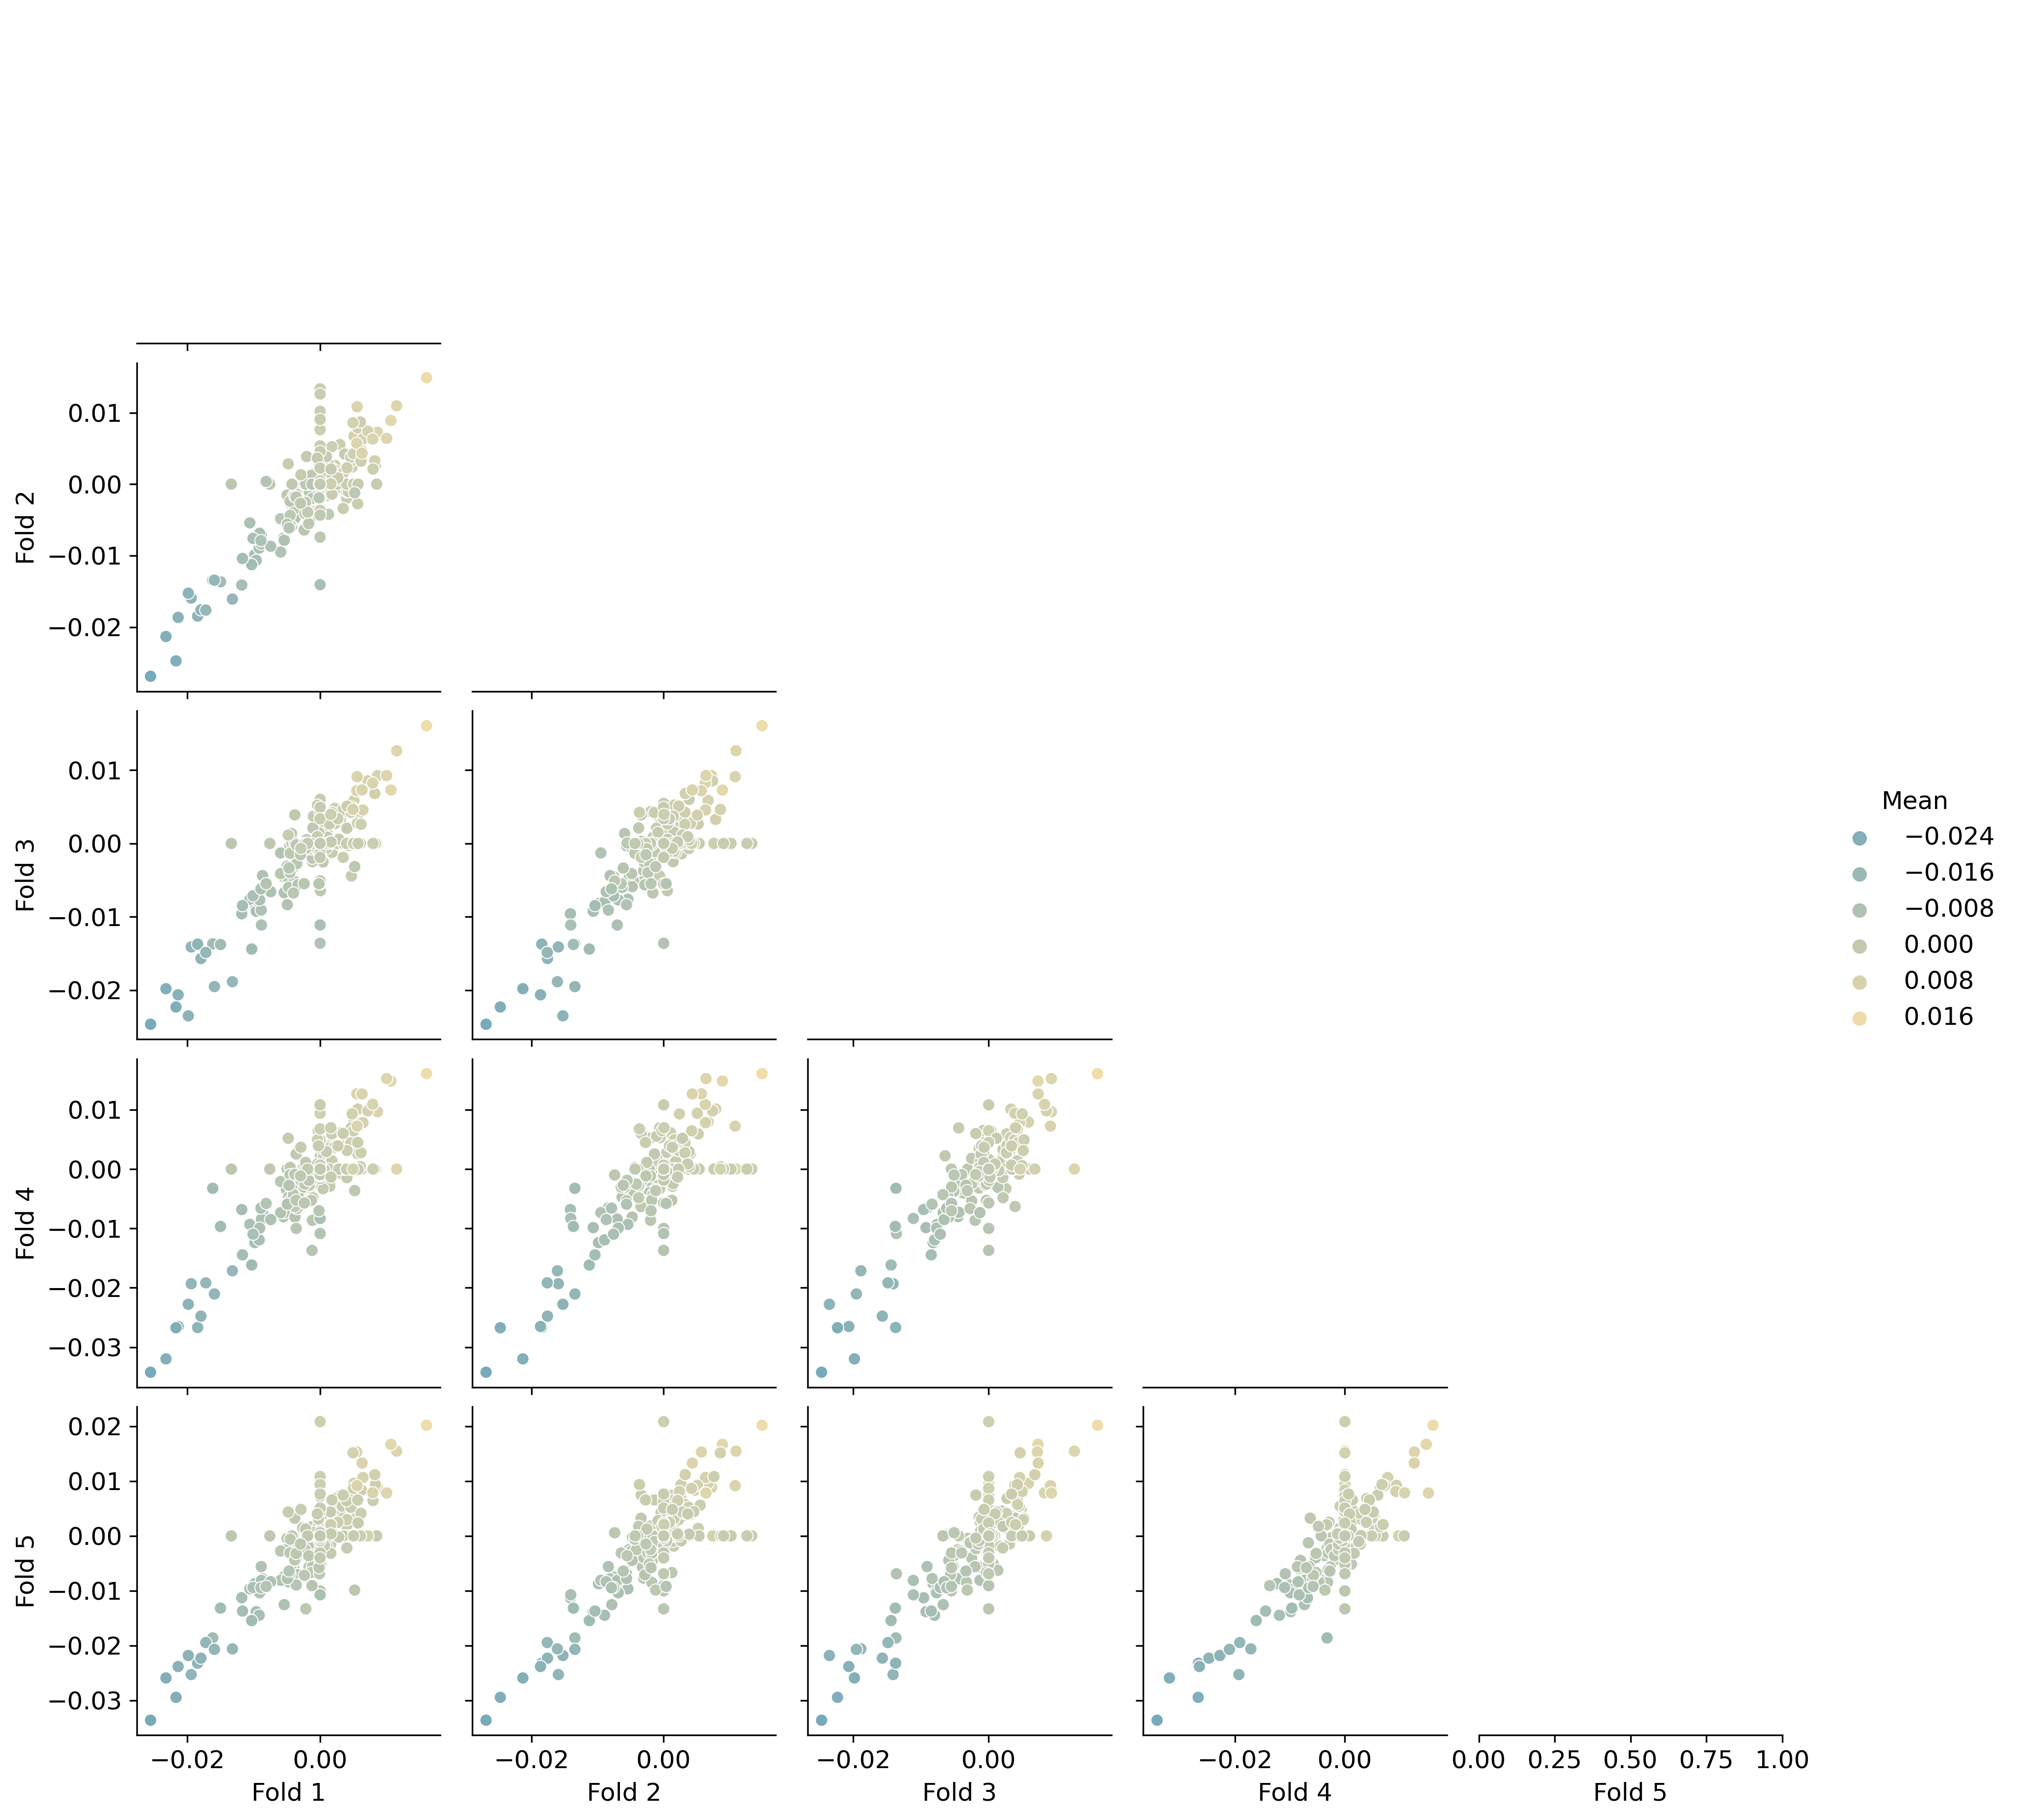

In [113]:
#plt.figure(figsize=(10, 10))
#fig, axs = plt.subplots(5,5, figsize=(20,20))
#sns.color_palette("Spectral", as_cmap=True)
df = pd.DataFrame(data = np.transpose([betas[0,0,:],betas[0,1,:],betas[0,2,:],betas[0,3,:],betas[0,4,:], np.mean(betas[0,:,:],axis=0)]), columns = ('Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Mean'))
sns.pairplot(df, corner = True,hue = 'Mean', vars = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], palette="blend:#7AB,#EDA")

#for i in np.arange(0,5):
#    for j in np.arange(0,5):
#        ax=sns.scatterplot(x=betas[0,i,:],y=betas[0,j,:],hue =betas[0,i,:], ax = axs[i,j],legend=0)
#        plt.tight_layout()
#        ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
#        ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)

plt.savefig('/Users/emilyolafson/GIT/lesion_predictions/figures/correlation_outerfolds.png')


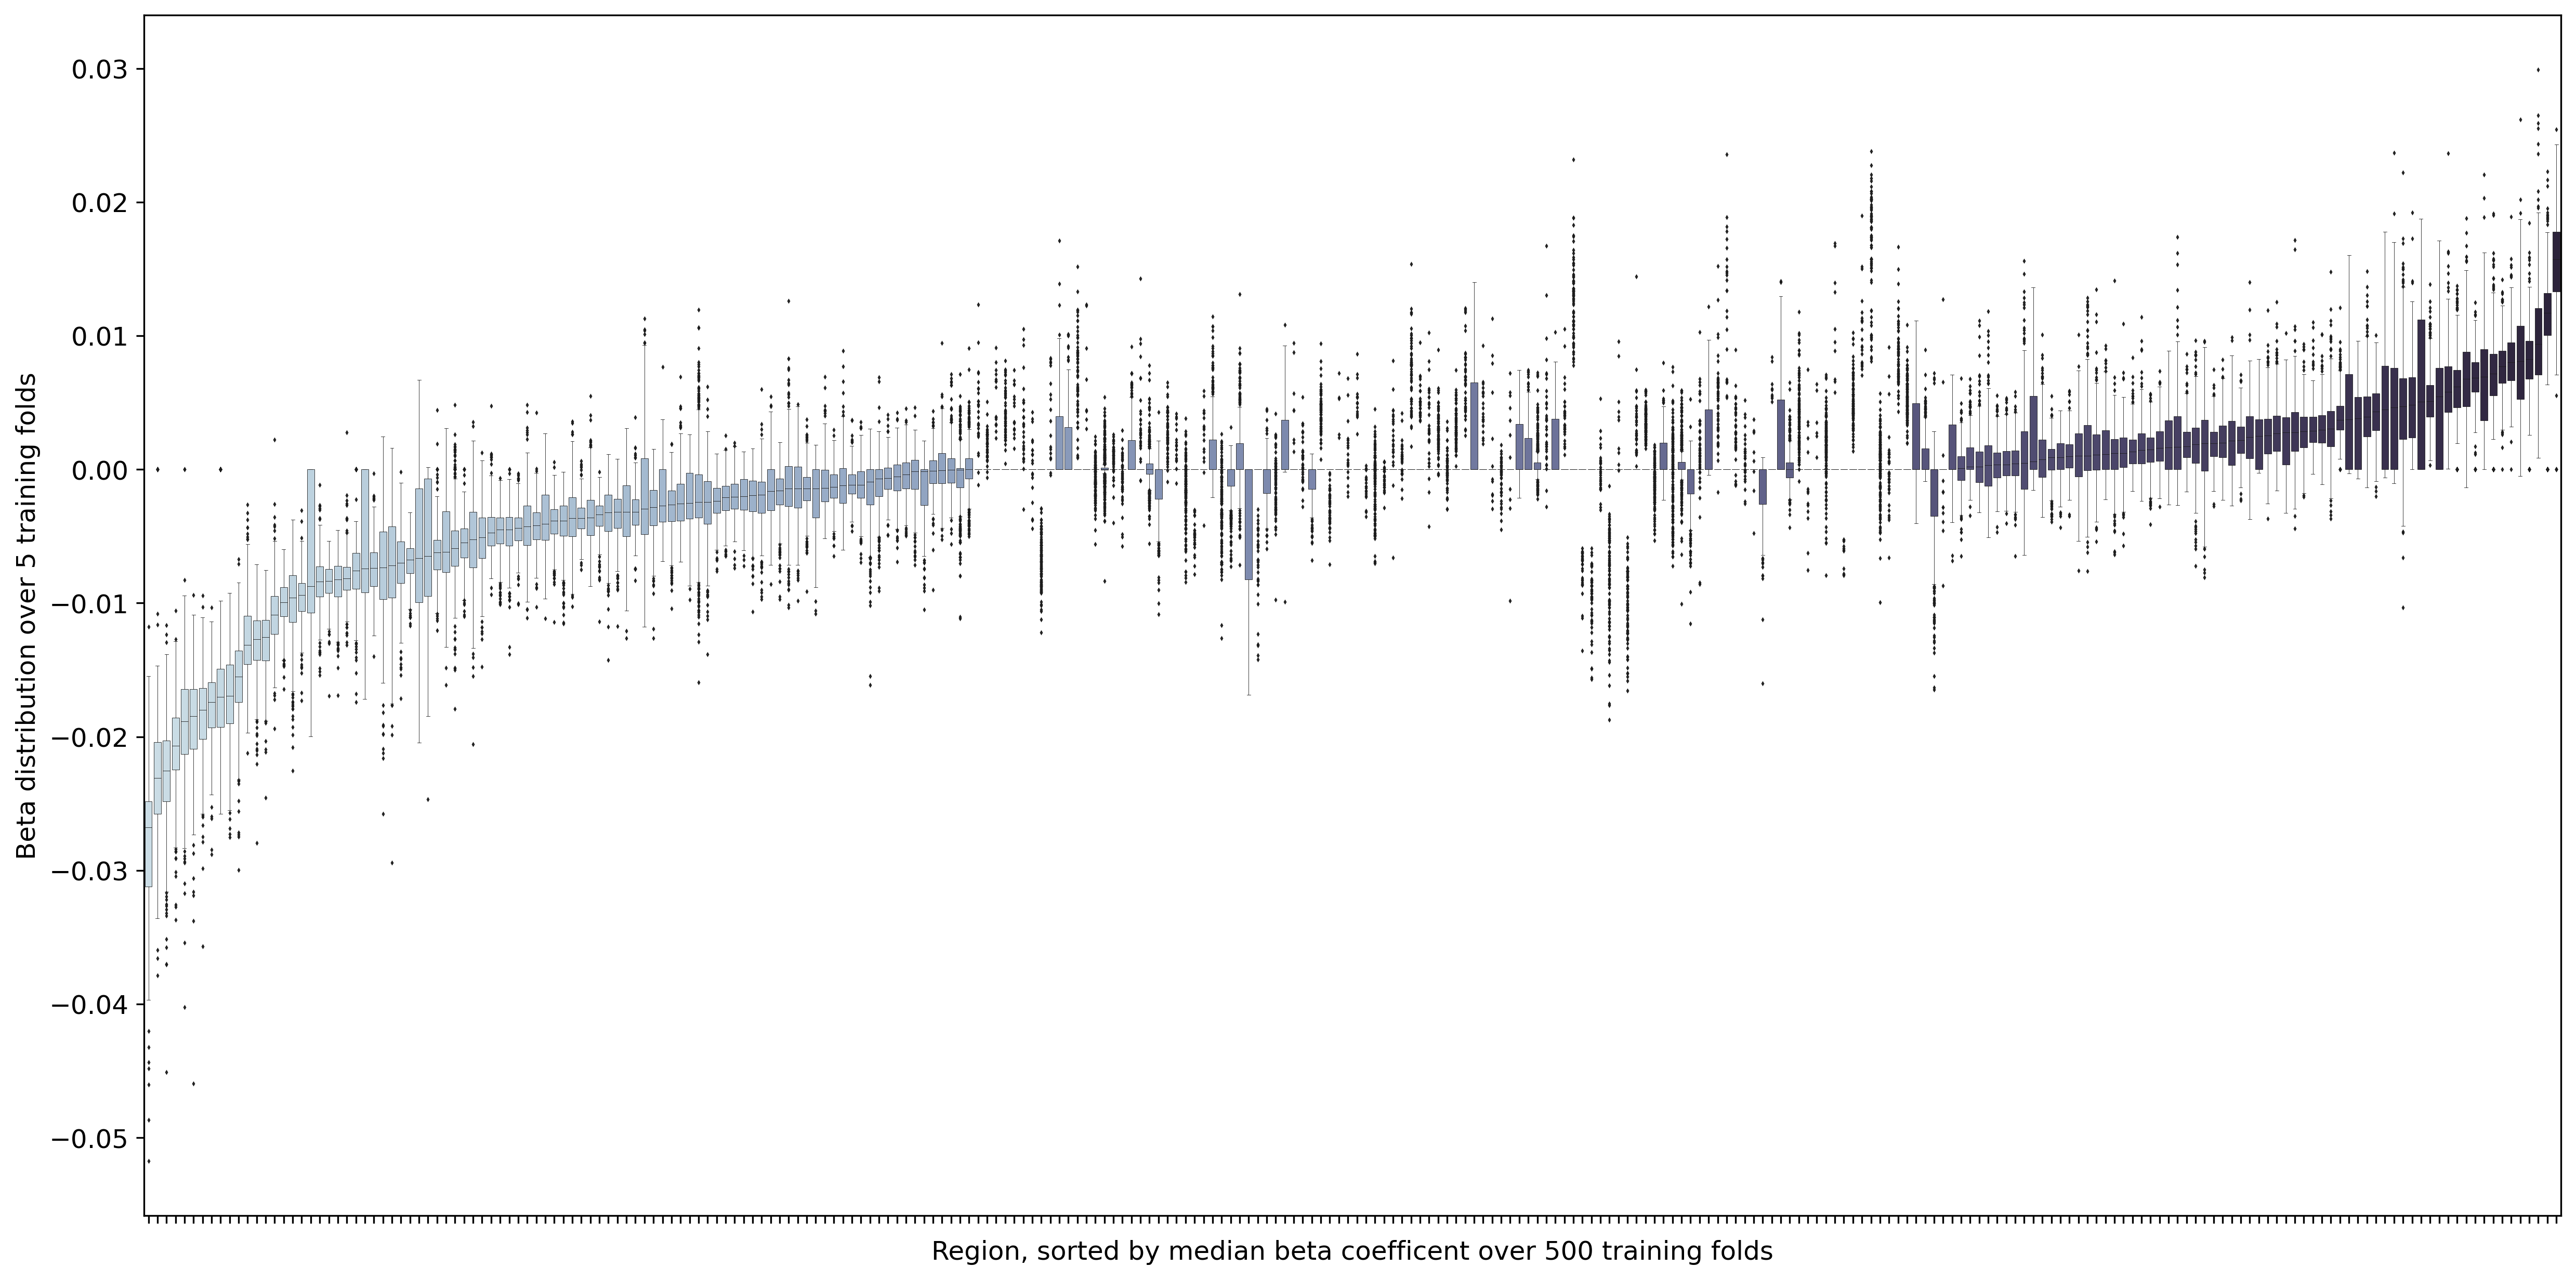

In [114]:
plt.figure(figsize=(20,10))
betasone = betas_all
meds = np.median(betasone,axis=0)
order = np.argsort(meds)

test = np.transpose(betasone[:,order]).tolist()
pl = sns.boxplot(data=test, linewidth=0.2, fliersize=0.3, palette ="ch:s=.25,rot=-.25")
pl.set(xticklabels=[])
pl.set(ylabel='Beta distribution over 5 training folds')
pl.set(xlabel='Region, sorted by median beta coefficent over 500 training folds')
plt.savefig('/Users/emilyolafson/GIT/lesion_predictions/figures/correlation_outerfolds.png')


In [115]:
plt.figure(figsize=(20,10))
betasone = betas_all
meds = np.median(betasone,axis=0)

test = np.transpose(betasone).tolist()
pl = sns.boxplot(data=test, linewidth=0.2, fliersize=0.3, palette ='flare')
pl.set(xticklabels=[])
pl.set(ylabel='Beta distribution over 5 training folds')
pl.set(xlabel='Region, sorted by median beta coefficent over 500 training folds')

[Text(0.5, 0, 'Region, sorted by median beta coefficent over 500 training folds')]

Error in callback <function flush_figures at 0x176f78280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import scipy.stats as stats
import pandas as pd

# perform one sample t-test

pvalues=np.zeros((1,268))
for i in np.arange(0,268):
    if np.median(betas_all[:,i]==0):
        pvalues[0,i] = 1
        continue
    if np.median(betas_all[:,i])<0: # negative median; it is on the negative side
        b = -1*betas_all[:,i]

    else:
        b=betas_all[:,i]
    pvalues[0,i] = np.sum(b <= 0)/500 # number of outer folds that fall below 0 or equal to 0


number of regions: 134
54
color range: -0.0267941951751709, 0.015711287036538124
0.3142257407307625
adjusted color range: -0.08527052911979266, 0.05
(268,)
test 2
[-0.          0.          0.         -0.          0.          0.
  0.          0.02623198  0.          0.          0.         -0.01663551
 -0.          0.00945158  0.         -0.0122257  -0.          0.
  0.         -0.01223589  0.         -0.          0.         -0.
  0.         -0.02152498  0.00861593  0.         -0.02224474 -0.01017757
  0.01844406  0.         -0.01160174 -0.02996684 -0.01509462 -0.
 -0.07170138 -0.01333691 -0.05545954 -0.01401147 -0.03166537  0.
 -0.01429167 -0.01736948 -0.         -0.01075958  0.         -0.
  0.          0.          0.         -0.         -0.03054919  0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.02614293 -0.         -0.01430595  0.00919416  0.
 -0.          0.          0.         -0.          0.          0.
  0.          0.          0.         -0. 


Info: Time to color volume data is 0.579 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.28483 seconds.


Info: Time to color volume data is 0.091 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.15614 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.112073 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.061517 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003313 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.00282 seconds.



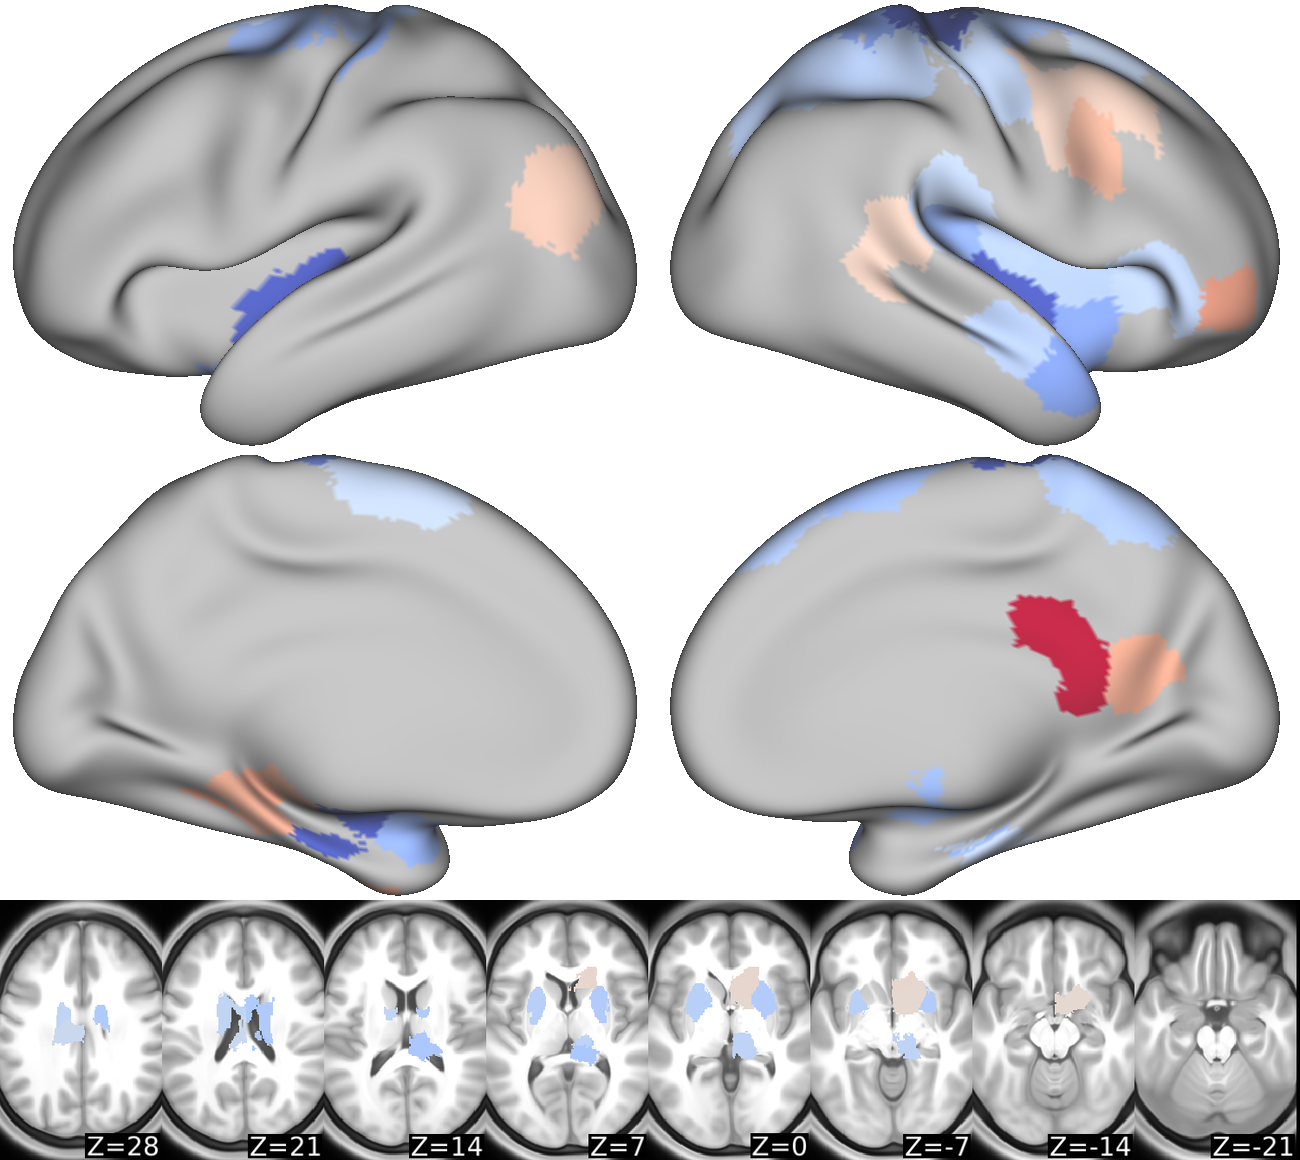

In [ ]:
#create_montage_figure(comp1,atlasname='fs86',
#    viewnames='all',surftype='infl',clim=[np.min(comp1), np.max(comp1)],colormap='RdBu',outputimagefile='/Users/emilyolafson/GIT/lesion_predictions/component_1.png')
pct=0.25
bottom_percentile = np.int8(np.round(pct*268)) # most negative regions
top_percentile = 267-np.int8(np.round(pct*268)) # most positive regions
print('number of regions: {}'.format(bottom_percentile*2))
betasone = betas_all
meds = np.median(betasone,axis=0)
ordered_weights = meds[np.argsort(meds)]
cutoff_bottom = ordered_weights[bottom_percentile]
cutoff_top = ordered_weights[top_percentile]
betasone = betas_all

meds = np.median(betasone,axis=0)
bottoms = meds < cutoff_bottom
significant = pvalues < 0.05
print(np.count_nonzero(significant))
bottoms_sig = bottoms & significant 

tops = meds > cutoff_top
tops_sig = tops & significant 

cutoffs_sig = bottoms_sig | tops_sig
cutoffs = bottoms | tops

comp1 = meds*cutoffs_sig
np.savetxt('/Users/emilyolafson/GIT/lesion_predictions/comp1.txt', comp1)
target_range = 0.05
factor = np.max(comp1)/target_range
print('color range: {}, {}'.format(np.min(comp1), np.max(comp1)))
print(factor)
print('adjusted color range: {}, {}'.format(np.min(comp1)/factor, np.max(comp1)/factor))

plot_workbench_files('/Users/emilyolafson/GIT/lesion_predictions/comp1.txt',factor = factor,figname = 'significant_regions')

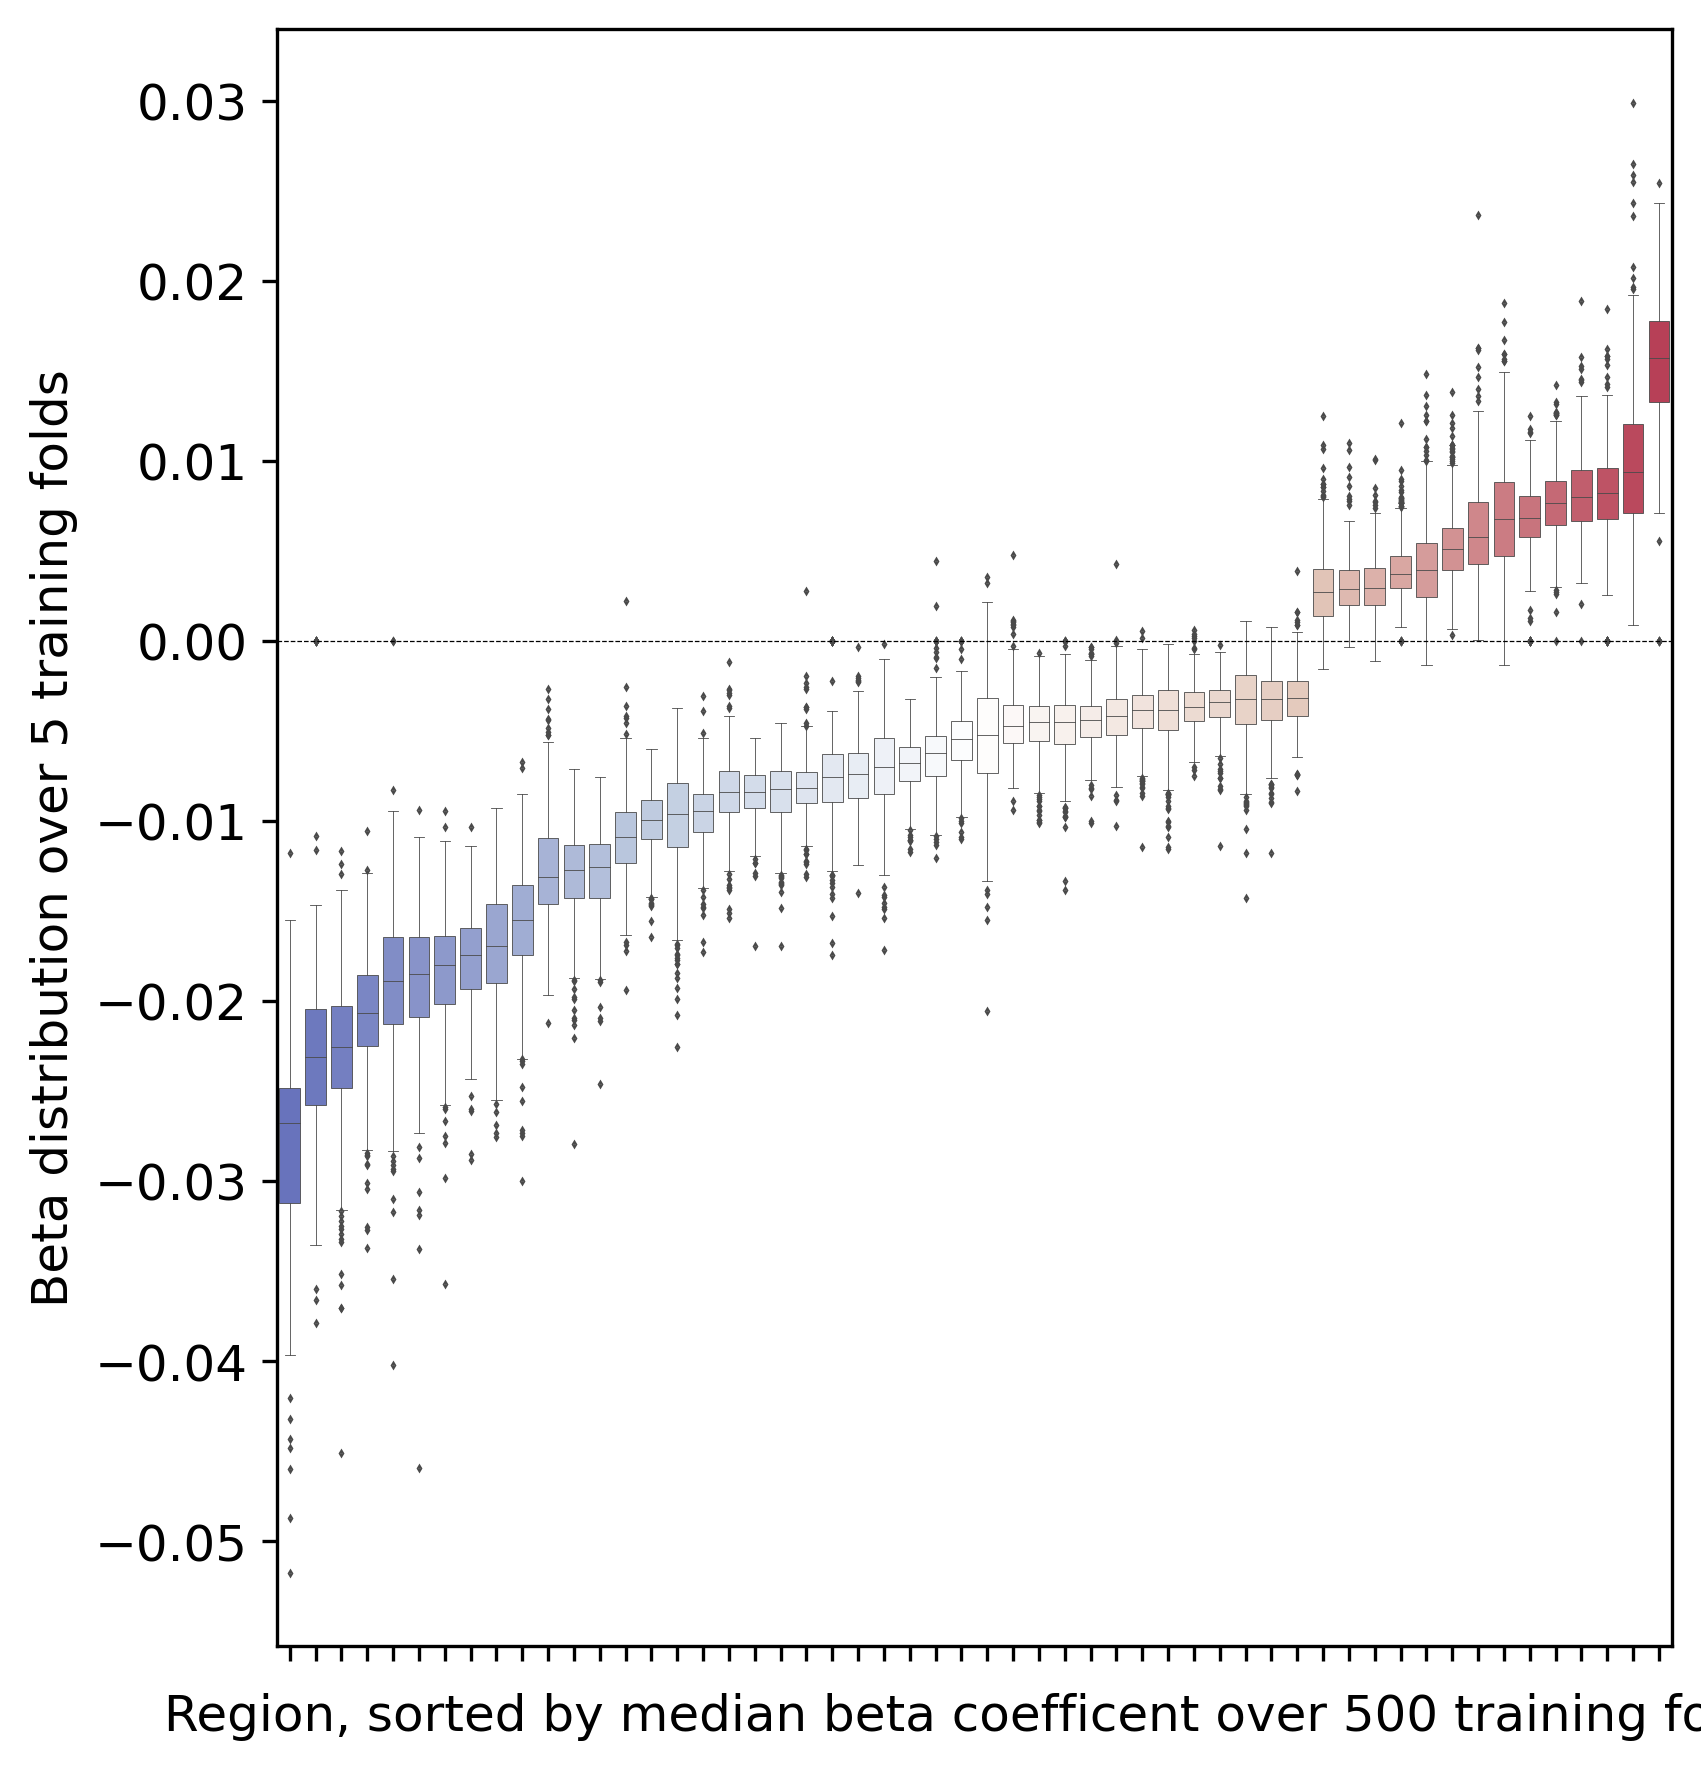

In [ ]:
newdata = betas_all*cutoffs_sig
plt.figure(figsize=(6,7))
meds = np.median(newdata,axis=0)
order = np.argsort(meds)
newdata_plot = newdata[:,order]
idx = np.argwhere(np.all(newdata_plot[..., :] == 0, axis=0))
newdata_plot = np.delete(newdata_plot, idx, axis=1)

pl = sns.boxplot(data=newdata_plot, linewidth=0.2, fliersize=0.3, palette ="blend:#5a69ca,#b6c7e4,#ffffff,#e9c5b3,#cb2c4b")
plt.axhline(0, color='black', linewidth=0.3, linestyle='--')
pl.set(xticklabels=[])
pl.set(ylabel='Beta distribution over 5 training folds')
pl.set(xlabel='Region, sorted by median beta coefficent over 500 training folds')
plt.savefig('/Users/emilyolafson/GIT/lesion_predictions/figures/correlation_outerfolds_sig.png',bbox_inches='tight')


In [ ]:
X_bottom = X*bottoms_sig
X_top = X*tops_sig
correls = np.zeros(shape = ( X_bottom.shape[1],  X_top.shape[1]))
print(correls.shape)
for i in range(0,X_bottom.shape[1]):
    for j in range(0, X_top.shape[1]):

        correls[i,j]=np.corrcoef(X_bottom[:,i],X_top[:,j])[0][1]

(268, 268)


/Users/emilyolafson/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/emilyolafson/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: >

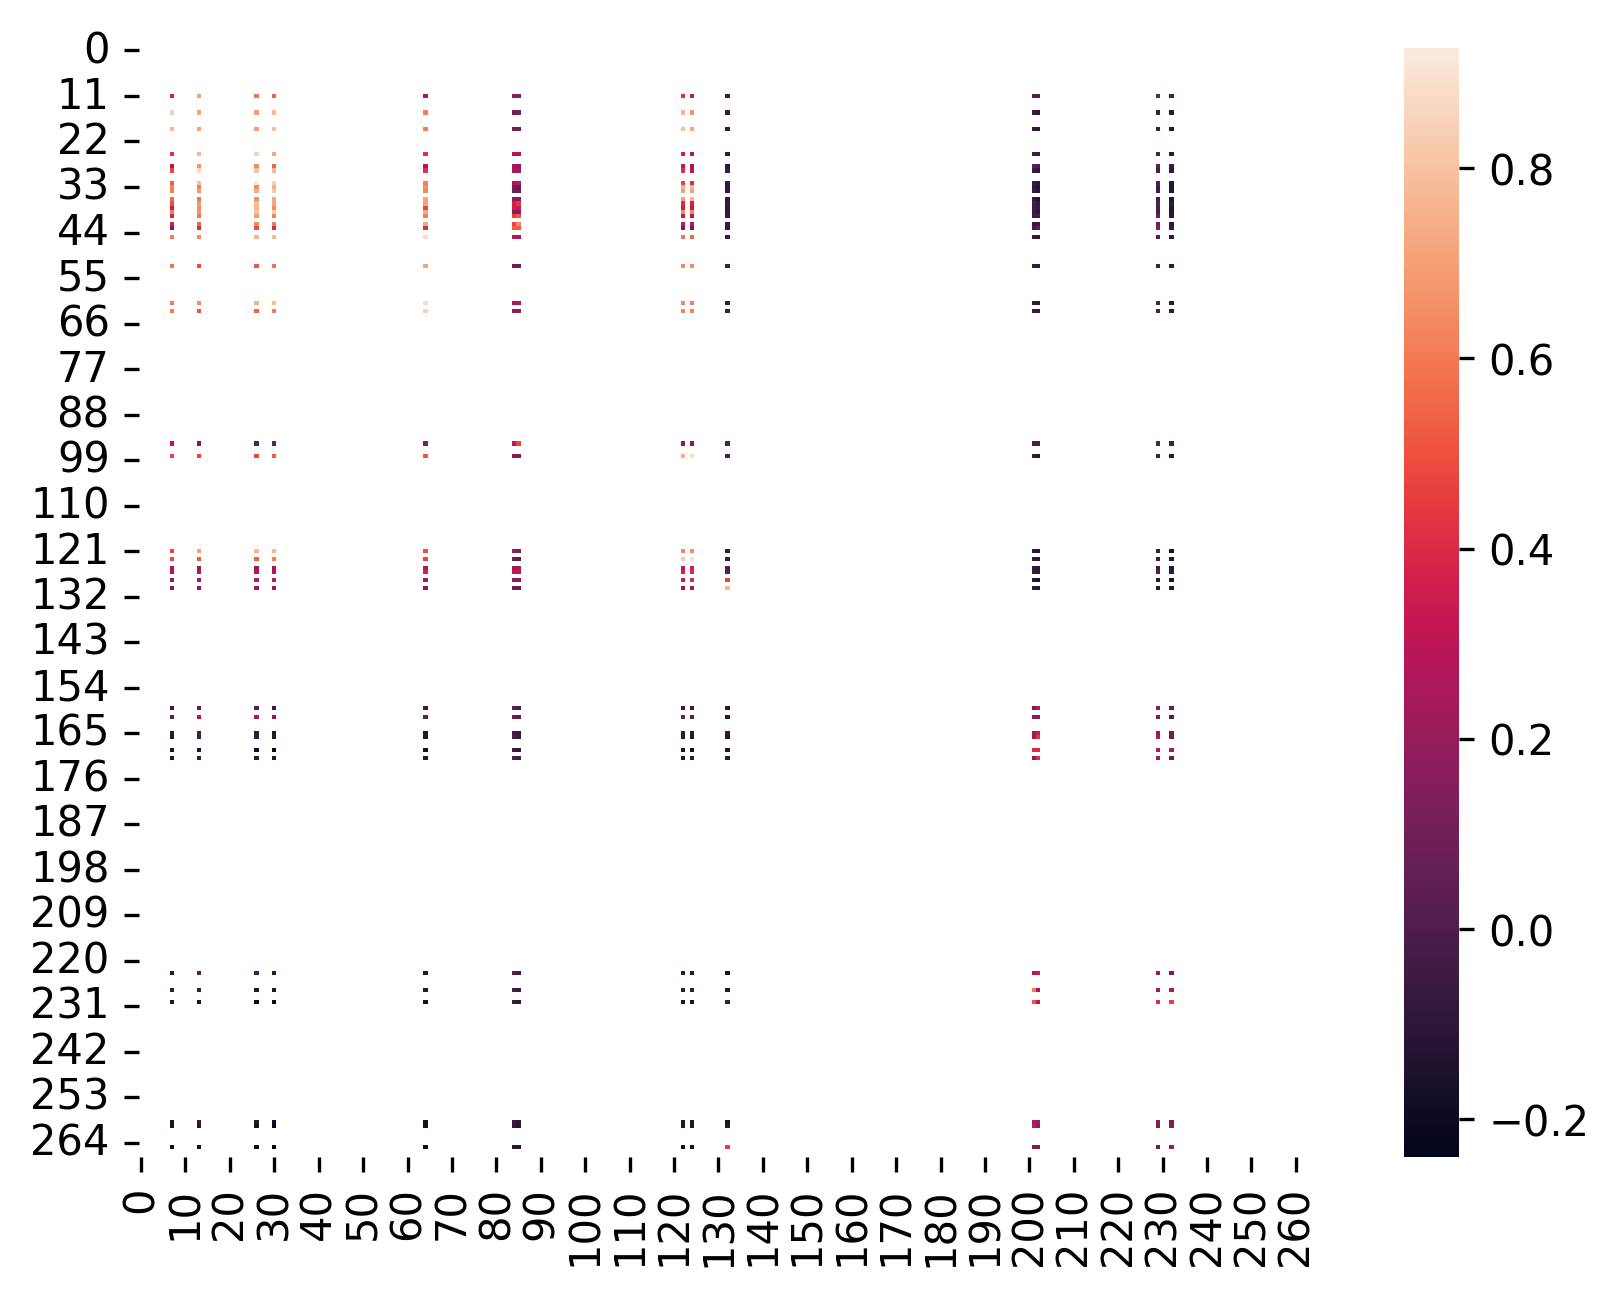

In [ ]:
sns.heatmap(correls)

In [ ]:
high_correlation = correls>0.8
high_correlation[np.isnan(high_correlation)]=0
x, y = np.nonzero(high_correlation)

newdata = betas_all*cutoffs_sig

meds = np.median(newdata,axis=0)
xypair = 0
for i in np.arange(x.shape[0]):
    xypair = i
    plotting_array = np.zeros((268,1))
    print(x[xypair])
    print(meds[x[xypair]])
    print(meds[y[xypair]])
    plotting_array[x[xypair]]=meds[x[xypair]]
    plotting_array[y[xypair]]=meds[y[xypair]]

    comp1 =plotting_array

    np.savetxt('/Users/emilyolafson/GIT/lesion_predictions/comp1.txt', comp1, delimiter=',')

    plot_workbench_files('/Users/emilyolafson/GIT/lesion_predictions/comp1.txt',factor = factor,figname = 'regionpair_{}_GlassBrain.png'.format(xypair))


15
-0.003841628087684512
0.008242764510214329
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.02623198  0.          0.          0.          0.
  0.          0.          0.         -0.0122257   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.  


Info: Time to color volume data is 0.547 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.1302 seconds.


Info: Time to color volume data is 0.066 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.124541 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.064091 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.061451 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.004654 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002692 seconds.



25
-0.006763703189790249
0.0027073476230725646
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.02152498  0.00861593  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0. 


Info: Time to color volume data is 0.557 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.05932 seconds.


Info: Time to color volume data is 0.067 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.11239 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.063365 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.059309 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003084 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002763 seconds.



29
-0.0031980553176254034
0.002969928551465273
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00945158  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01017757
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.     


Info: Time to color volume data is 0.588 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.0498 seconds.


Info: Time to color volume data is 0.060 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.113219 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.092387 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.101093 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.011843 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.004537 seconds.



29
-0.0031980553176254034
0.0027073476230725646
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00861593  0.          0.         -0.01017757
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.    


Info: Time to color volume data is 0.590 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.10763 seconds.


Info: Time to color volume data is 0.061 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.127762 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.064527 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.064147 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003435 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.003111 seconds.



32
-0.003645566524937749
0.0027073476230725646
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00861593  0.          0.          0.
  0.          0.         -0.01160174  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0. 


Info: Time to color volume data is 0.944 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.39865 seconds.


Info: Time to color volume data is 0.061 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.125039 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.061225 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.060665 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003564 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002697 seconds.



32
-0.003645566524937749
0.005795598961412907
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01844406  0.         -0.01160174  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.  


Info: Time to color volume data is 0.594 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.18252 seconds.


Info: Time to color volume data is 0.067 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.109525 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.071946 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.064962 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003737 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.003331 seconds.



34
-0.004743119701743126
0.005795598961412907
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01844406  0.          0.          0.         -0.01509462  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.  


Info: Time to color volume data is 0.560 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.05344 seconds.


Info: Time to color volume data is 0.062 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.109544 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.060124 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.059208 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003141 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002592 seconds.



39
-0.004402764607220888
0.005795598961412907
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01844406  0.          0.          0.          0.          0.
  0.          0.          0.         -0.01401147  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.  


Info: Time to color volume data is 0.580 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.0806 seconds.


Info: Time to color volume data is 0.067 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.105193 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.07395 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.062161 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003252 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002786 seconds.



45
-0.00338093691971153
0.002889042254537344
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.01075958  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00919416  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.   


Info: Time to color volume data is 0.574 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.02917 seconds.


Info: Time to color volume data is 0.060 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.107701 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.060789 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.063885 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003181 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002787 seconds.



61
-0.008214781992137432
0.002889042254537344
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.02614293  0.          0.          0.00919416  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.  


Info: Time to color volume data is 0.583 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.1411 seconds.


Info: Time to color volume data is 0.059 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.111652 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.060418 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.060009 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003349 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002666 seconds.



63
-0.00449529686011374
0.002889042254537344
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.01430595  0.00919416  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.   


Info: Time to color volume data is 0.607 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.19926 seconds.


Info: Time to color volume data is 0.072 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.114487 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.0672 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.065379 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003684 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002994 seconds.



98
-0.007380779134109616
0.0039259695913642645
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0. 


Info: Time to color volume data is 0.615 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.17706 seconds.


Info: Time to color volume data is 0.077 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.135273 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.060132 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.059514 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.00334 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.002535 seconds.



123
-0.017995075322687626
0.005119276931509376
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0. 


Info: Time to color volume data is 0.627 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.11 seconds.


Info: Time to color volume data is 0.084 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.133616 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.069774 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.067861 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.003879 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.003543 seconds.



123
-0.017995075322687626
0.0039259695913642645
(268,)
test 2
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.


Info: Time to color volume data is 0.573 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200_AverageT1w_restore.nii.gz was 1.13722 seconds.


Info: Time to color volume data is 0.080 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_subcortical_betas.nii.gz was 0.131382 seconds.



Generating workbench figures:
 /Users/emilyolafson/GIT/lesion_predictions/temp_surfaces_fig.png



Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii was 0.060258 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/wb_files/HCP_S1200_GroupAvg_v1/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii was 0.091049 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasL.shape.gii was 0.005531 seconds.


Info: Time to read /Users/emilyolafson/GIT/lesion_predictions/temp_surfacefile_betasR.shape.gii was 0.00275 seconds.



In [ ]:
meds[x[xypair]]

0.0

In [ ]:
# null distribution of pairwise correlation in chaco scores?
nullcorrs=[]
for i in np.arange(0,268):
    for j in np.arange(0,268):
        if i==j:
            continue
        x1 = np.log(X[:,i])
        x2 = np.log(X[:,j])

        nan1 = np.isnan(x1) | np.isinf(x1) |  np.isnan(x2) | np.isinf(x2)
        nan2 = np.isnan(x2) | np.isinf(x2) | np.isnan(x1) | np.isinf(x1) 

        correl= np.corrcoef((x1[~nan1], x2[~nan2]))[0,1]
        nullcorrs.append(correl)

/var/folders/w3/ls9jg8yd2jxdmptf7fz96zgr0000gn/T/ipykernel_70928/2245679386.py:7: RuntimeWarning: divide by zero encountered in log
  x1 = np.log(X[:,i])
/var/folders/w3/ls9jg8yd2jxdmptf7fz96zgr0000gn/T/ipykernel_70928/2245679386.py:8: RuntimeWarning: divide by zero encountered in log
  x2 = np.log(X[:,j])


(array([  246.,  3496.,  9172., 10938., 10526.,  8834.,  9698.,  9626.,
         6640.,  2380.]),
 array([-0.55568998, -0.40174905, -0.24780813, -0.0938672 ,  0.06007372,
         0.21401465,  0.36795557,  0.5218965 ,  0.67583743,  0.82977835,
         0.98371928]),
 <BarContainer object of 10 artists>)

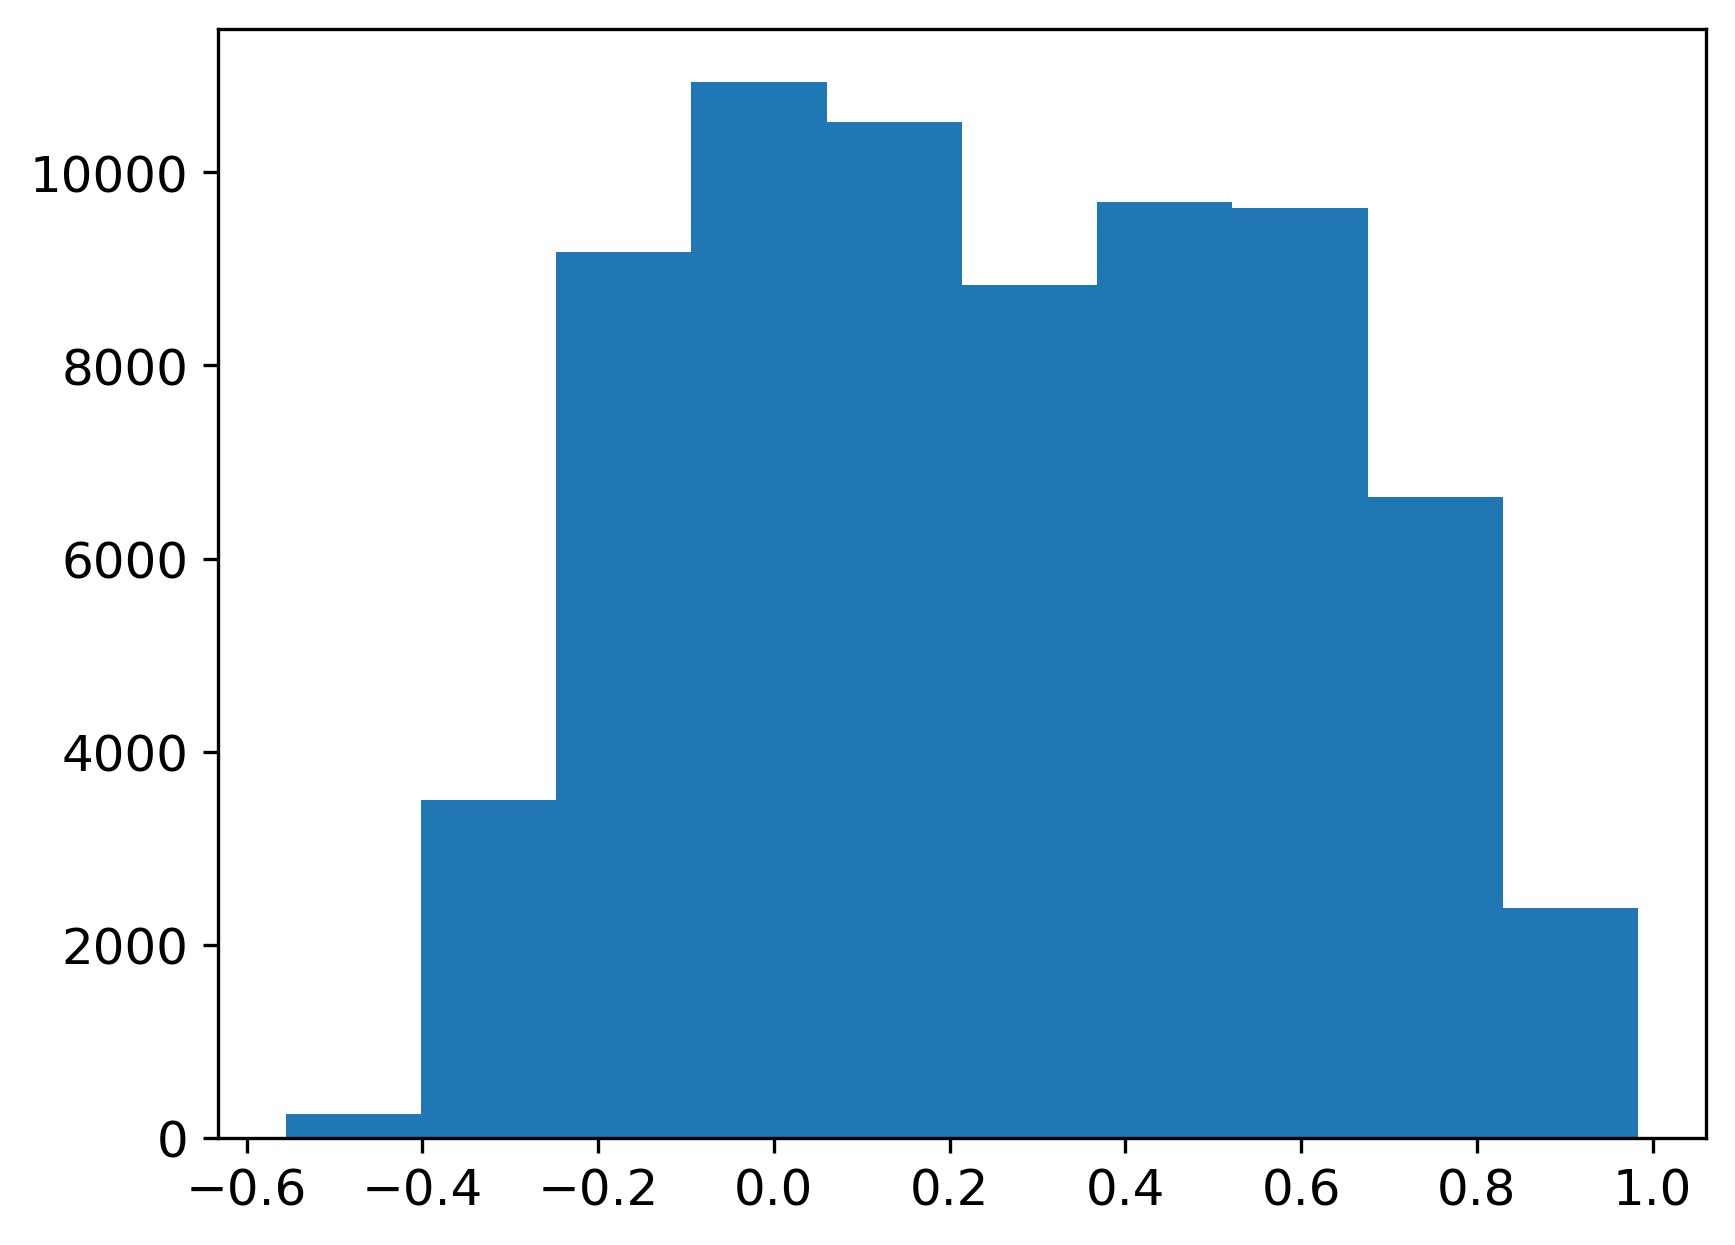

In [ ]:
plt.hist(nullcorrs)

/var/folders/w3/ls9jg8yd2jxdmptf7fz96zgr0000gn/T/ipykernel_70928/3167492939.py:35: RuntimeWarning: divide by zero encountered in log
  pl=sns.scatterplot(x=np.log(X[:,x[xypair]]), y=np.log(X[:,y[xypair]]),hue=X[:,x[xypair]],legend=0,ax=axs[1])
/var/folders/w3/ls9jg8yd2jxdmptf7fz96zgr0000gn/T/ipykernel_70928/3167492939.py:39: RuntimeWarning: divide by zero encountered in log
  x1 = np.log(X[:,x[xypair]])
/var/folders/w3/ls9jg8yd2jxdmptf7fz96zgr0000gn/T/ipykernel_70928/3167492939.py:40: RuntimeWarning: divide by zero encountered in log
  x2 = np.log(X[:,y[xypair]])
/var/folders/w3/ls9jg8yd2jxdmptf7fz96zgr0000gn/T/ipykernel_70928/3167492939.py:35: RuntimeWarning: divide by zero encountered in log
  pl=sns.scatterplot(x=np.log(X[:,x[xypair]]), y=np.log(X[:,y[xypair]]),hue=X[:,x[xypair]],legend=0,ax=axs[1])
/var/folders/w3/ls9jg8yd2jxdmptf7fz96zgr0000gn/T/ipykernel_70928/3167492939.py:39: RuntimeWarning: divide by zero encountered in log
  x1 = np.log(X[:,x[xypair]])
/var/folders/w3/ls9jg8y

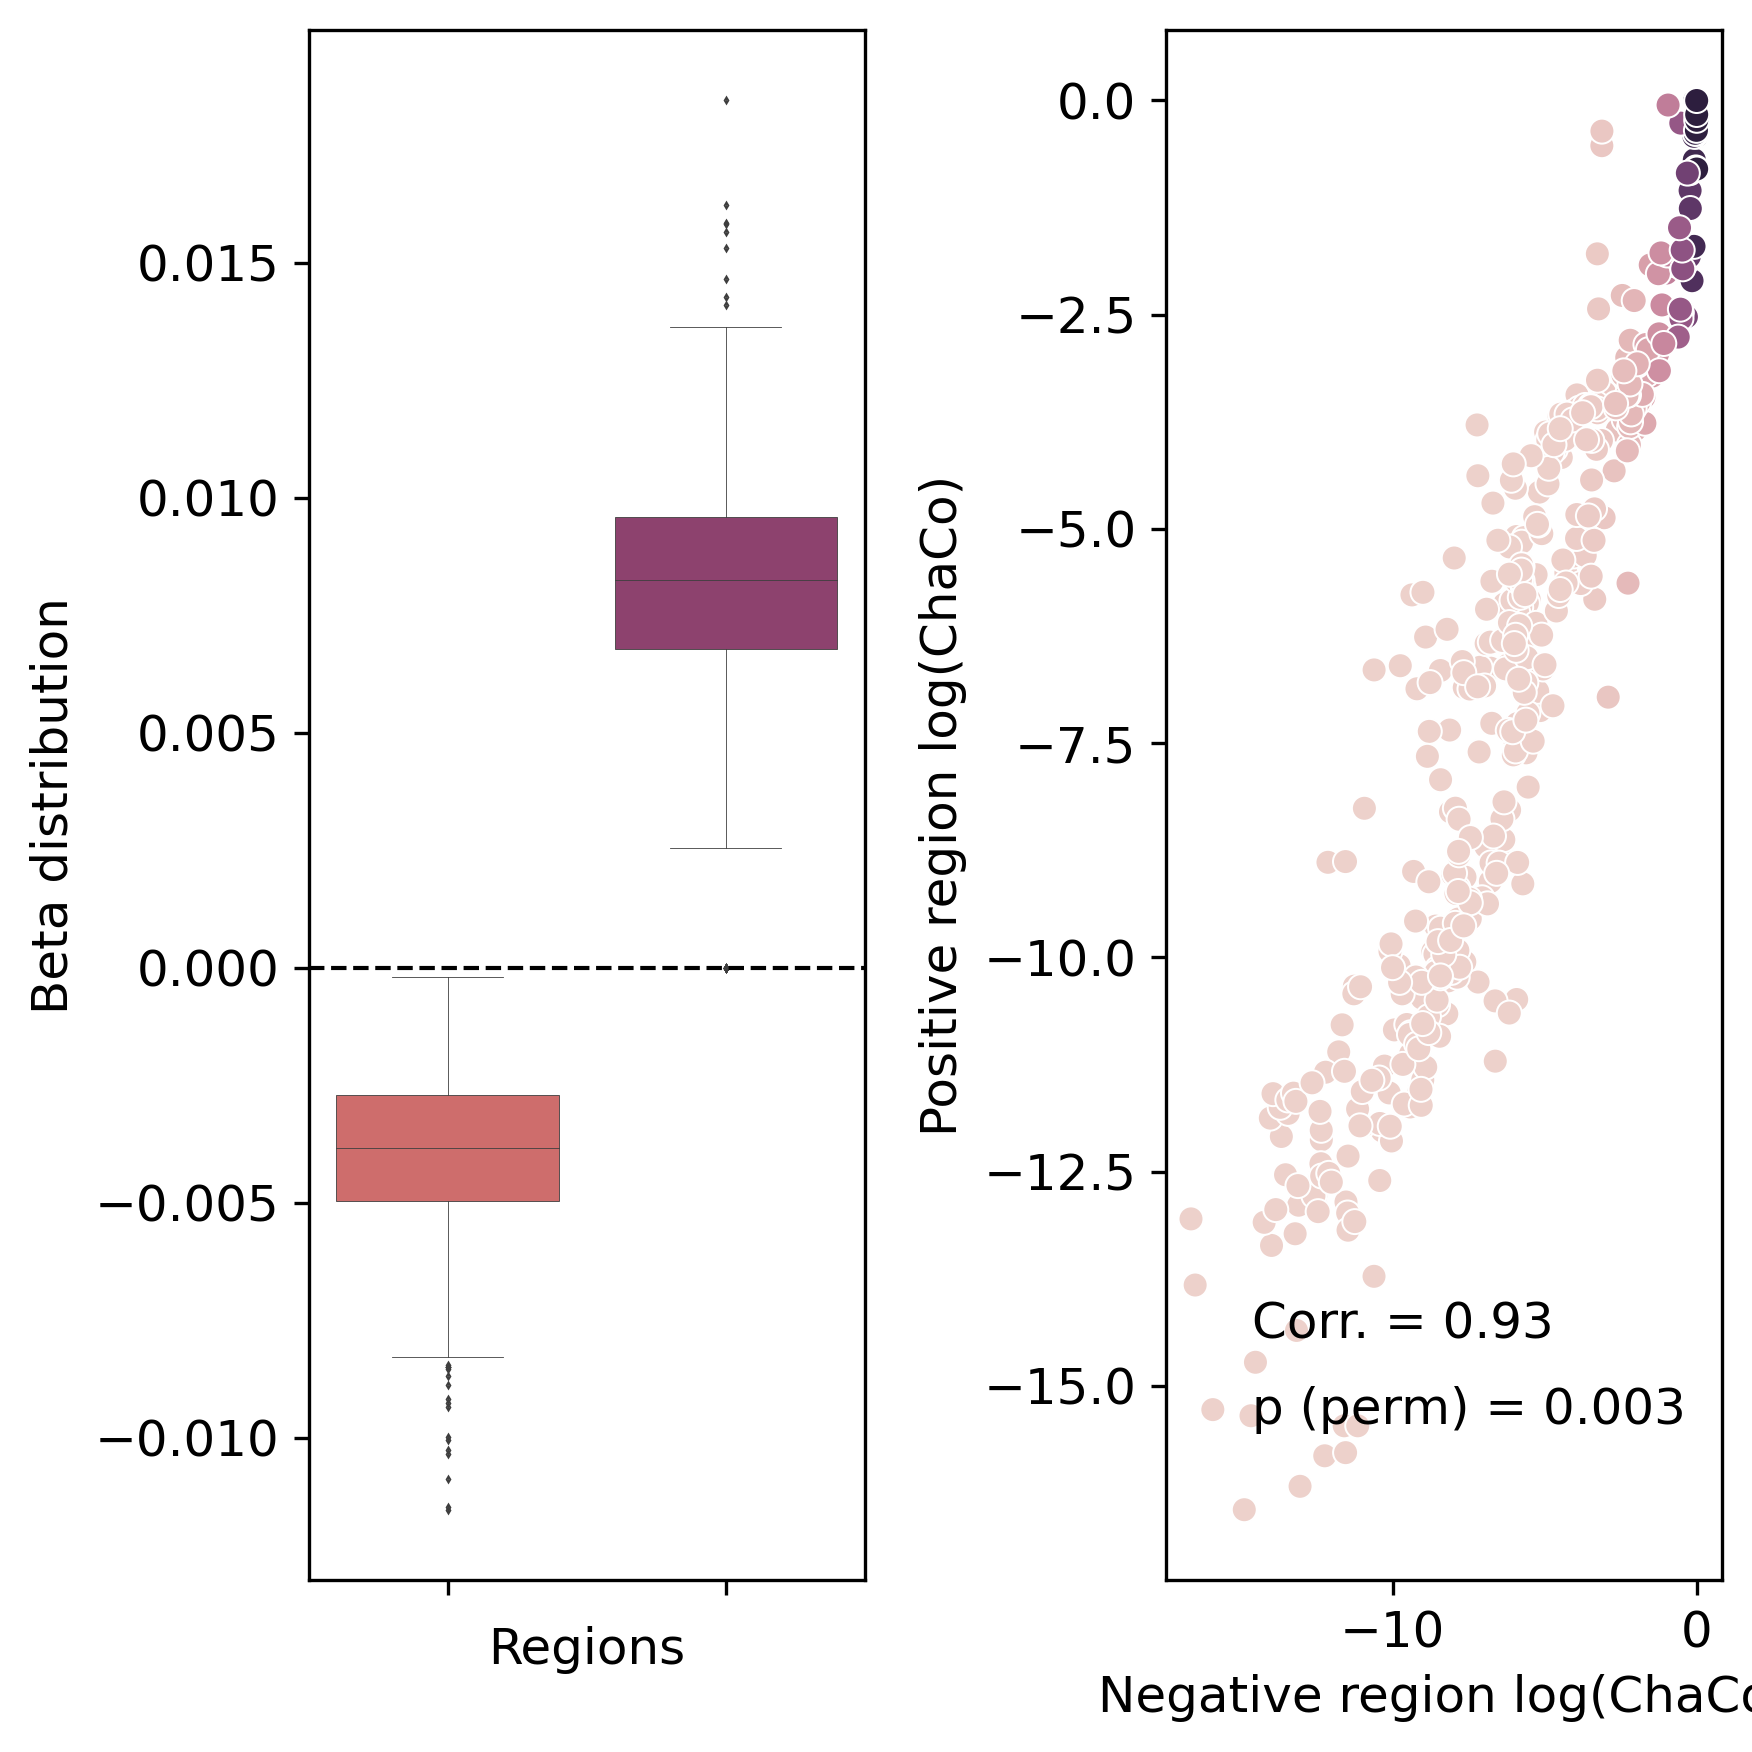

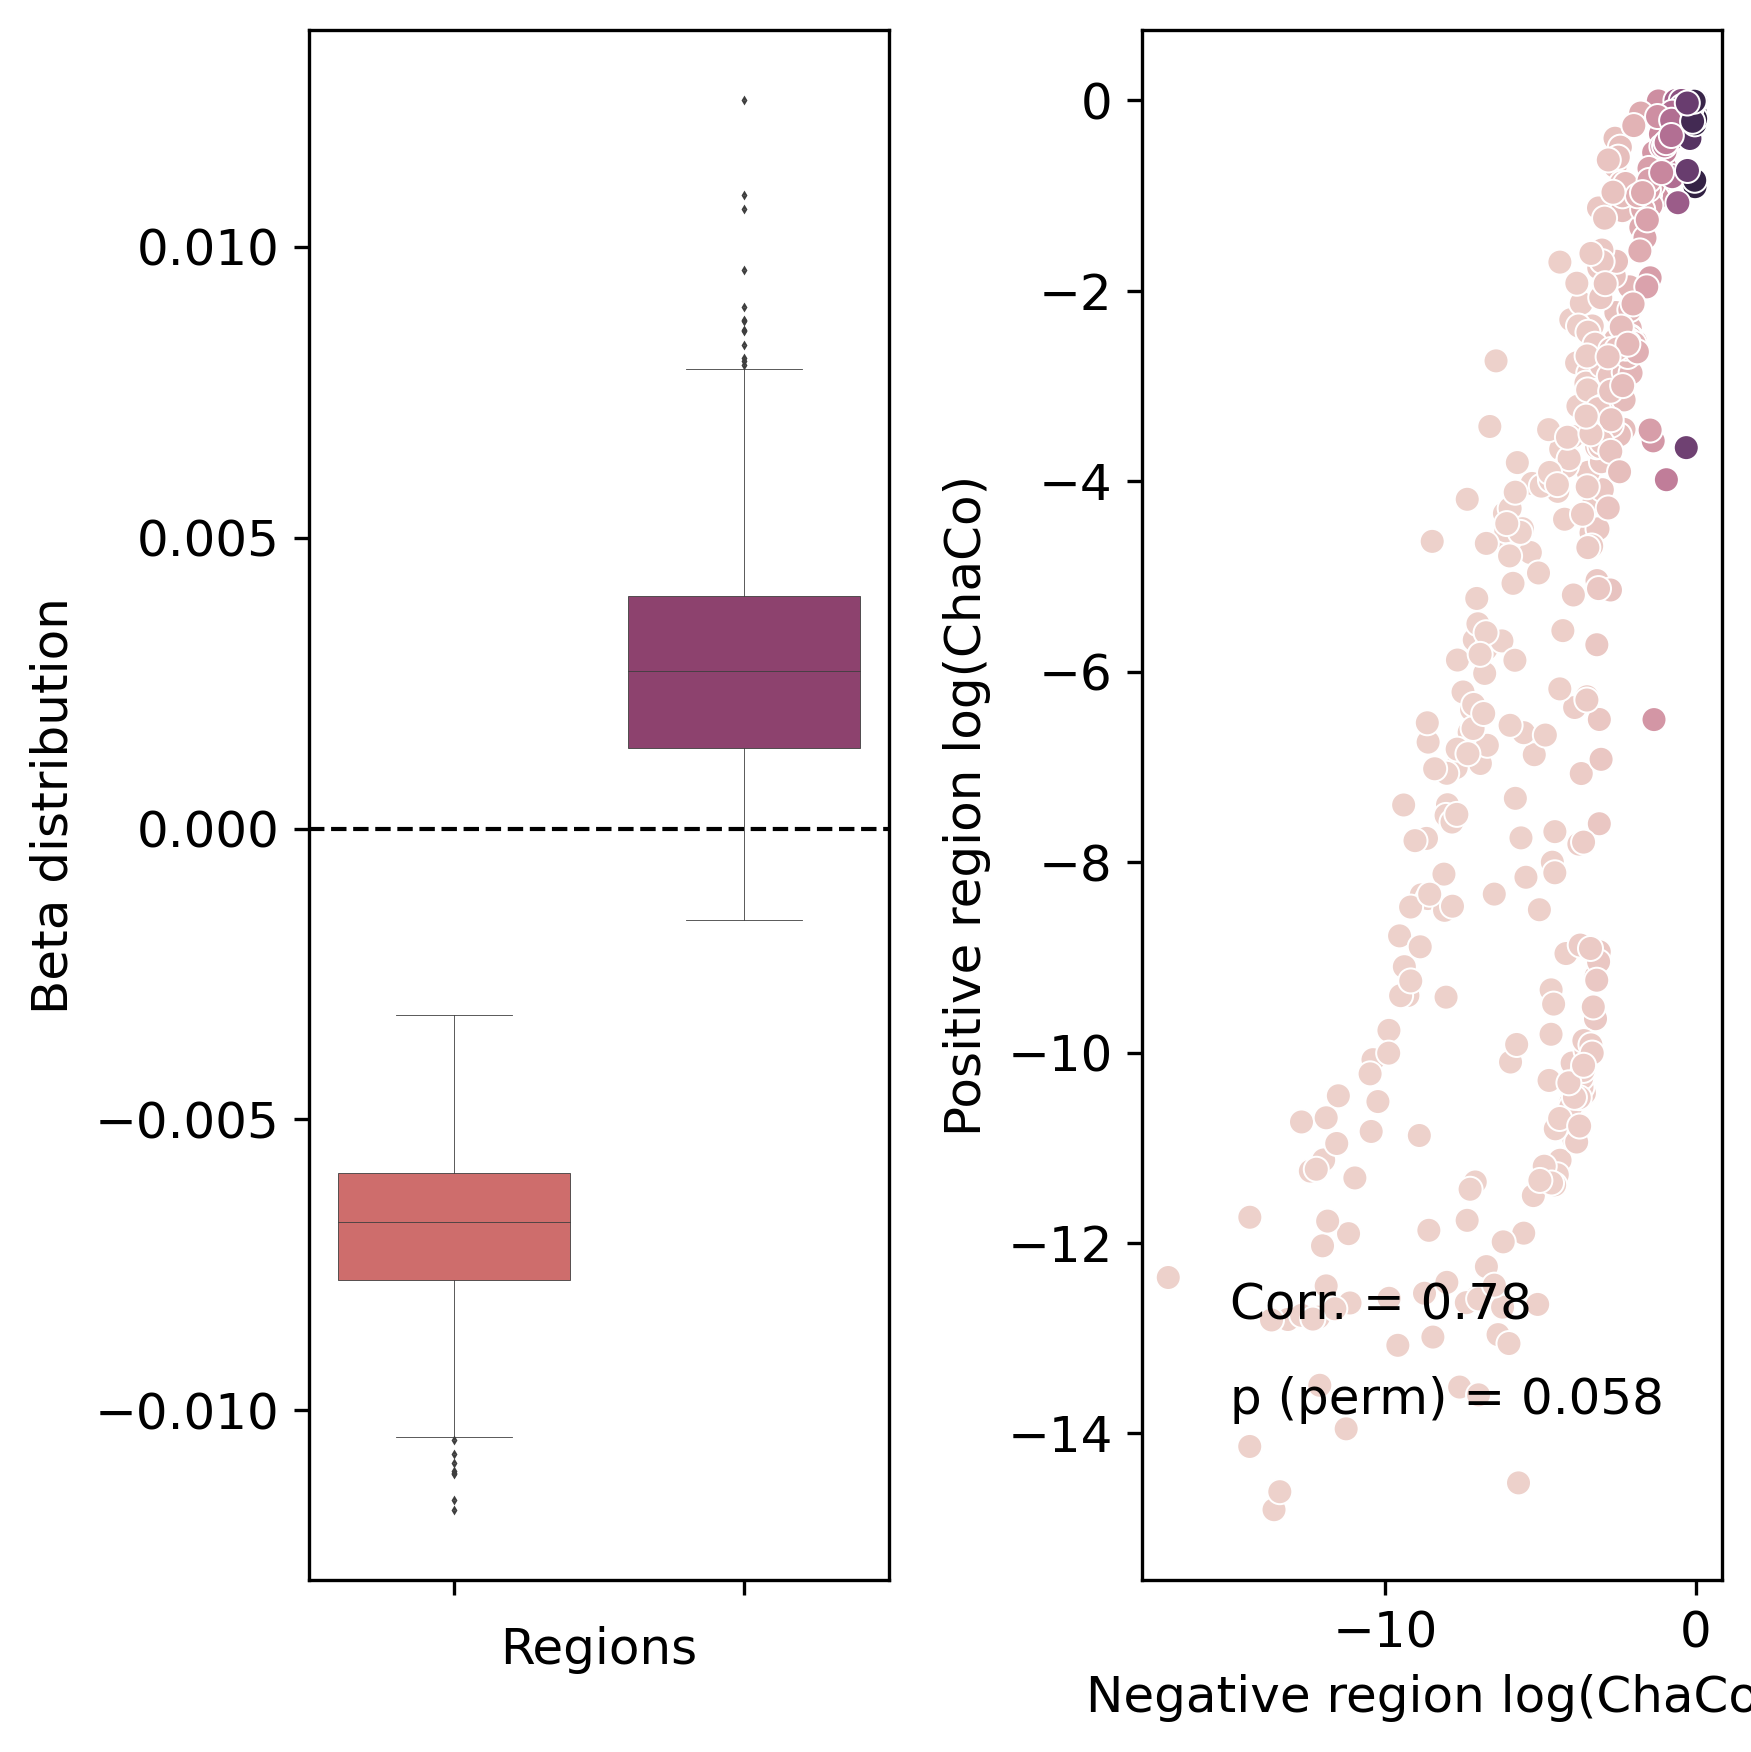

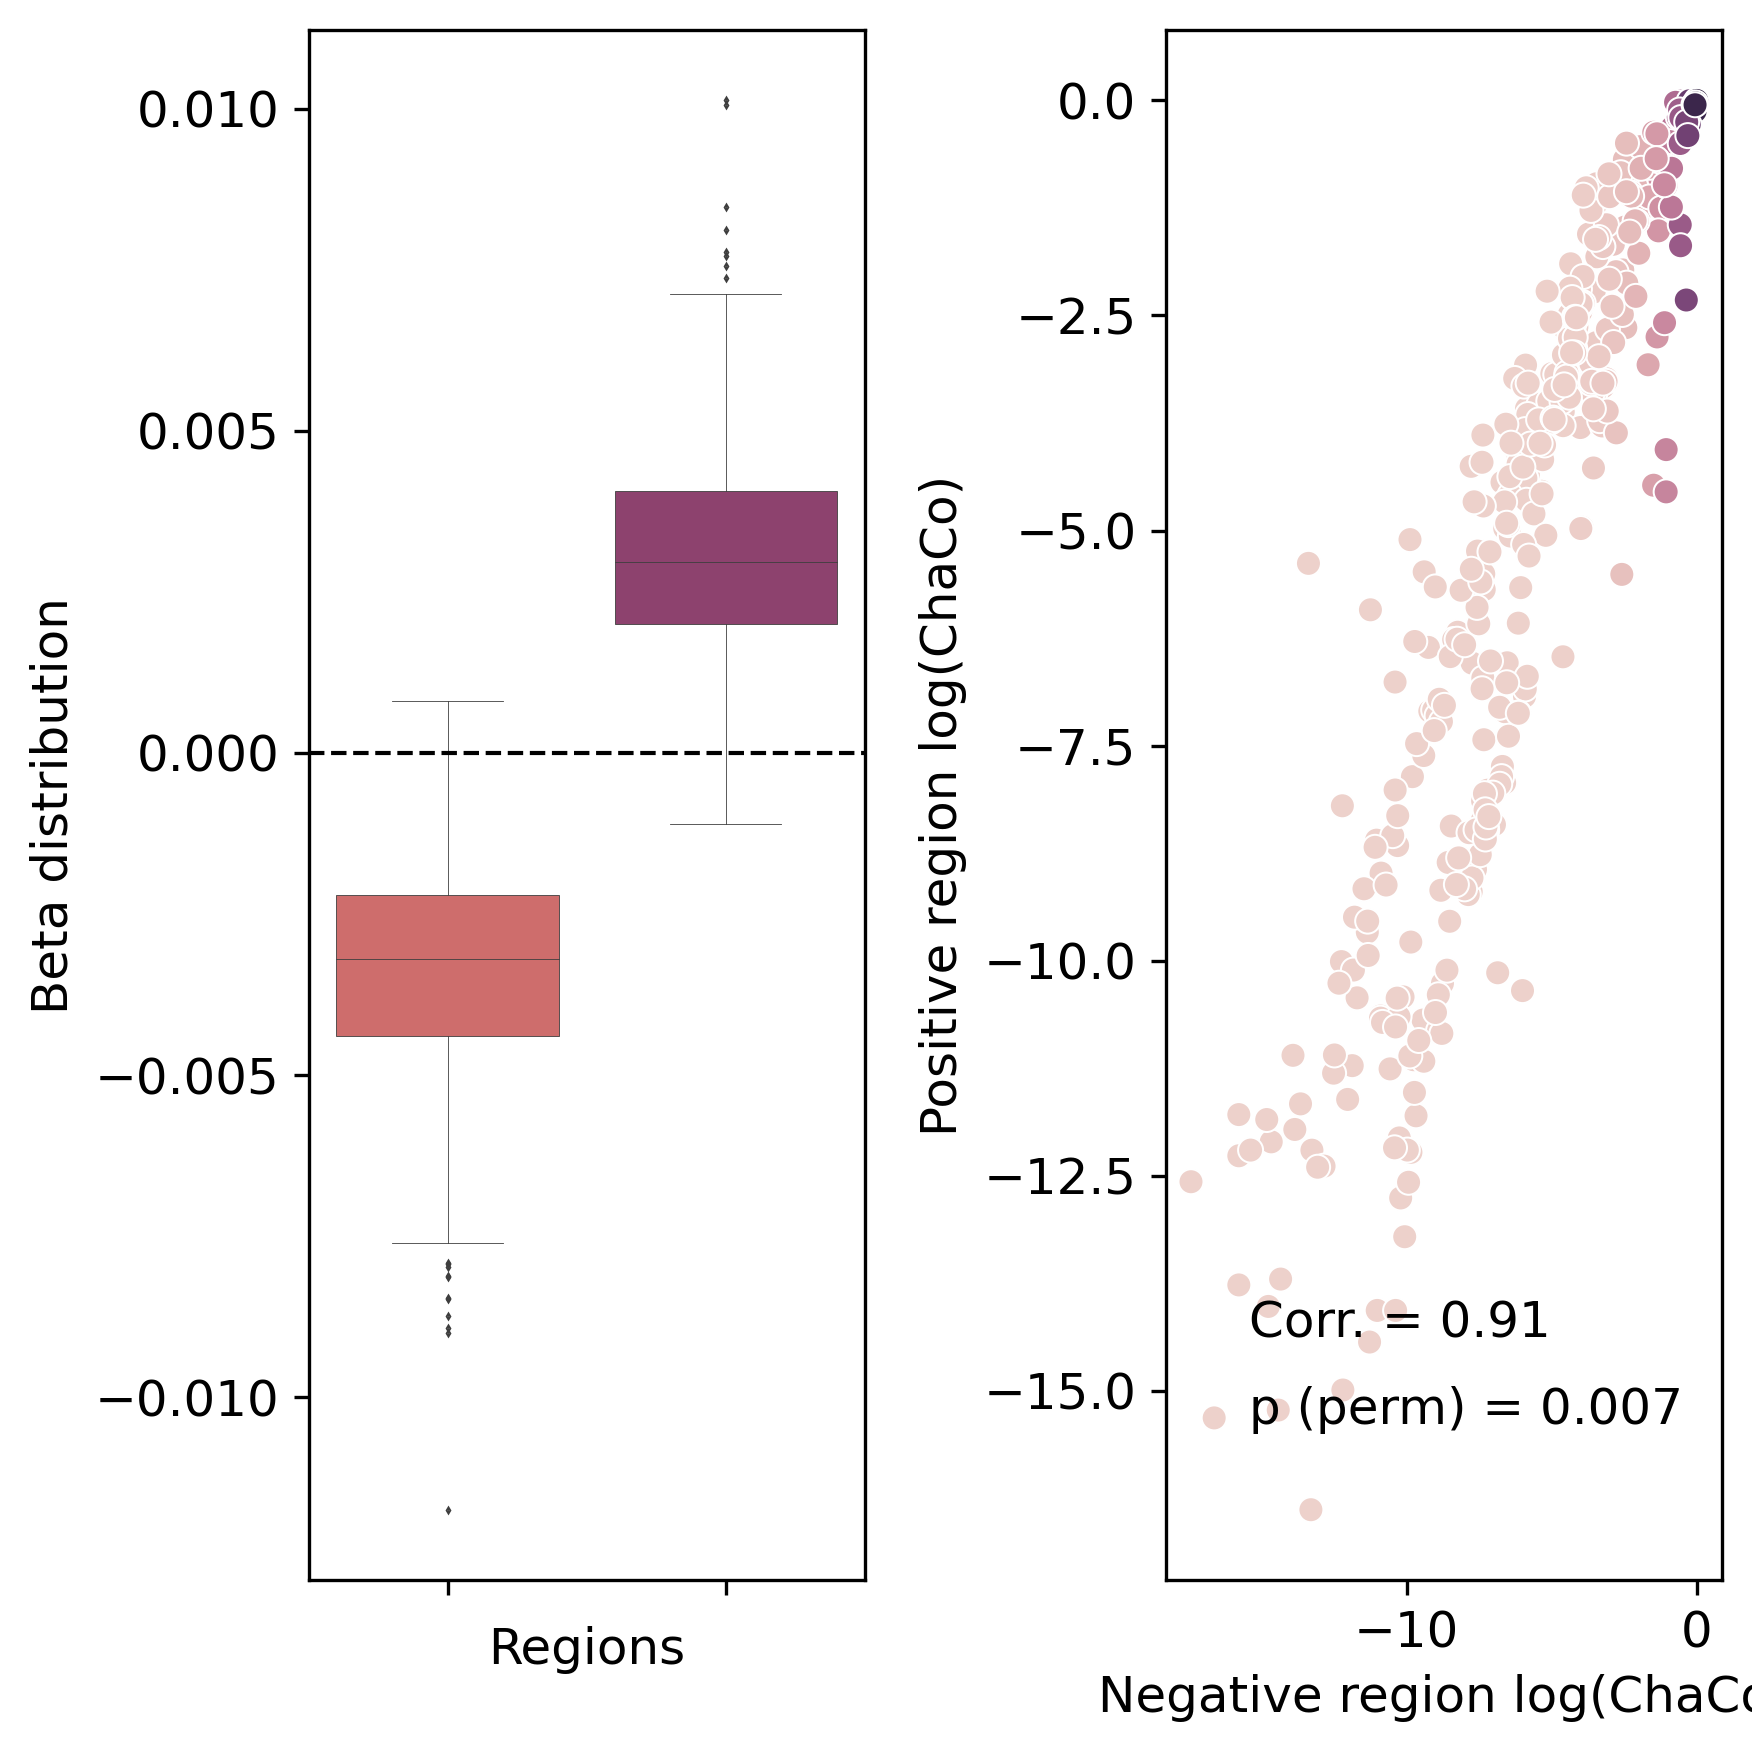

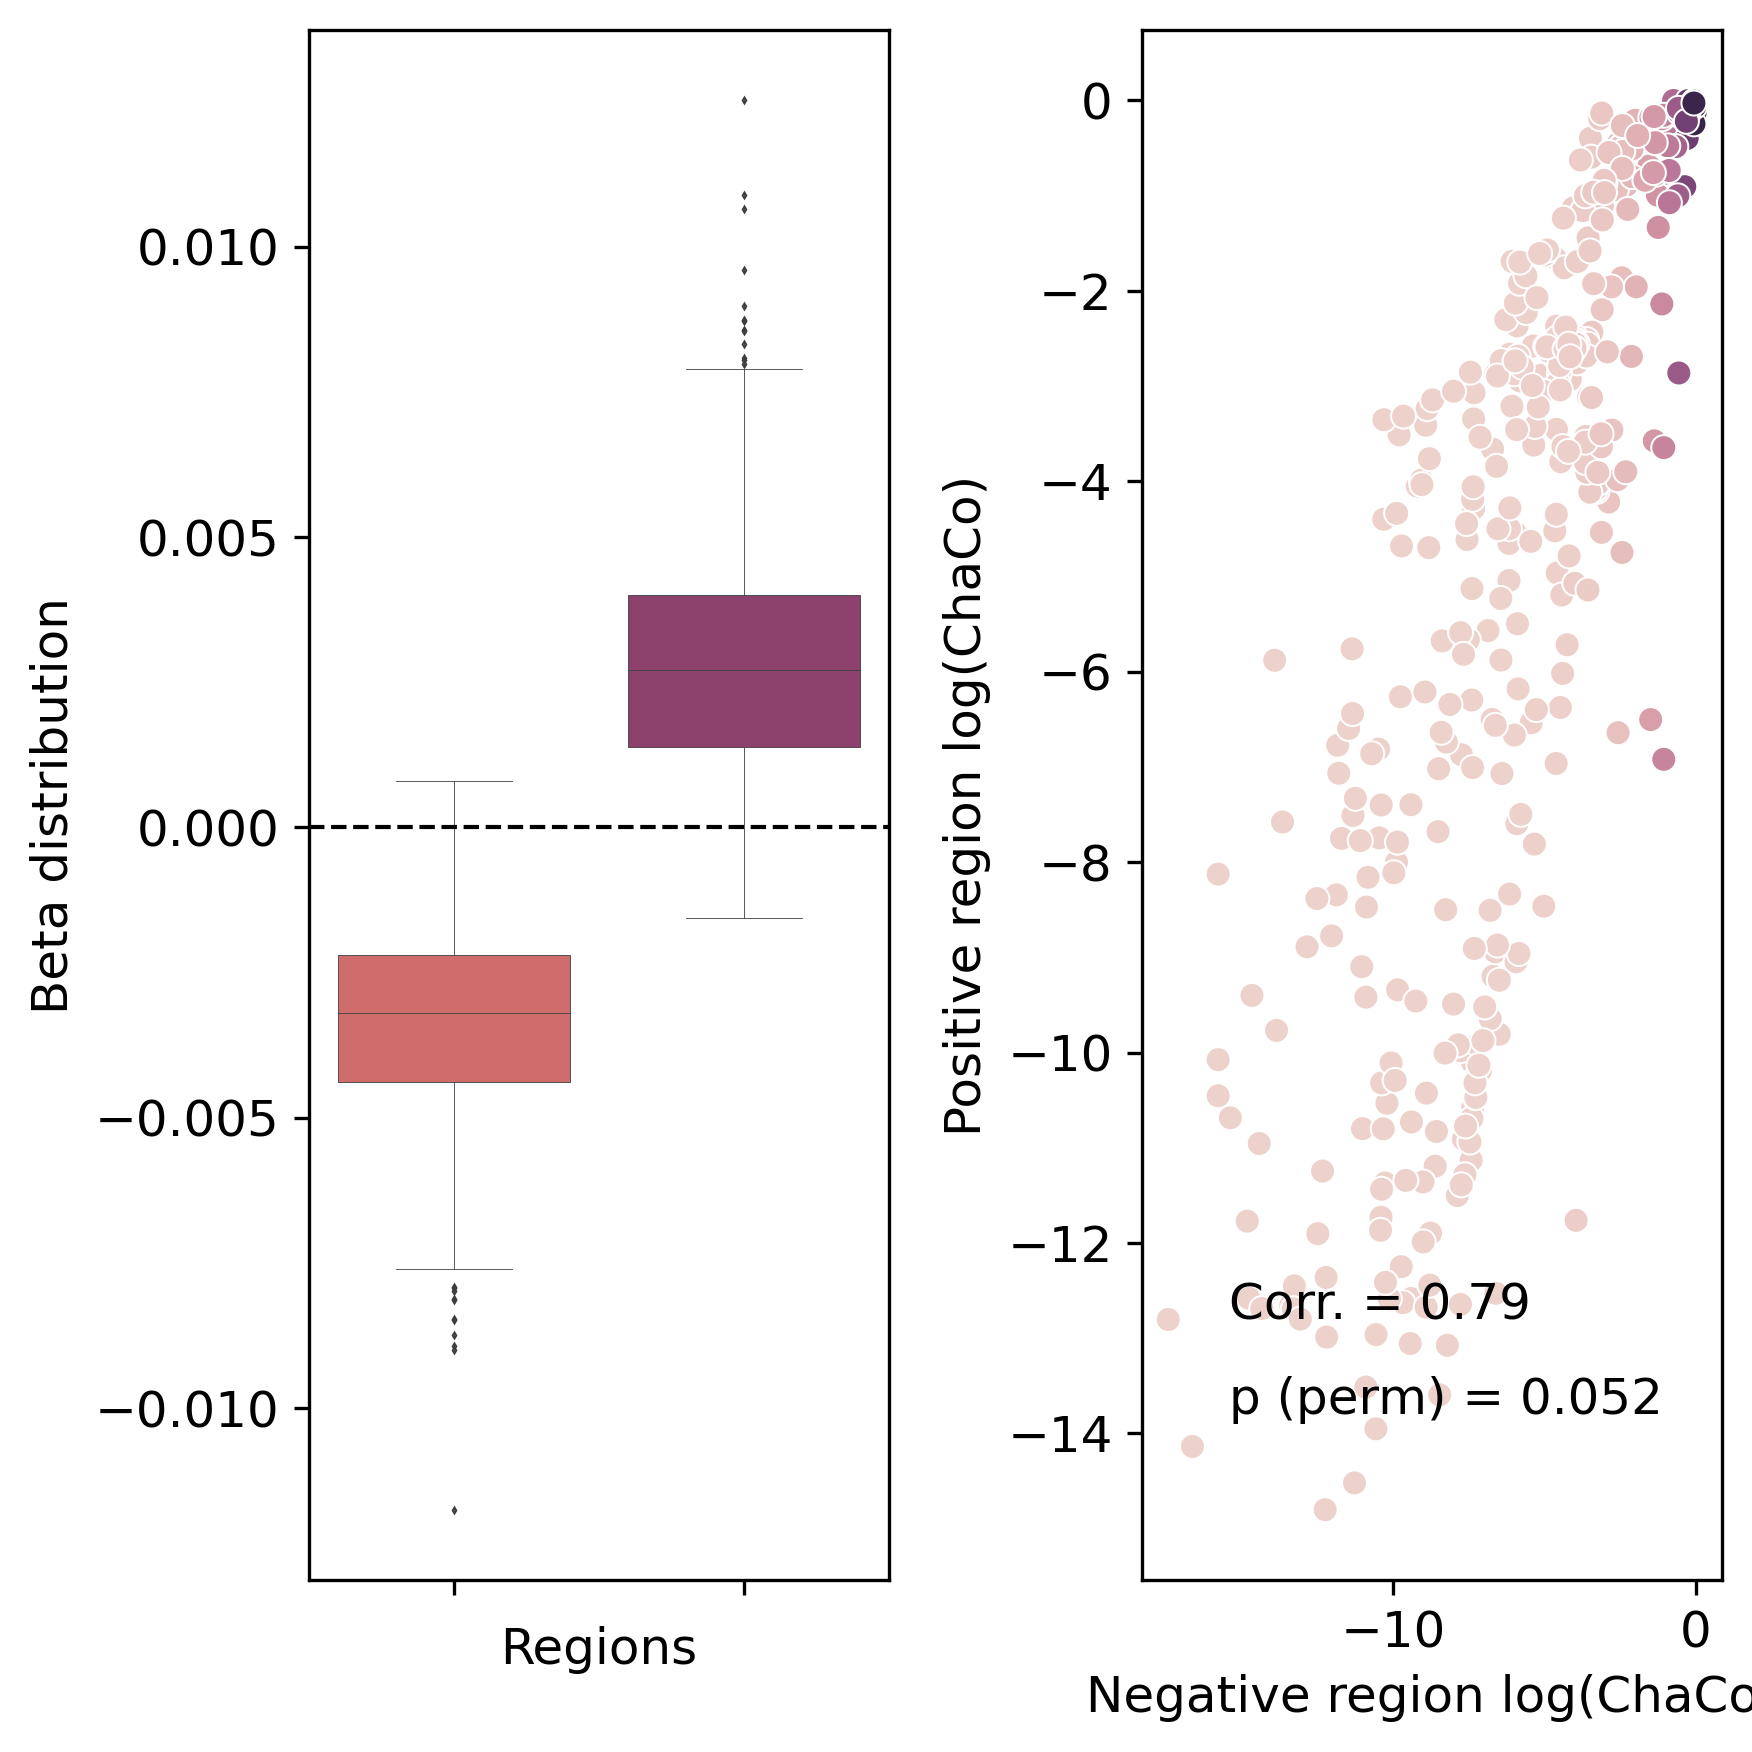

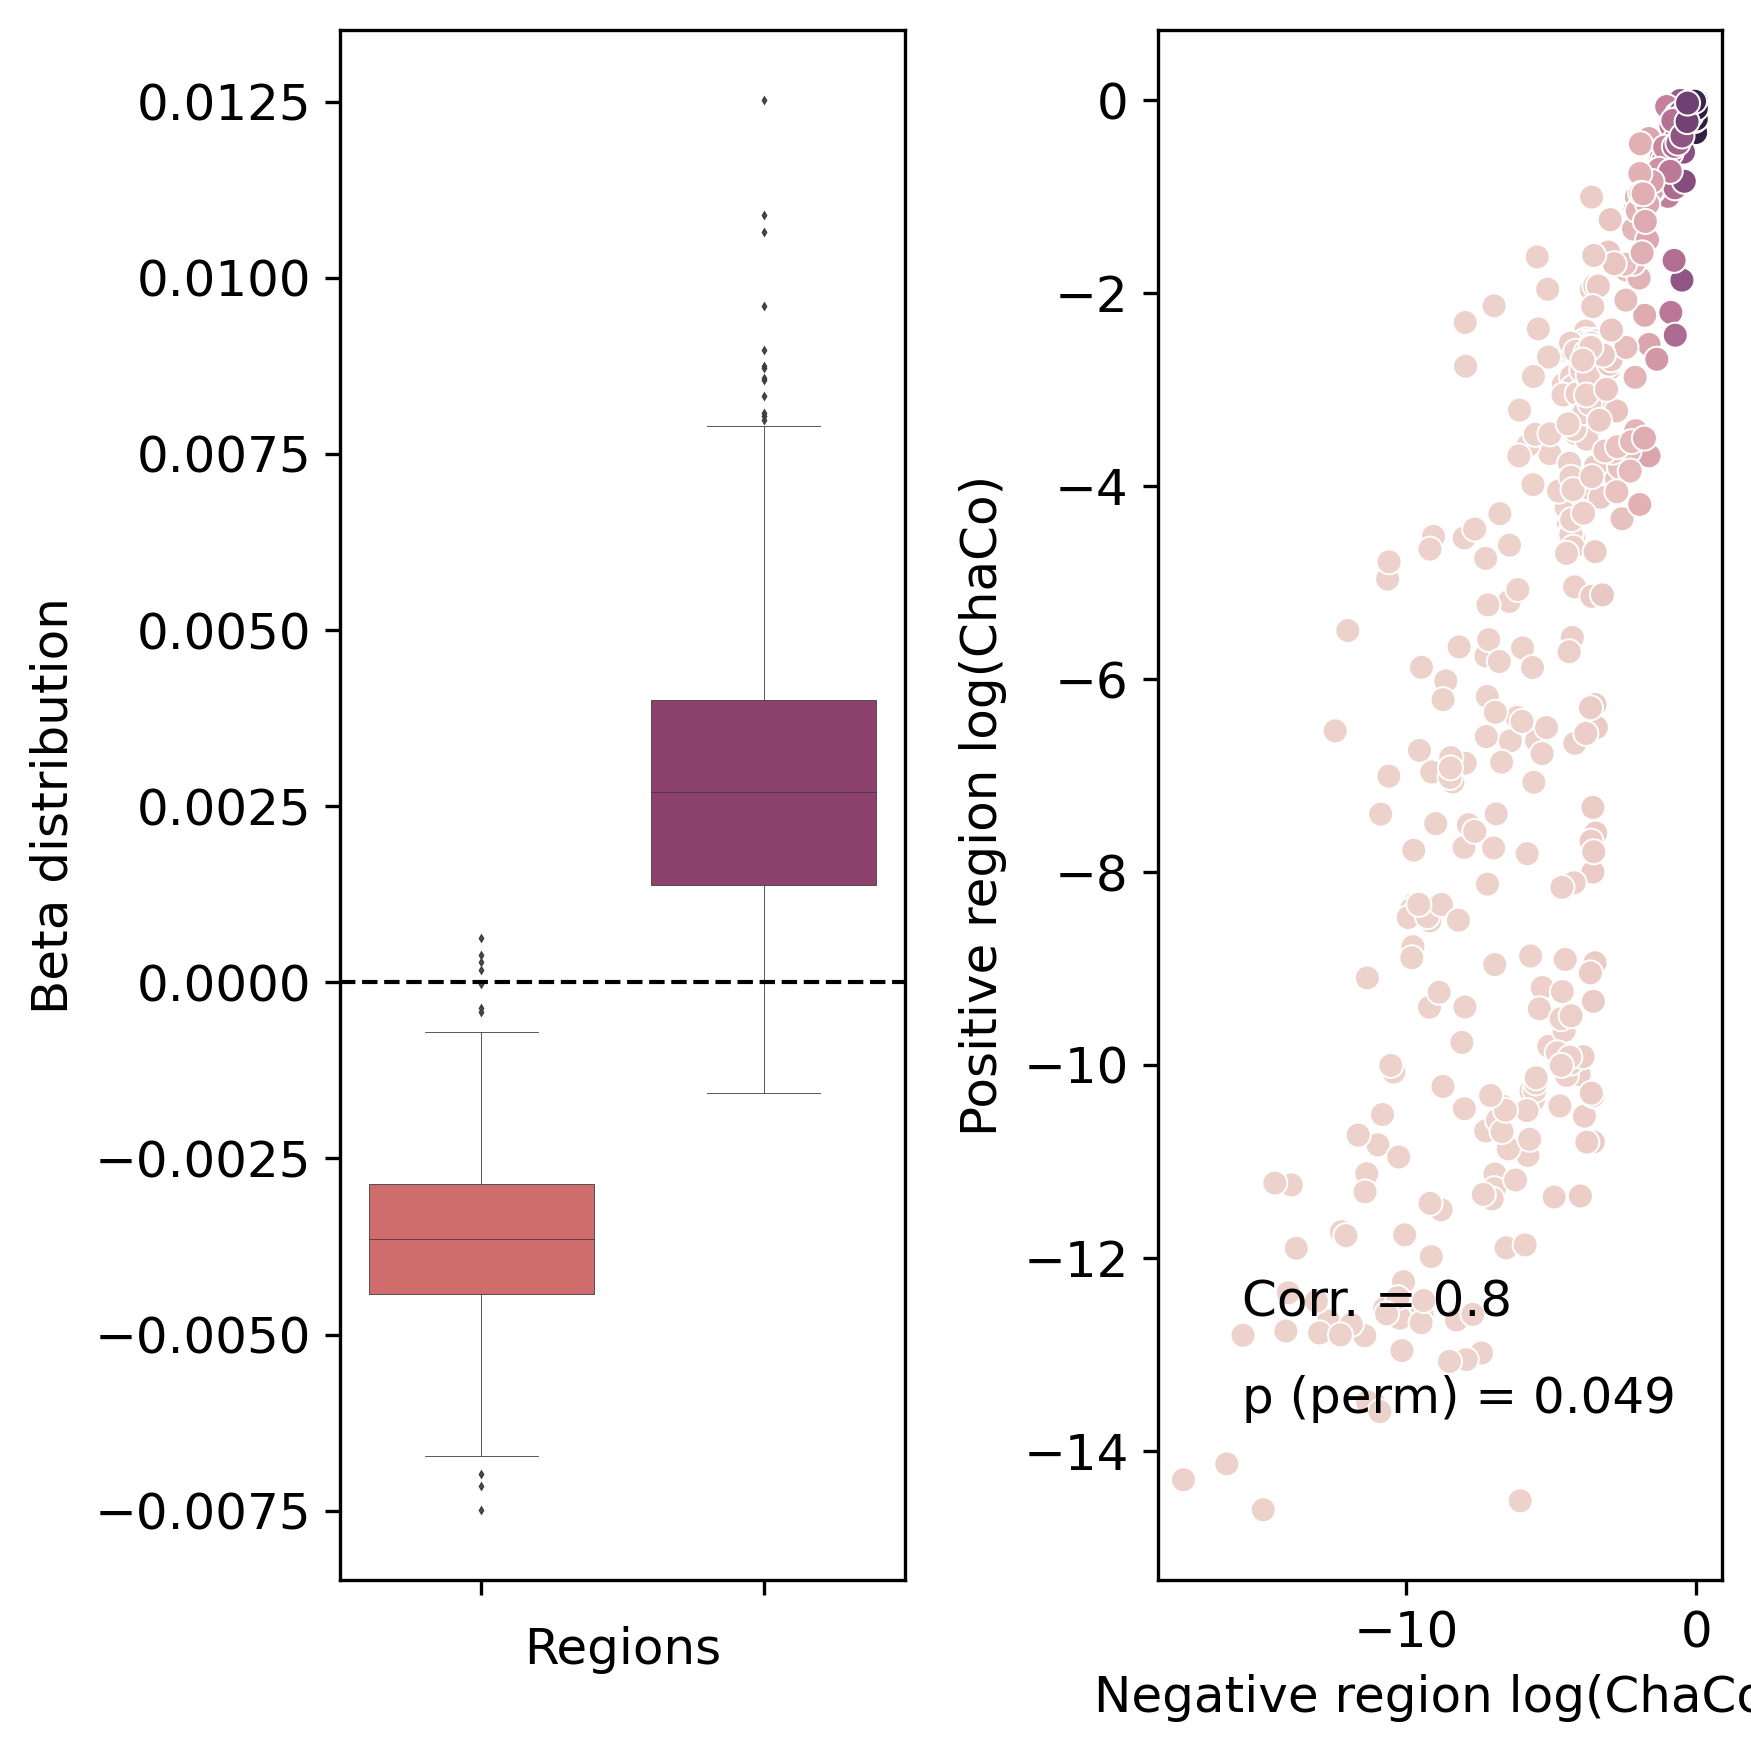

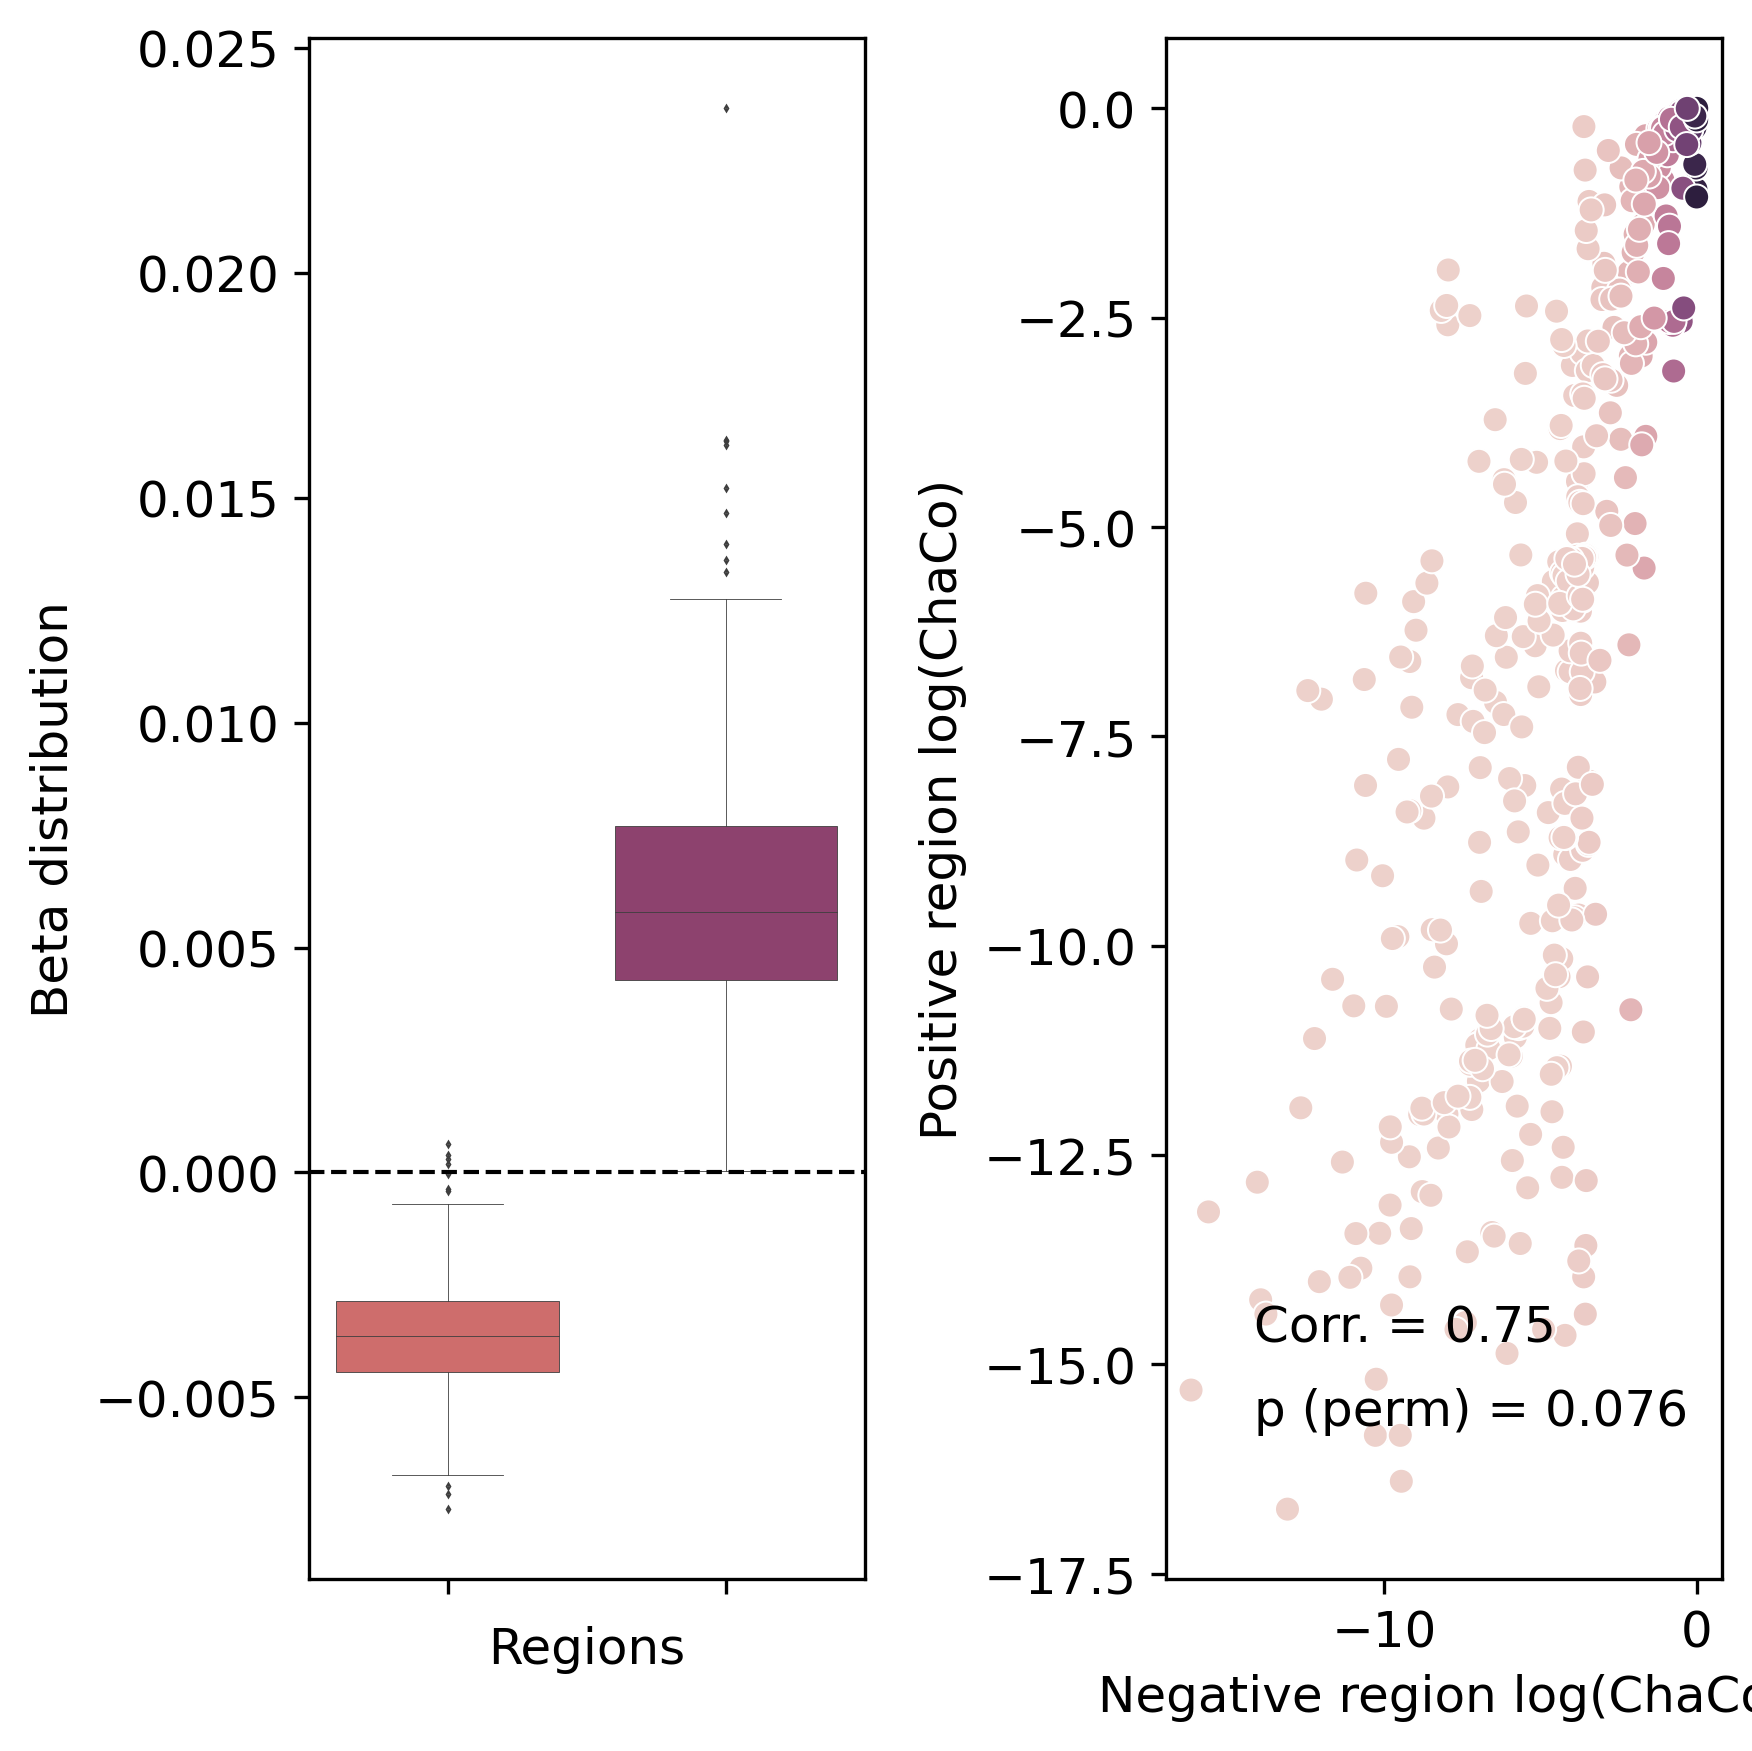

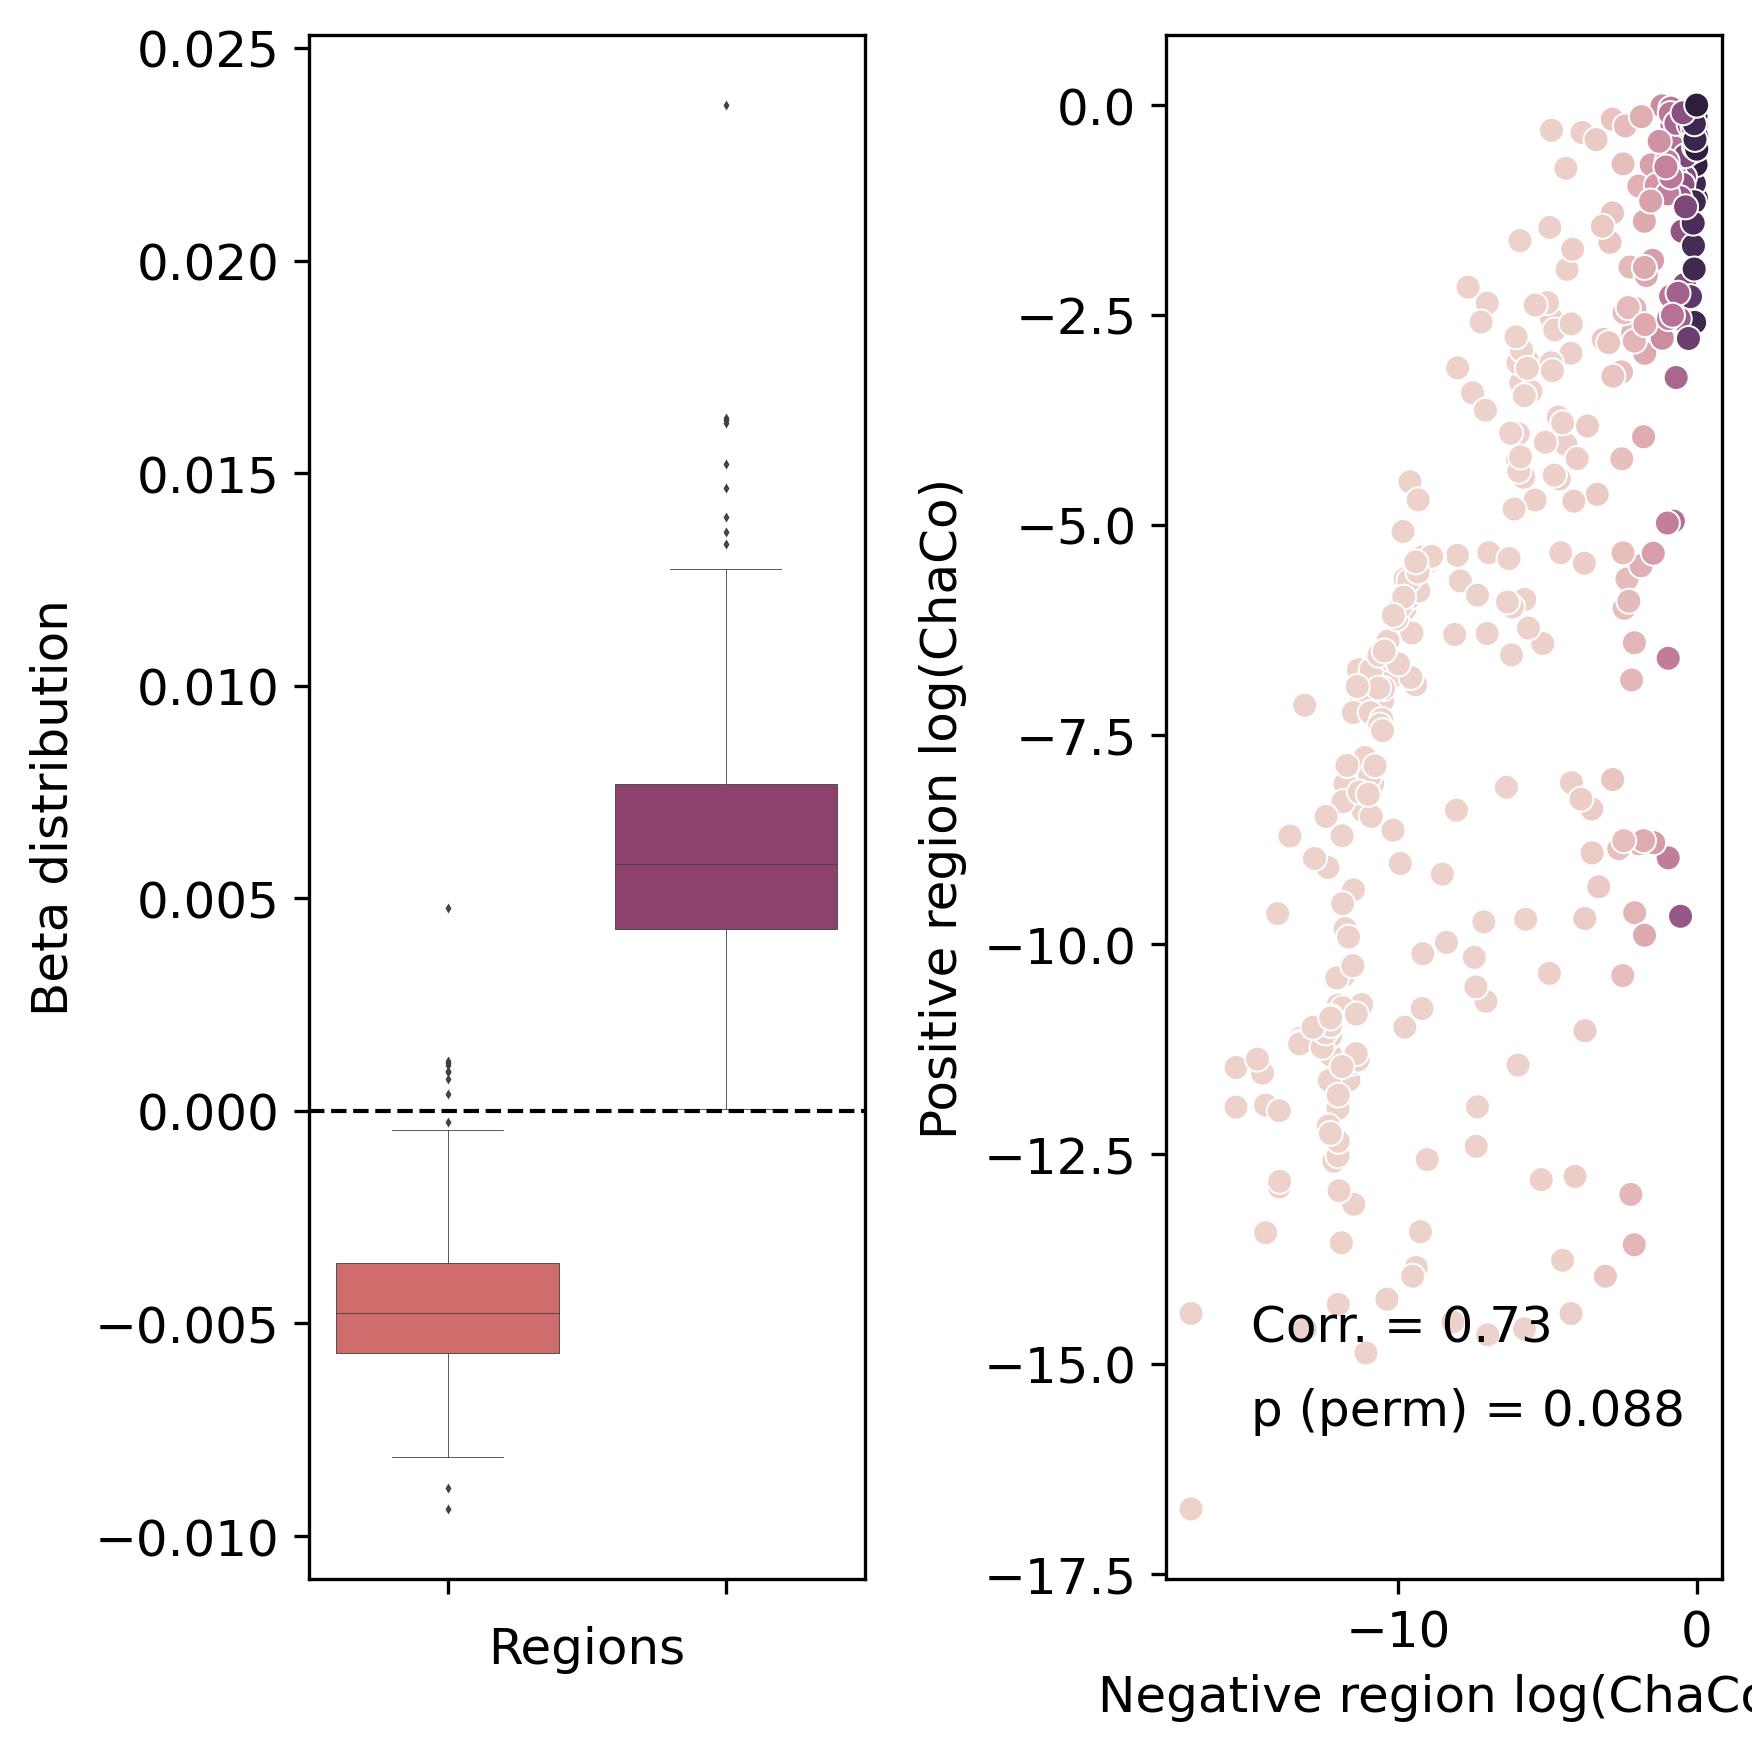

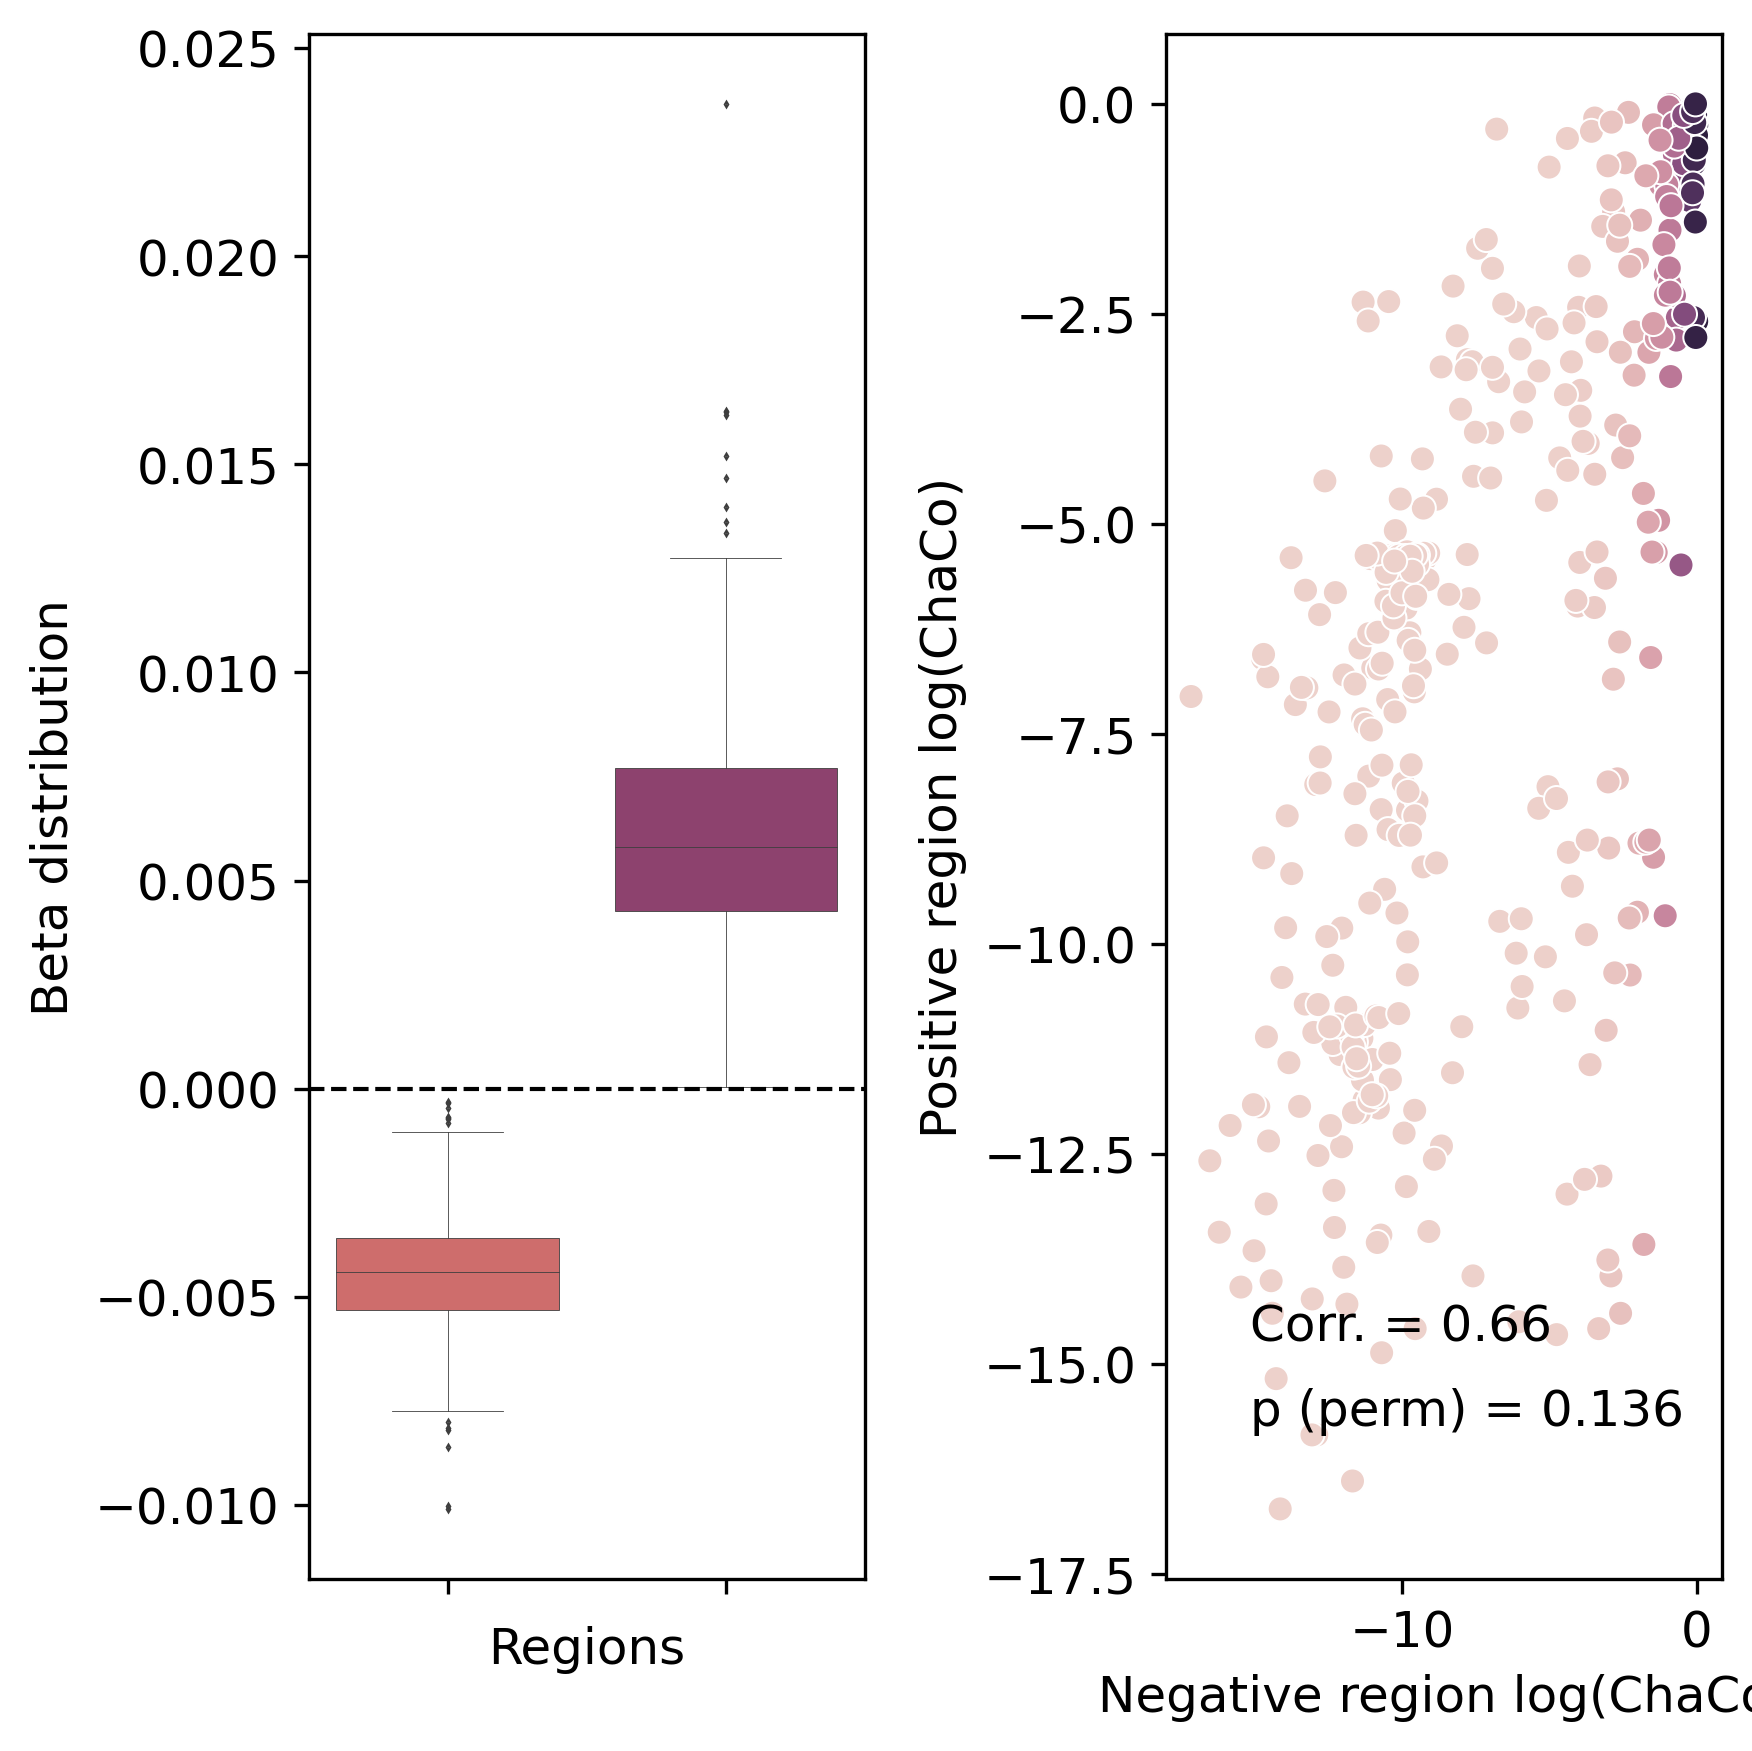

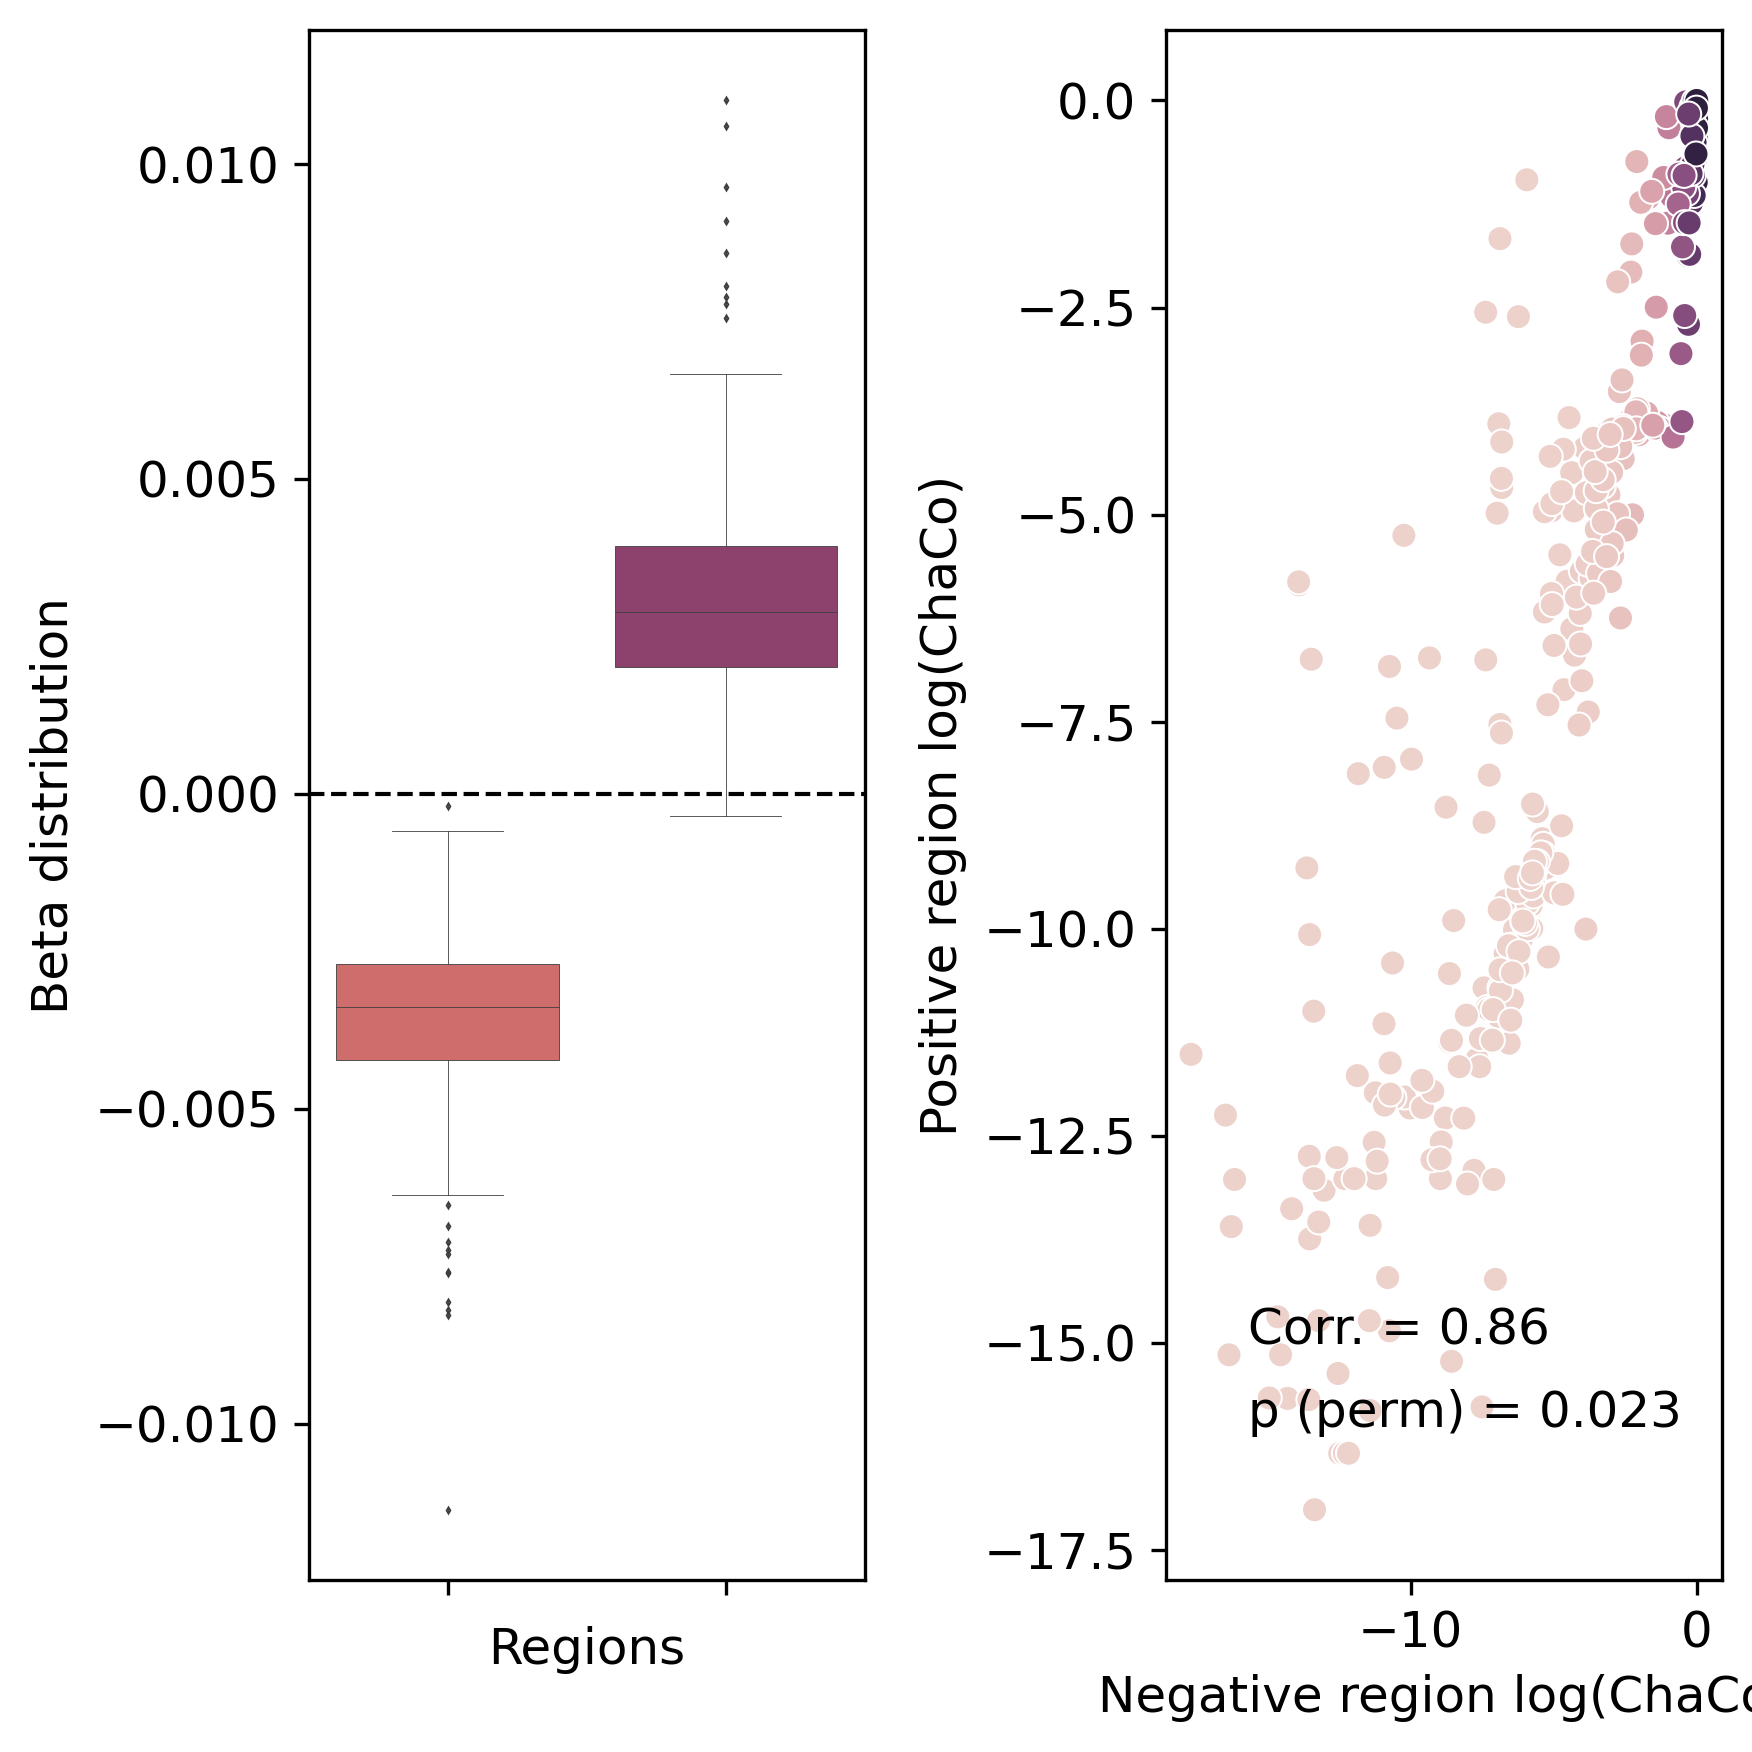

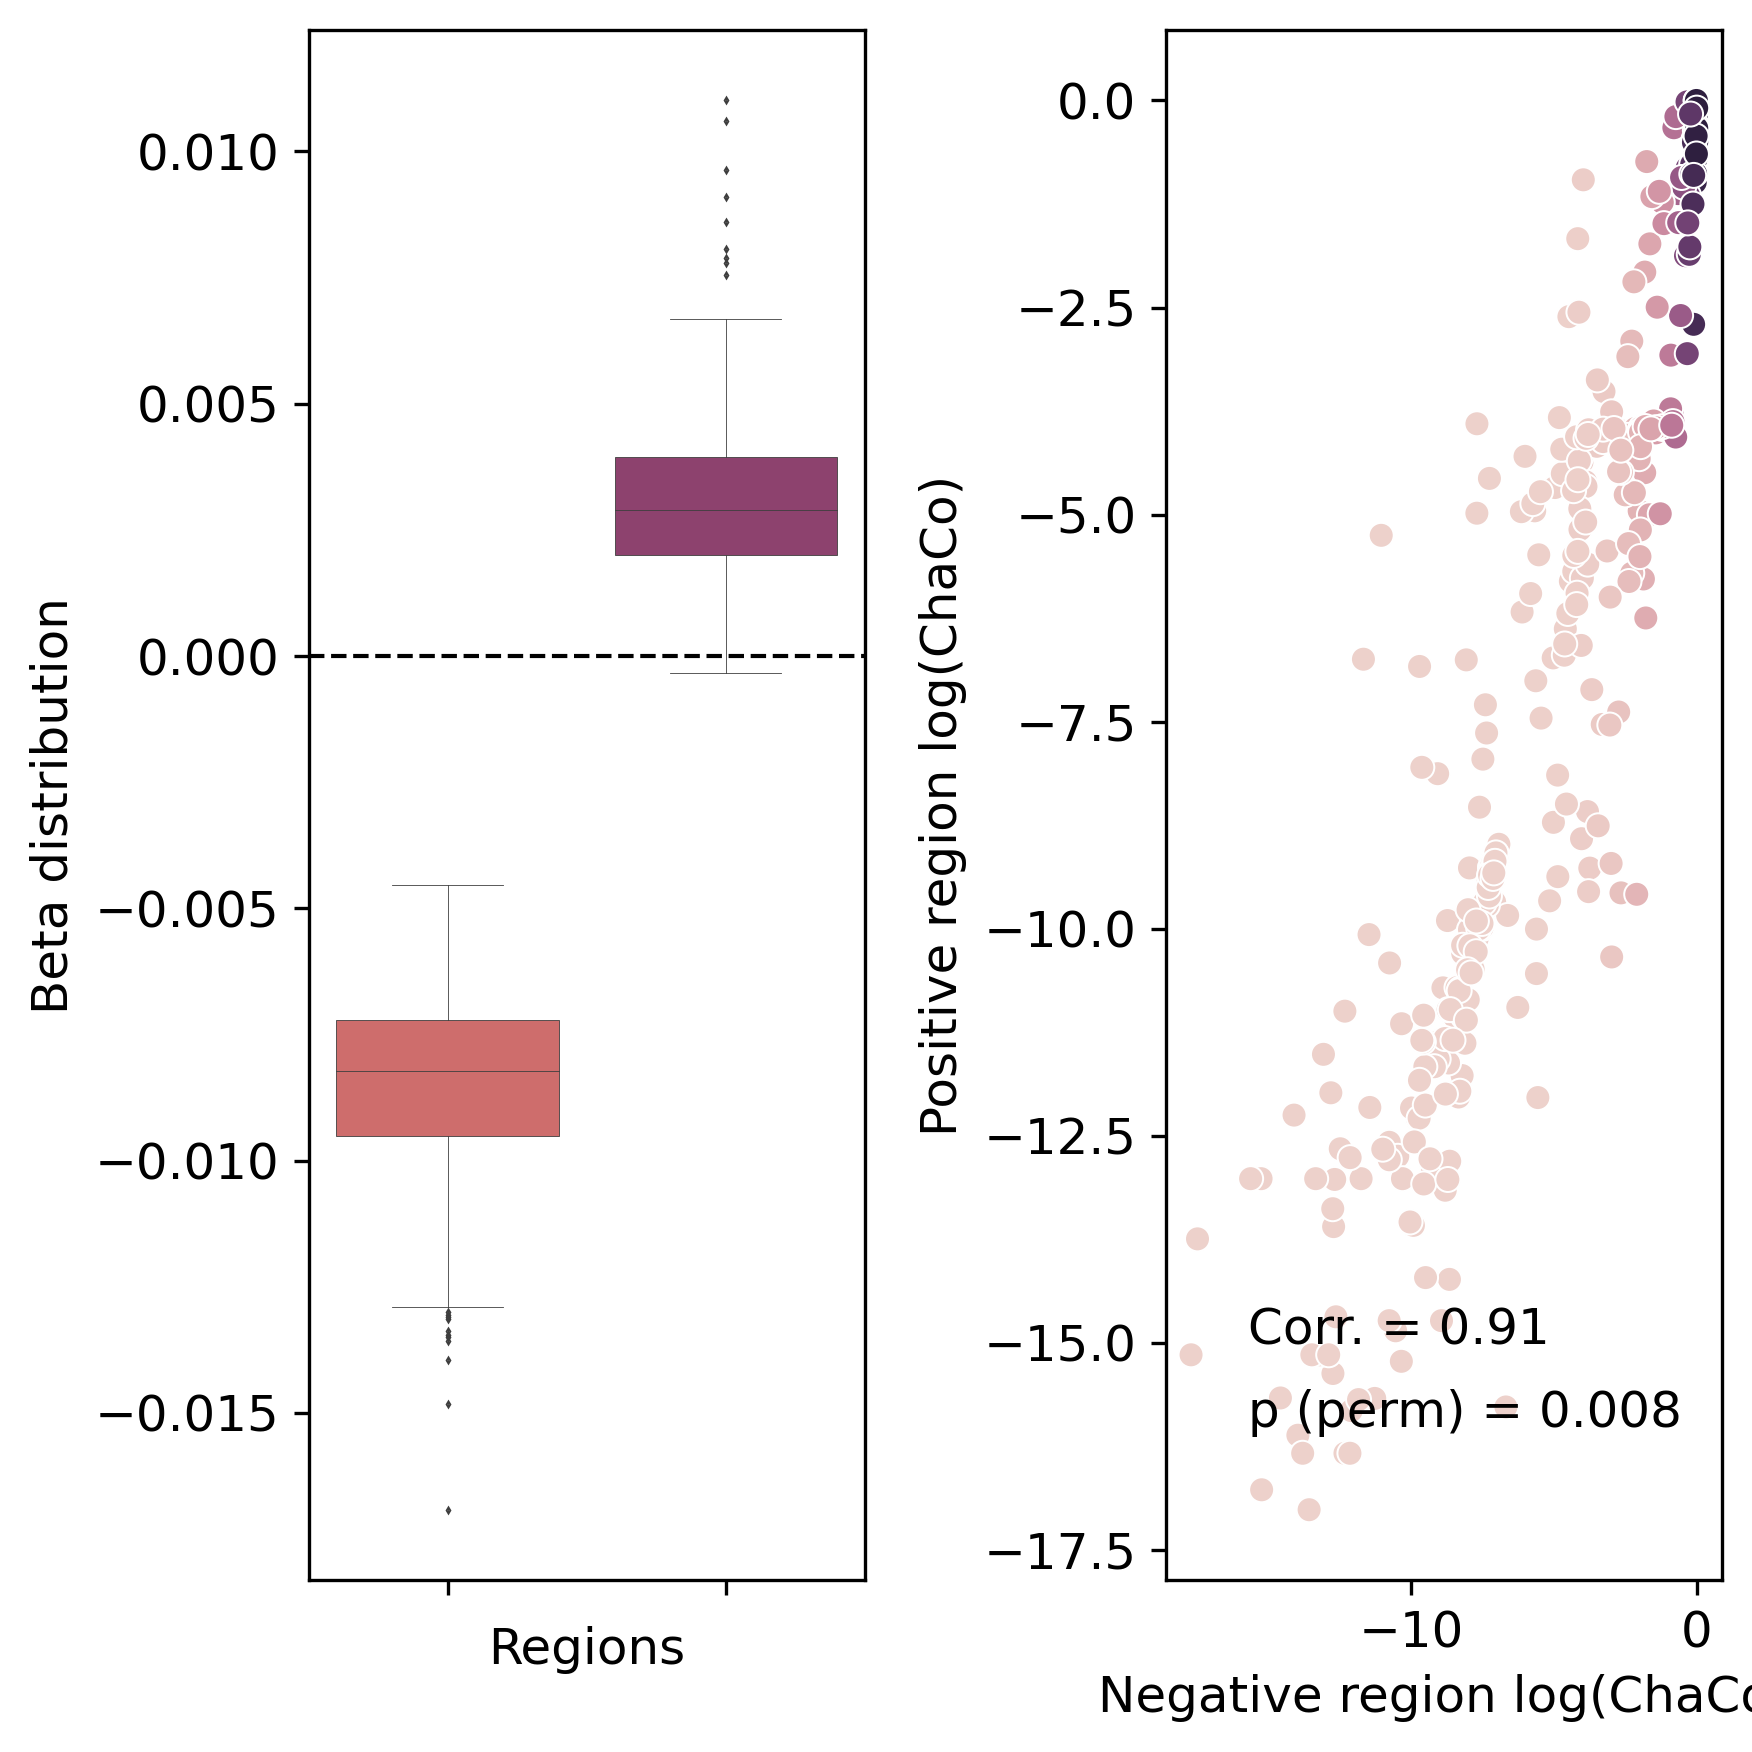

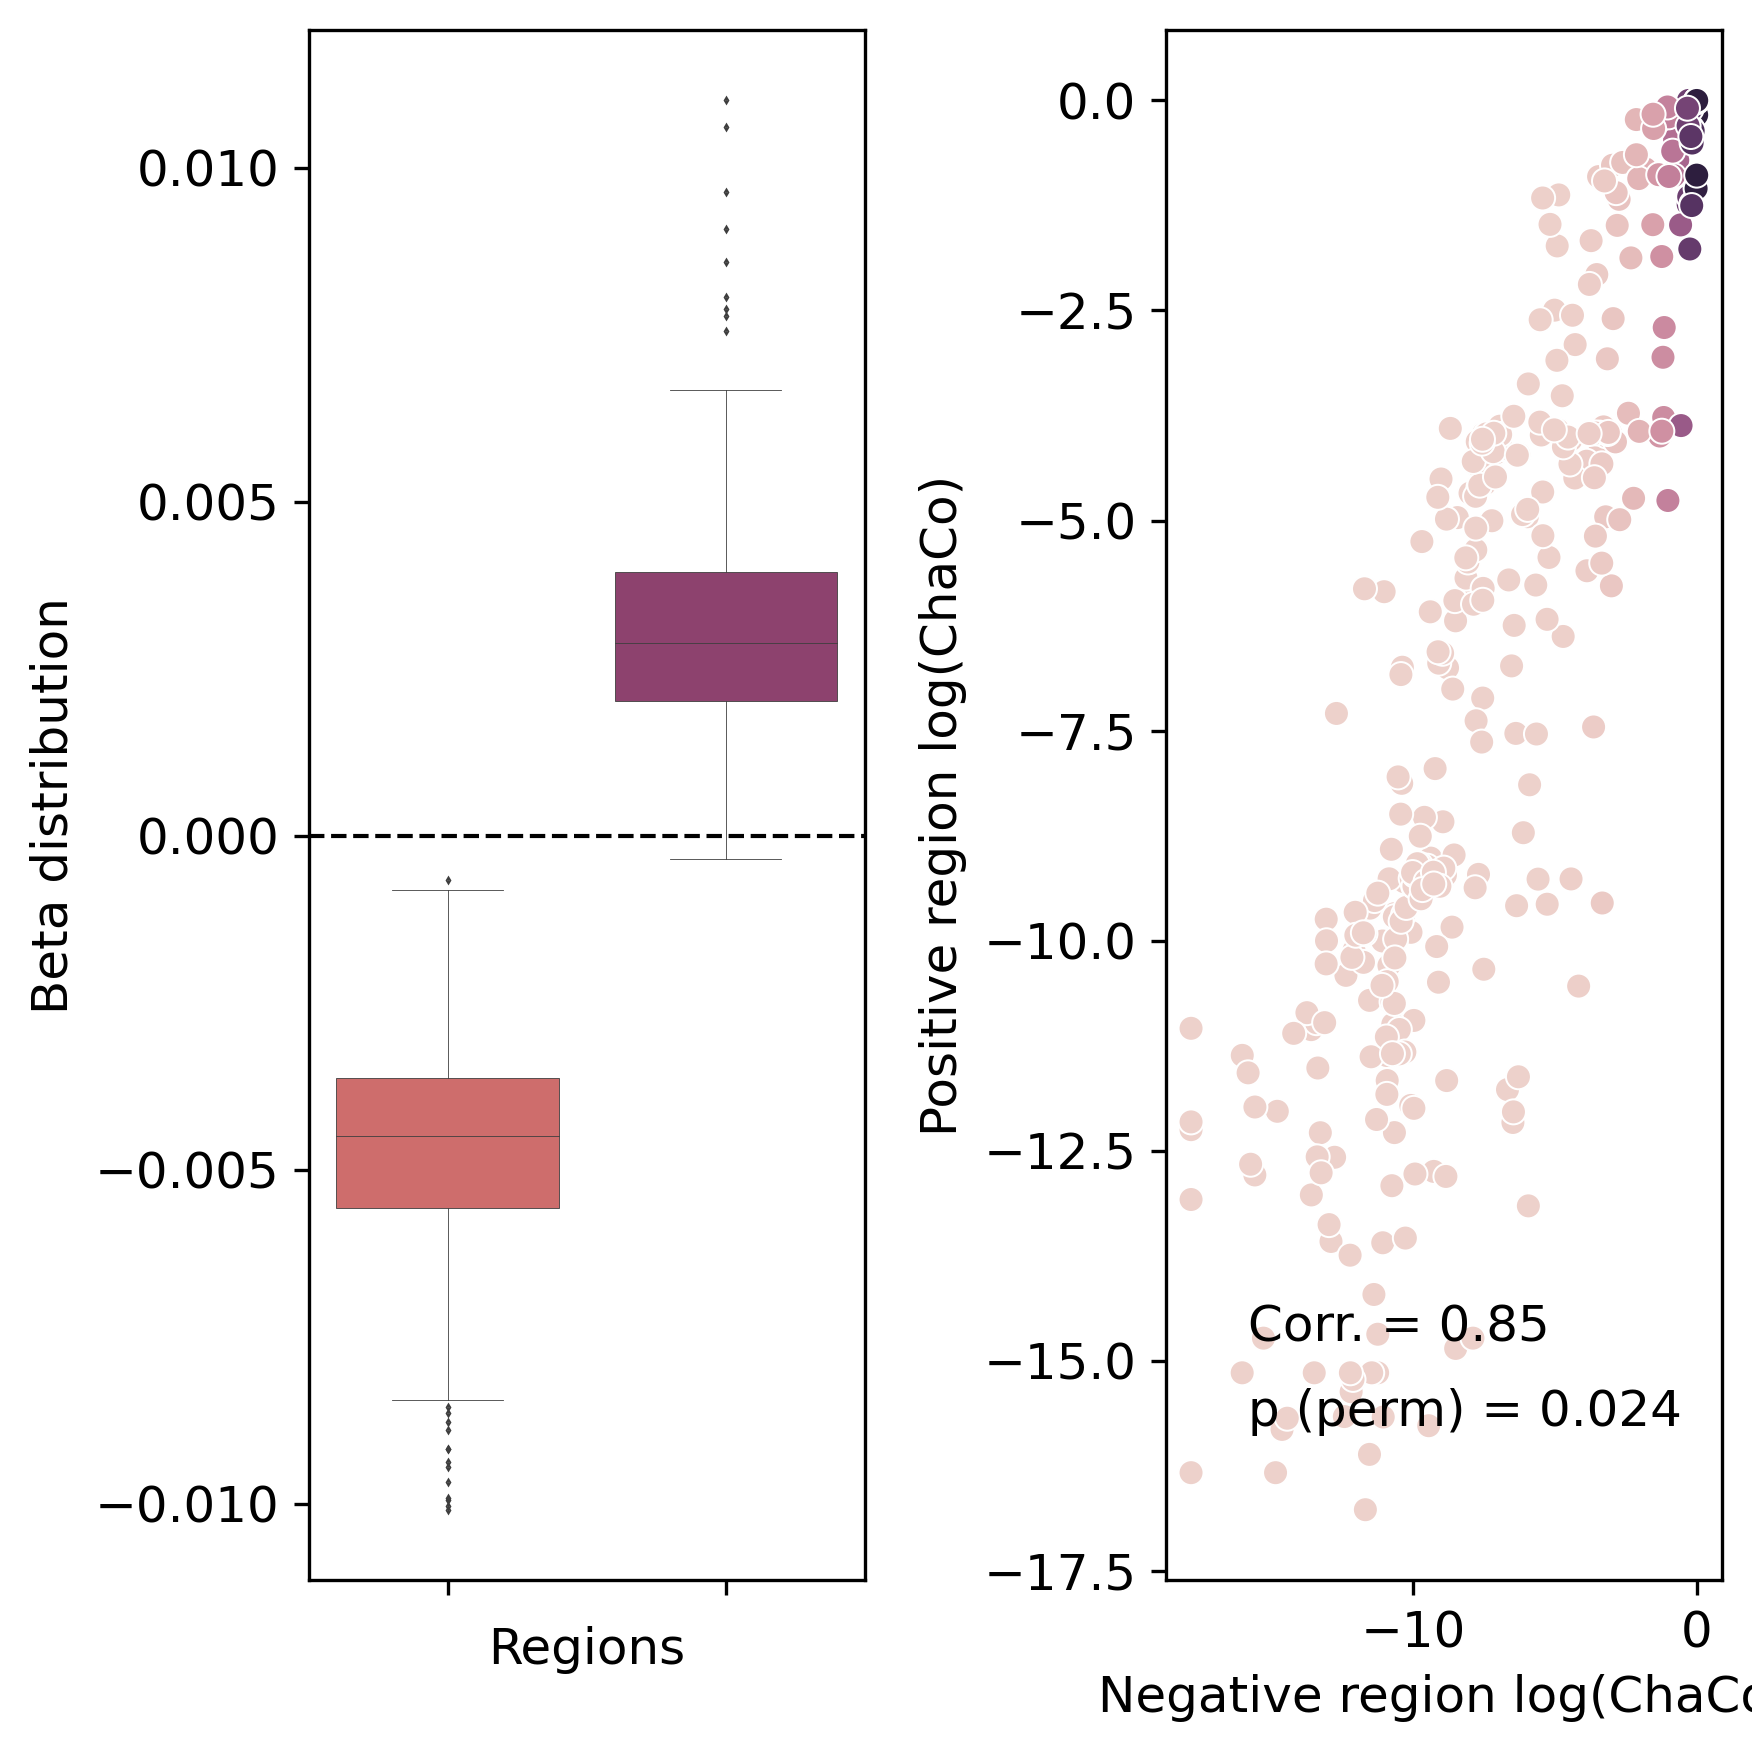

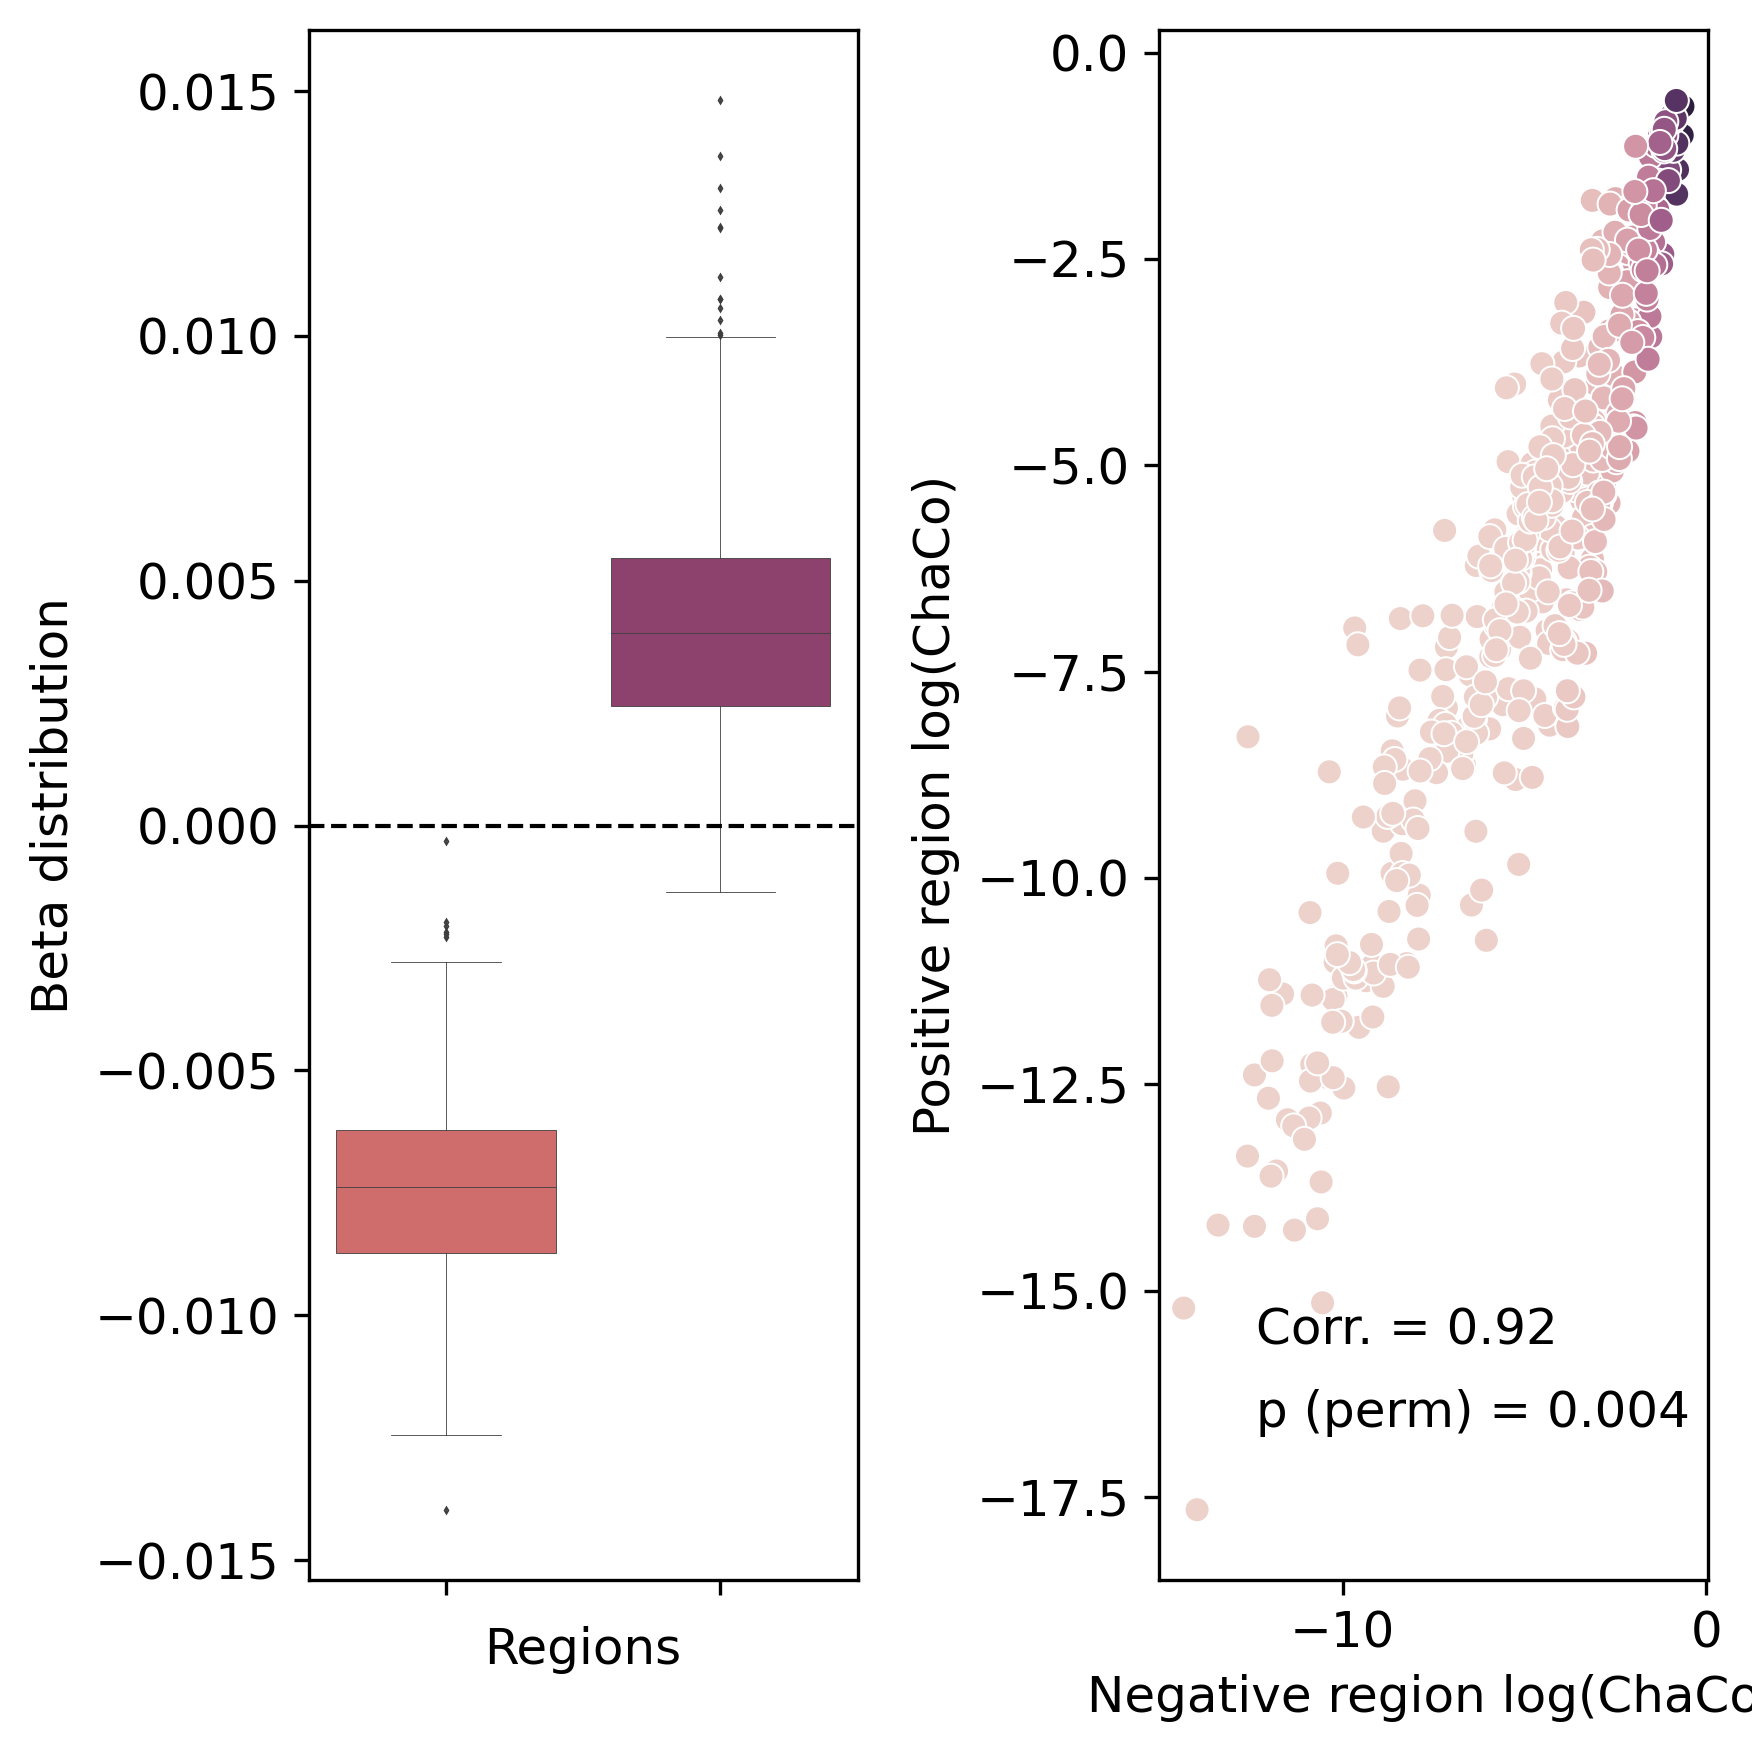

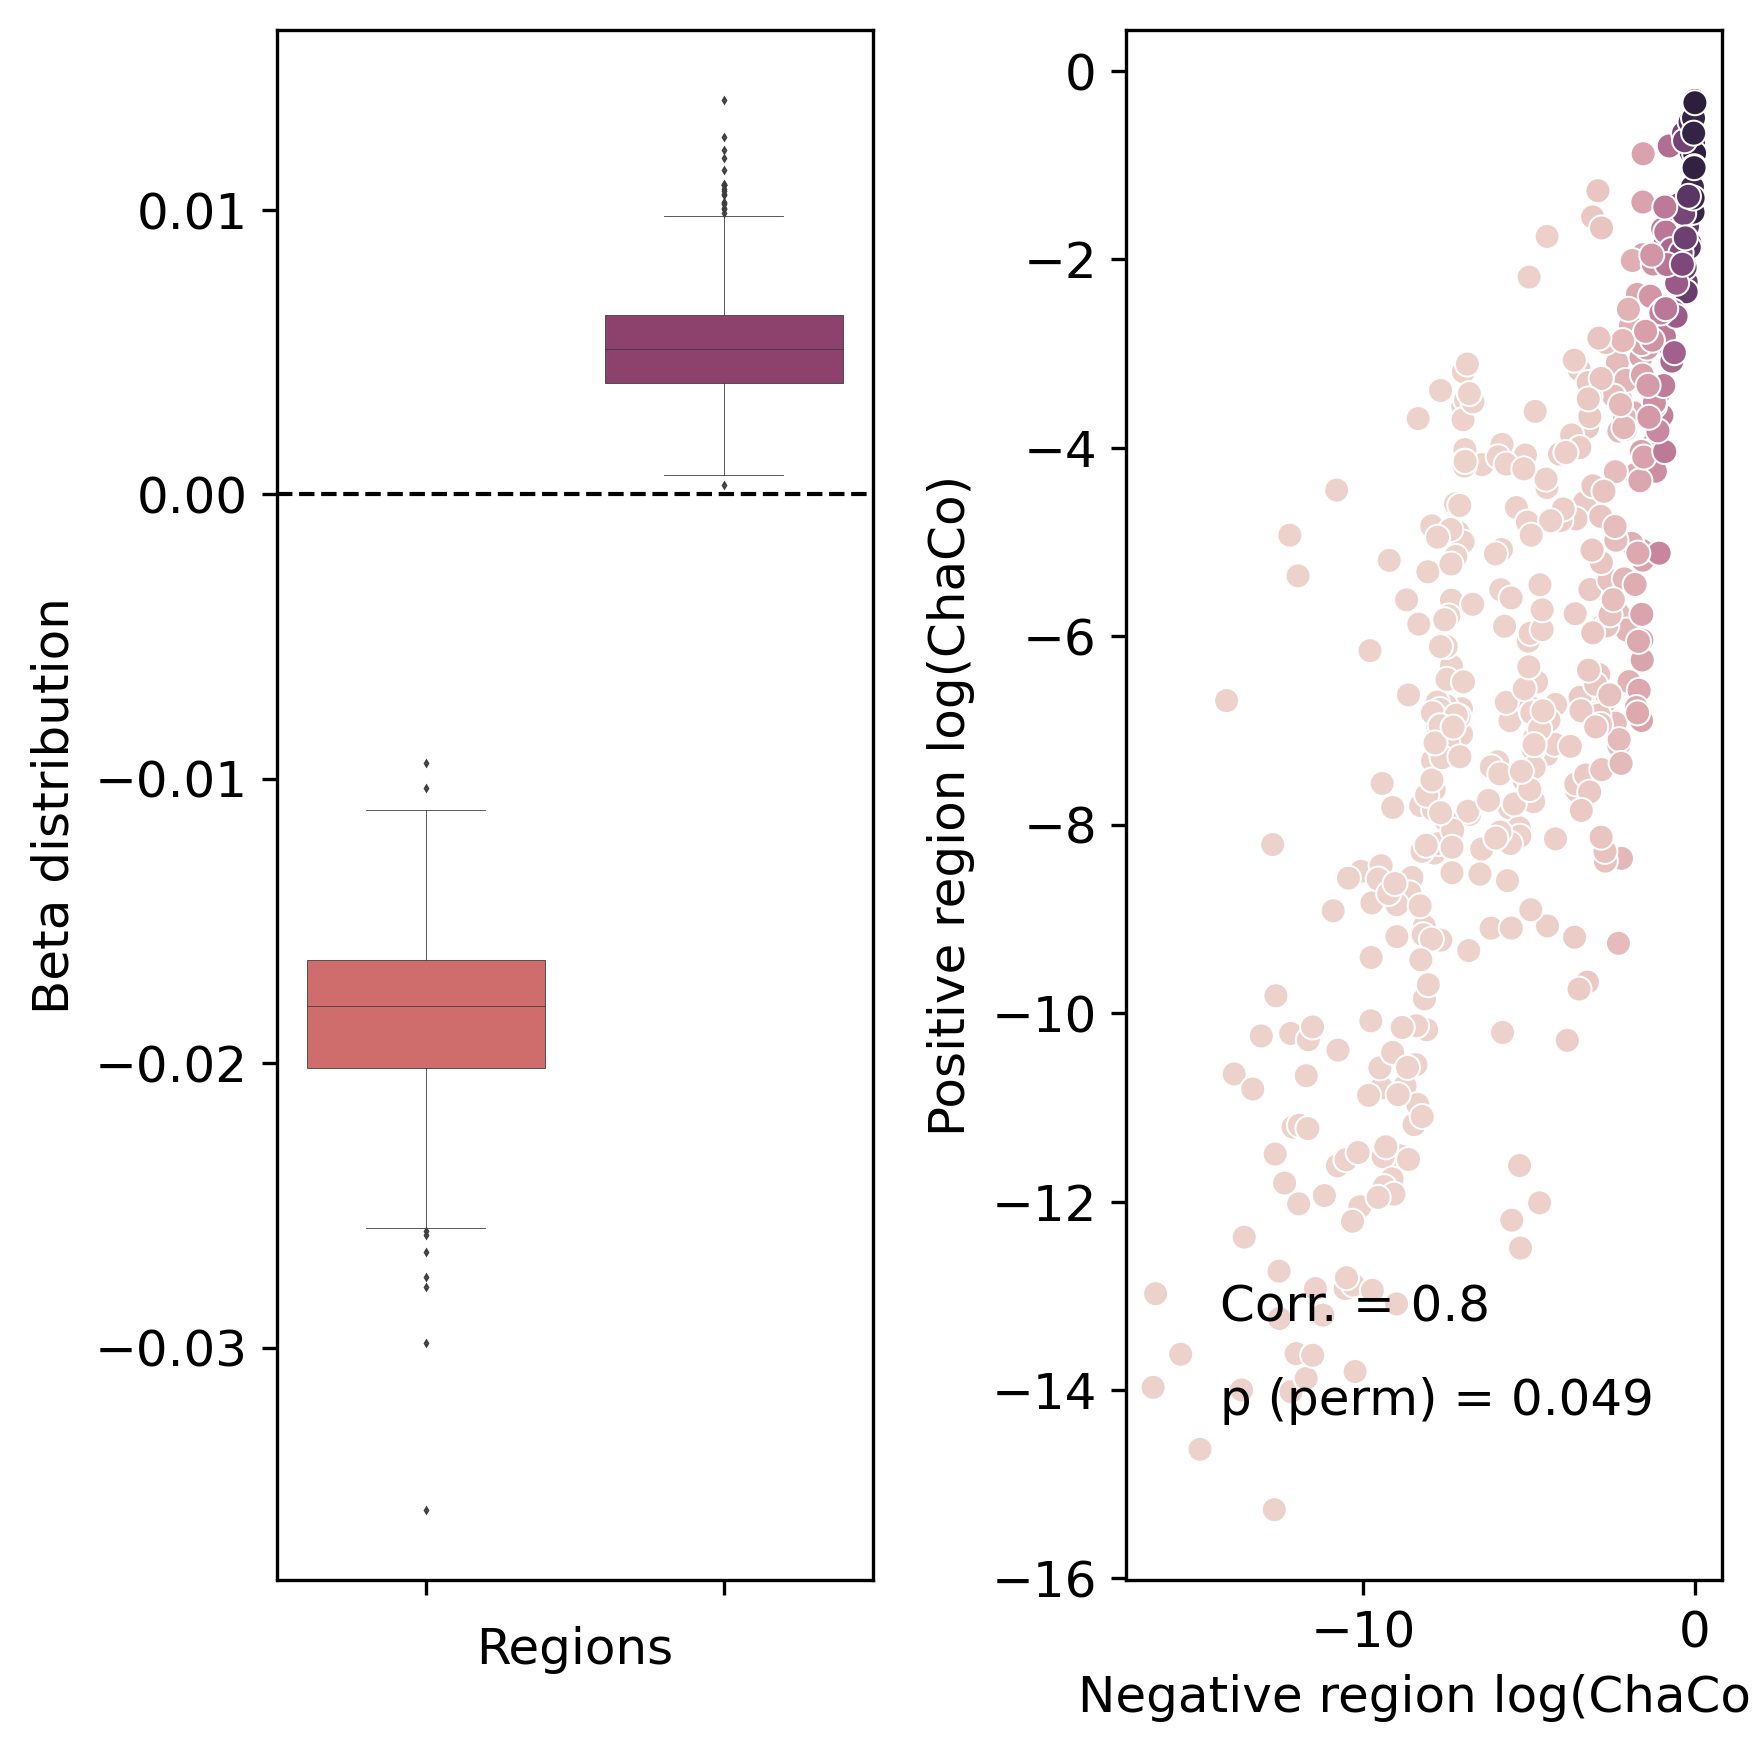

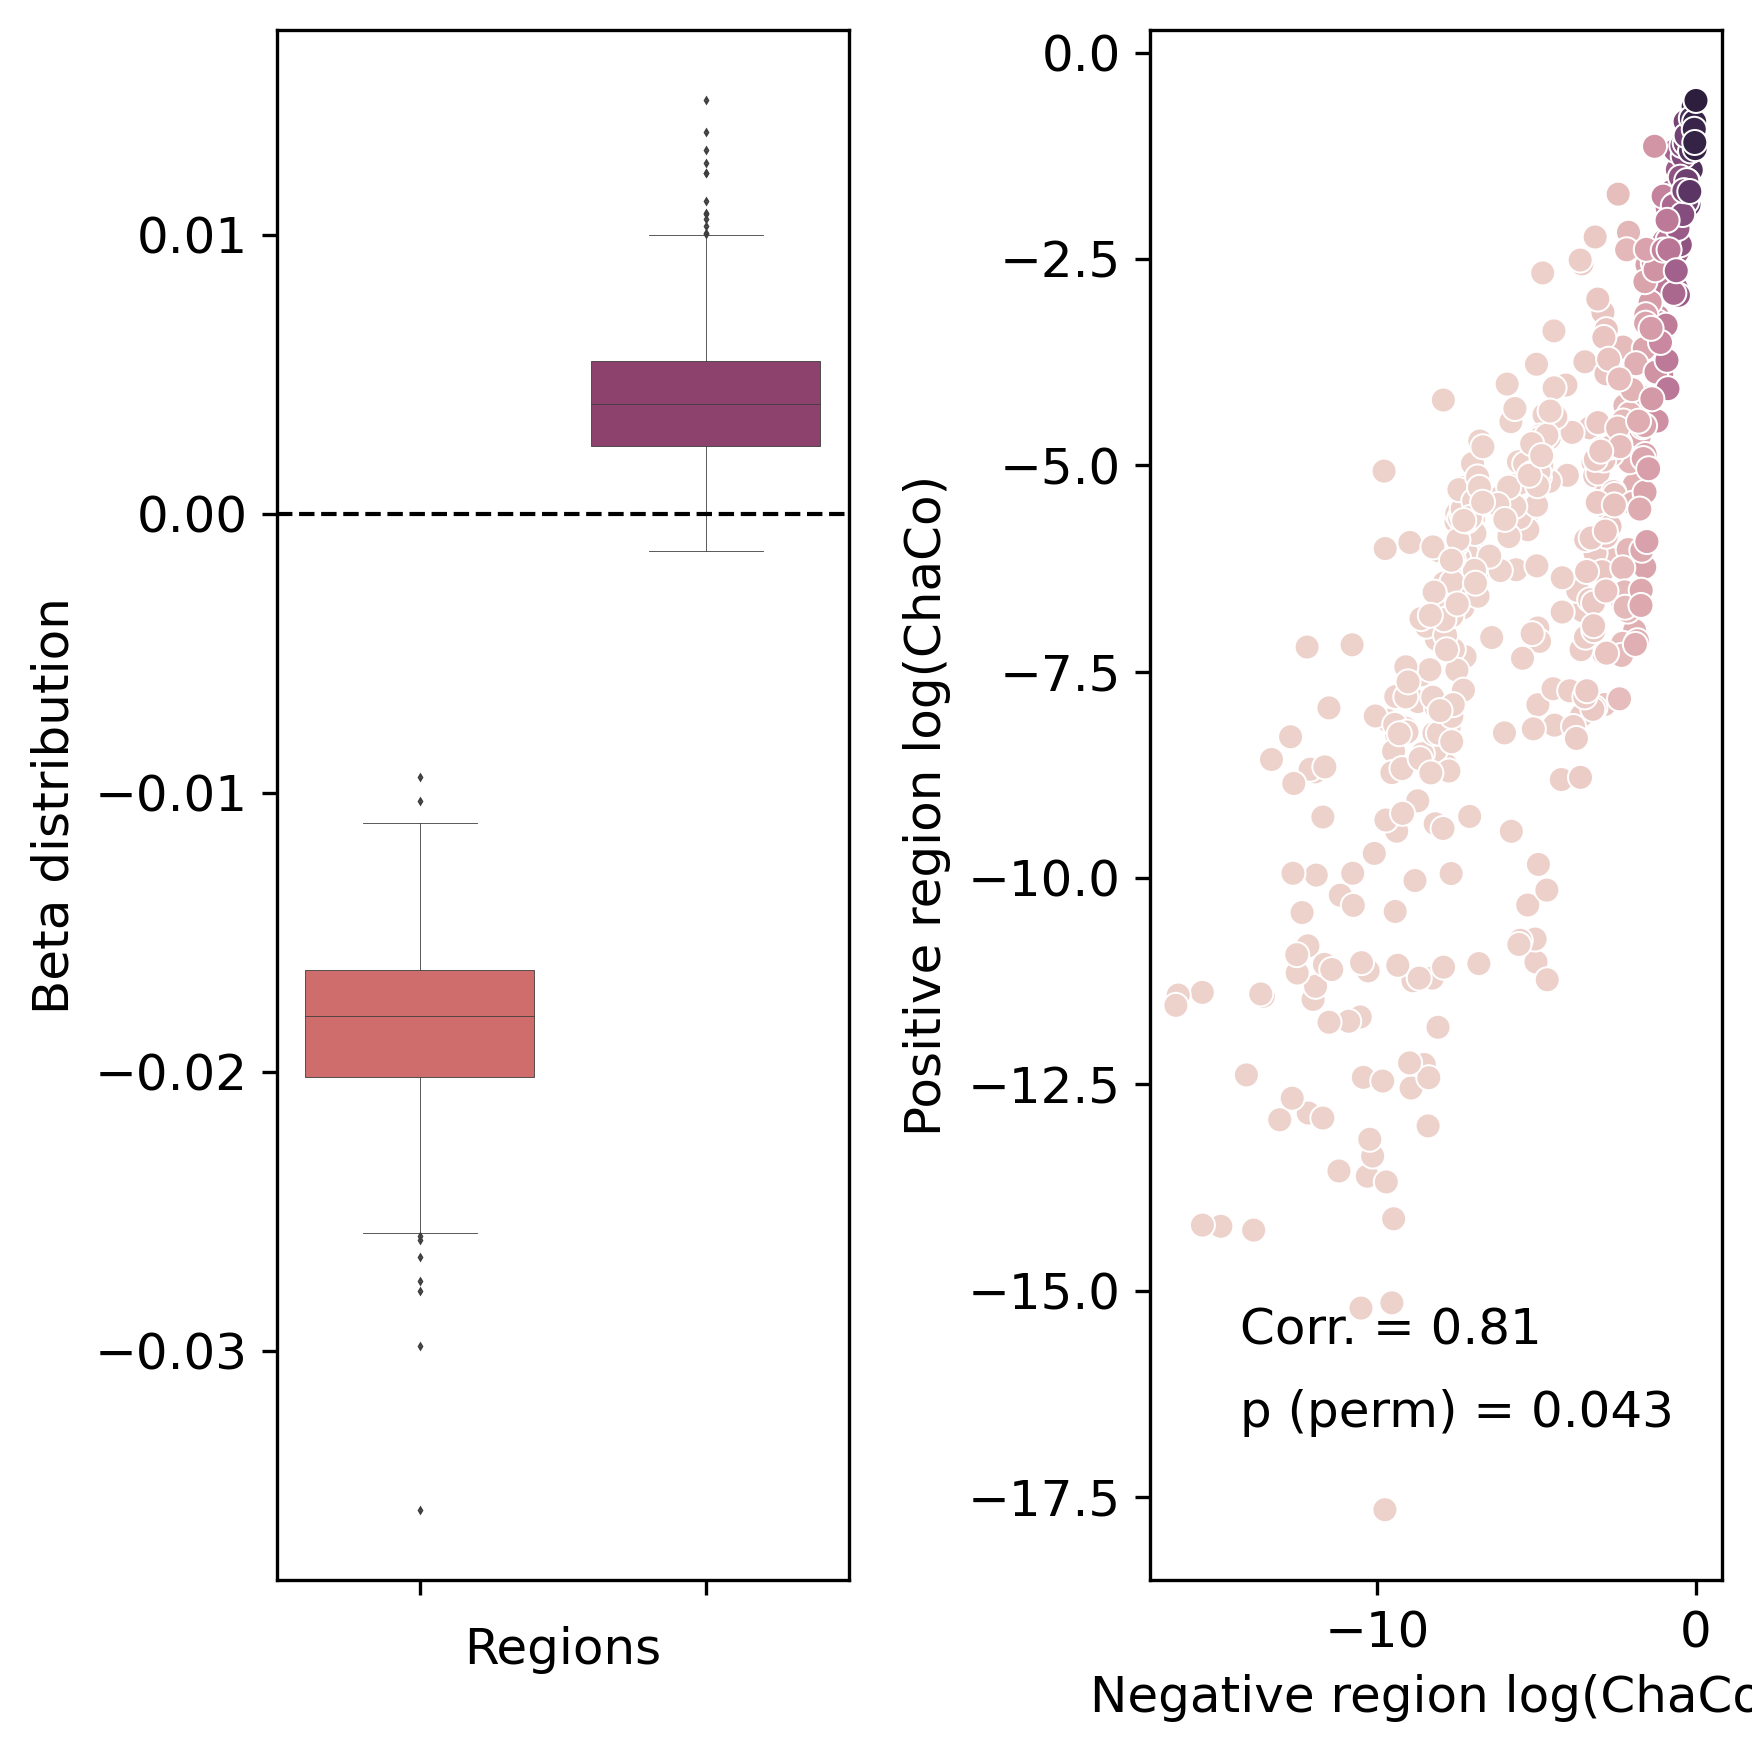

In [141]:
for i in np.arange(x.shape[0]):
    xypair = i
    plotting_array = np.zeros((268,1))
    plotting_array[x[xypair]]=-1
    plotting_array[y[xypair]]=1

    plt.rcParams.update({'font.size': 12})
    plt.rcParams['figure.dpi'] = 300
    fig,axs=plt.subplots(1,2,figsize=(6,6),layout='tight')


    #f=sns.scatterplot(x=betasone[:,x[xypair]],y=betasone[:,y[xypair]], hue=betasone[:,y[xypair]],size=0.01,legend=0,ax=axs[0])
    #f.set(xlabel='Negative weight region')
    #f.set(ylabel='Positive weight region')
    correl= np.corrcoef((betasone[:,x[xypair]], betasone[:,y[xypair]]))[0,1]

    #f.text(-0.005,0.0175, 'Corr. = {}'.format(np.round(correl,2)))

    plotting_array = np.zeros((1,268))
    plotting_array[0,x[xypair]]=1
    plotting_array[0,y[xypair]]=1
    cutoffs= plotting_array > 0
    newdata = betasone*cutoffs
    meds = np.median(newdata,axis=0)
    order = np.argsort(meds)
    newdata_plot = newdata[:,order]
    idx = np.argwhere(np.all(newdata_plot[..., :] == 0, axis=0))
    newdata_plot = np.delete(newdata_plot, idx, axis=1)
    pl = sns.boxplot(data=newdata_plot, linewidth=0.2, fliersize=0.3, palette ='flare',ax=axs[0])
    pl.axhline(0, color='black', linewidth=1, linestyle='--')
    pl.set(xticklabels=[])
    pl.set(ylabel='Beta distribution')
    pl.set(xlabel='Regions')

    pl=sns.scatterplot(x=np.log(X[:,x[xypair]]), y=np.log(X[:,y[xypair]]),hue=X[:,x[xypair]],legend=0,ax=axs[1])
    pl.set(xlabel='Negative region log(ChaCo)')
    pl.set(ylabel='Positive region log(ChaCo)')

    x1 = np.log(X[:,x[xypair]])
    x2 = np.log(X[:,y[xypair]])

    nan1 = np.isnan(x1) | np.isinf(x1) |  np.isnan(x2) | np.isinf(x2)
    nan2 = np.isnan(x2) | np.isinf(x2) | np.isnan(x1) | np.isinf(x1) 

    correl= np.corrcoef((x1[~nan1], x2[~nan2]))[0,1]
    pval = np.count_nonzero(correl<nullcorrs)/len(nullcorrs)
    pl.text(np.min(x1[~nan1])+2,np.min(x2[~nan2])+1.0, 'p (perm) = {}'.format(np.round(pval,3)))
    pl.text(np.min(x1[~nan1])+2,np.min(x2[~nan2])+2, 'Corr. = {}'.format(np.round(correl,2)))

    plt.savefig('/Users/emilyolafson/GIT/lesion_predictions/figures/regionpair_{}_chaco_corr_weight_anticorr.png'.format(xypair))

0.2521381513767635 0.015380879271119956
[ 0.03201893  0.00447915 -0.03895163 -0.01237808  0.02017381 -0.00255864
  0.00547349 -0.02494718 -0.05416183 -0.03703164  0.05876589  0.06769098
  0.01153213 -0.00220179 -0.01933927  0.00044081  0.03575954 -0.02776677
  0.00243186 -0.00140584]


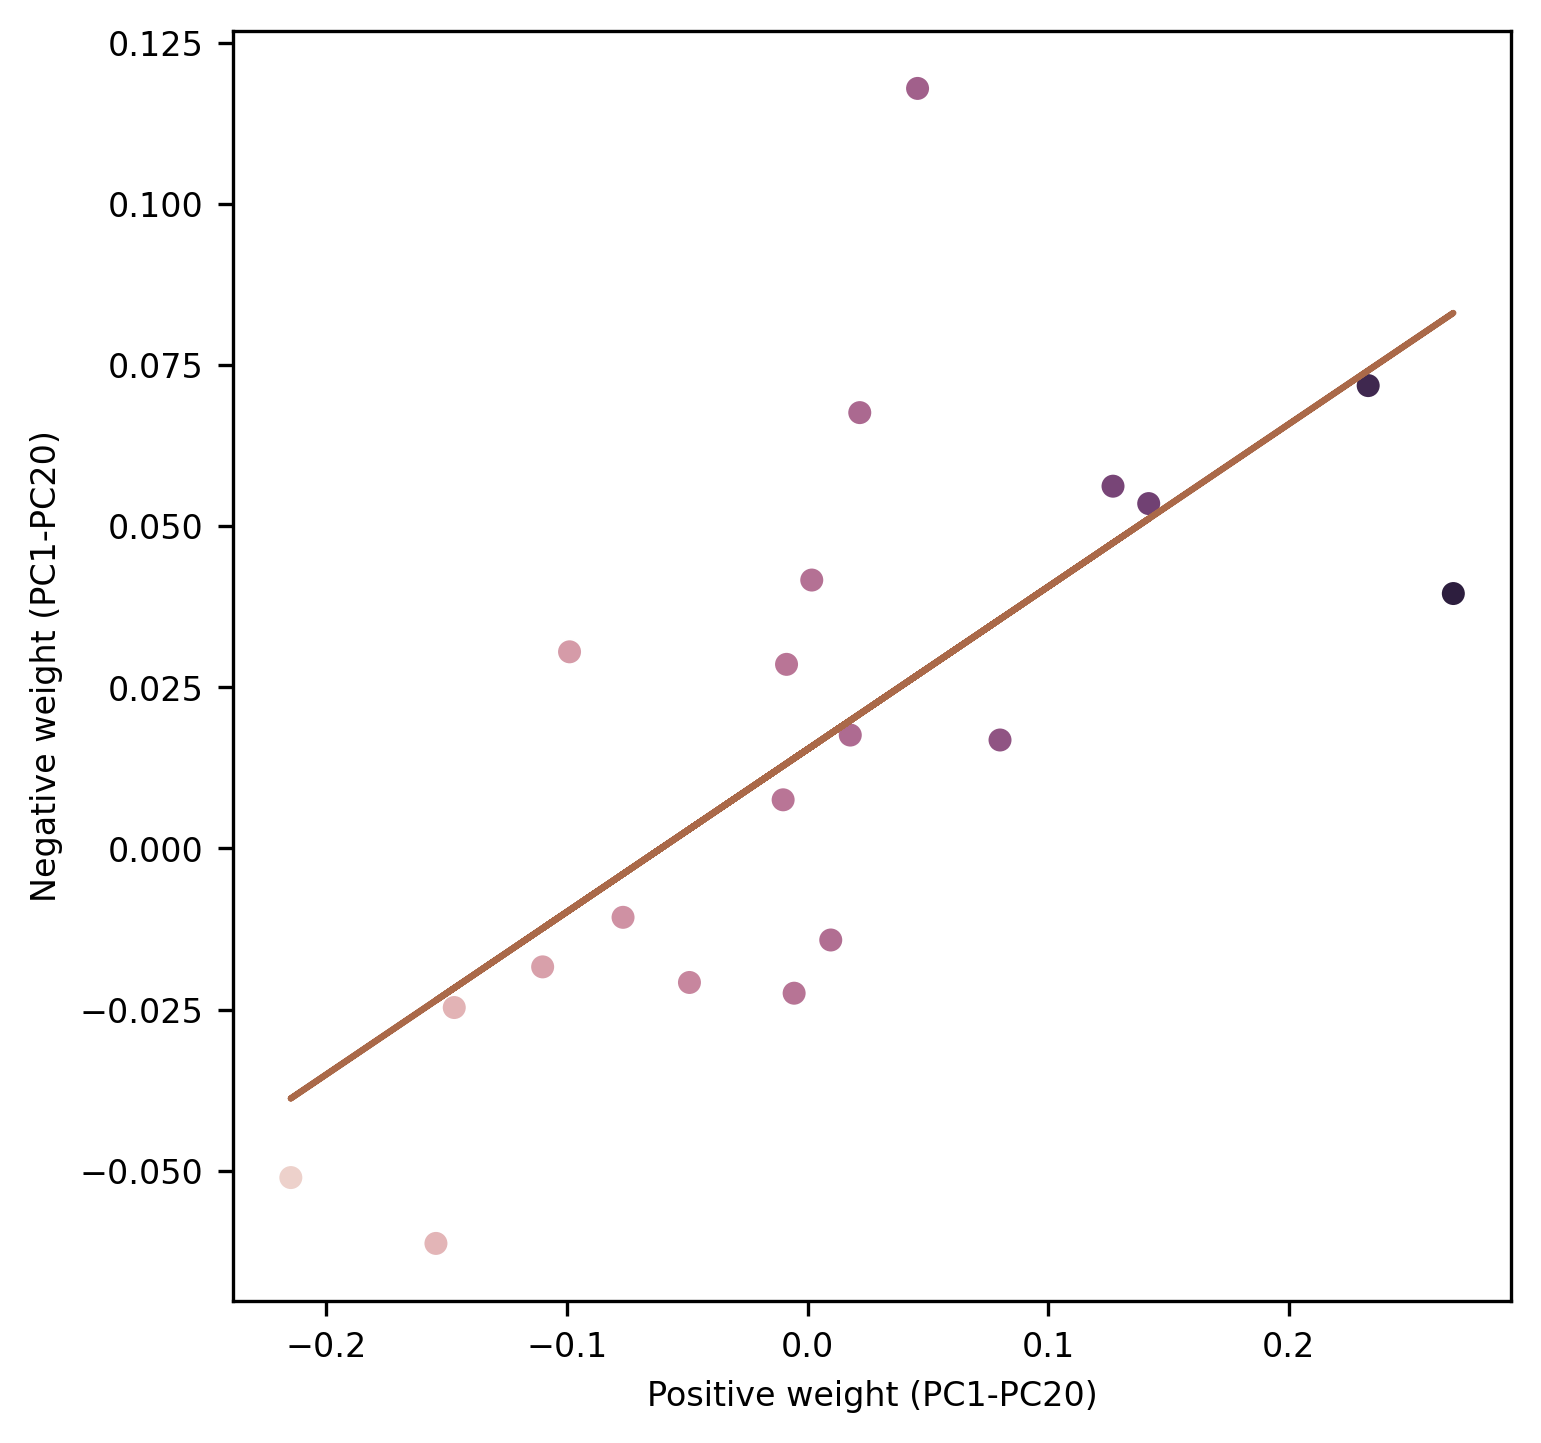

In [142]:

from numpy.polynomial.polynomial import polyfit
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.dpi'] = 300
pca = PCA(n_components=20).fit(X)
pca.explained_variance_ratio_
np.sum(pca.explained_variance_ratio_)

pcscorex=[]
pcscorey=[]

xypair=12
for i in np.arange(0,20):
    pcomp  =pca.components_[i]
    pcscorex.append(pcomp[x[xypair]])
    pcscorey.append(pcomp[y[xypair]])

plt.figure(figsize=(5.5,5.5))
f=sns.scatterplot(x=pcscorex, y=pcscorey, hue = pcscorex,legend=0)
f.set(ylabel='Negative weight (PC1-PC20)')
f.set(xlabel='Positive weight (PC1-PC20)')
# Fit with polyfit
b, m = polyfit(pcscorex, pcscorey, 1)
print(m,b)
print(np.array(pcscorex)*m)
plt.plot(pcscorex, b + m * np.array(pcscorex), '-', color='#aa6949')


np.corrcoef(pcscorey, pcscorex)
plt.savefig('/Users/emilyolafson/GIT/lesion_predictions/figures/correlation_PCscores_opposingregions_20PCs_{}.png'.format(xypair))

In [ ]:
np.corrcoef(pcscorey, pcscorex)


array([[1.        , 0.57188387],
       [0.57188387, 1.        ]])

In [ ]:

comp1=pca.components_[0]
target_range = 0.05
factor = np.max(comp1)/target_range
print('color range: {}, {}'.format(np.min(comp1), np.max(comp1)))
print(factor)
np.savetxt('/Users/emilyolafson/GIT/lesion_predictions/comp1.txt', comp1, delimiter=',')

plot_workbench_files('/Users/emilyolafson/GIT/lesion_predictions/comp1.txt',factor = factor)


In [ ]:
xypair = 1

plotting_array = np.zeros((268,1))
plotting_array[x[xypair]]=-1
plotting_array[y[xypair]]=1

plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi'] = 300
fig,axs=plt.subplots(1,3,figsize=(14,4),layout='tight')


f=sns.scatterplot(x=betasone[:,x[xypair]],y=betasone[:,y[xypair]], hue=betasone[:,y[xypair]],size=0.01,legend=0,ax=axs[0])
f.set(xlabel='Negative weight region')
f.set(ylabel='Positive weight region')
correl= np.corrcoef((betasone[:,x[xypair]], betasone[:,y[xypair]]))[0,1]

f.text(-0.005,0.0175, 'Corr. = {}'.format(np.round(correl,2)))



plotting_array = np.zeros((1,268))
plotting_array[0,x[xypair]]=1
plotting_array[0,y[xypair]]=1
cutoffs= plotting_array > 0
newdata = betasone*cutoffs
meds = np.median(newdata,axis=0)
order = np.argsort(meds)
newdata_plot = newdata[:,order]
idx = np.argwhere(np.all(newdata_plot[..., :] == 0, axis=0))
newdata_plot = np.delete(newdata_plot, idx, axis=1)
pl = sns.boxplot(data=newdata_plot, linewidth=0.2, fliersize=0.3, palette ='flare',ax=axs[1])
pl.set(xticklabels=[])
pl.set(ylabel='Beta distribution')
pl.set(xlabel='Regions')

pl=sns.scatterplot(x=np.log(X[:,x[xypair]]), y=np.log(X[:,y[xypair]]),hue=X[:,x[xypair]],legend=0,ax=axs[2])
pl.set(xlabel='Negative region log(ChaCo)')
pl.set(ylabel='Positive region log(ChaCo)')

x1 = np.log(X[:,x[xypair]])
x2 = np.log(X[:,y[xypair]])

nan1 = np.isnan(x1) | np.isinf(x1) |  np.isnan(x2) | np.isinf(x2)
nan2 = np.isnan(x2) | np.isinf(x2) | np.isnan(x1) | np.isinf(x1) 

correl= np.corrcoef((x1[~nan1], x2[~nan2]))[0,1]

pl.text(-15,-2.5, 'Corr. = {}'.format(np.round(correl,2)))

plt.savefig('/Users/emilyolafson/GIT/lesion_predictions/figures/regionpair_{}_chaco_corr_weight_anticorr.png'.format(xypair))